In [1]:
import os
import pywt
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签SimHei
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
from pandas import DataFrame
from pandas import concat#相空间重构用到的包
import seaborn as sns
from scipy.stats import pearsonr
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
#导入csv文件
train_spring=pd.read_excel(r'D:\article\Jilin_train_spring.xlsx')
test_spring=pd.read_excel(r'D:\article\Jilin_test_spring.xlsx')

In [3]:
train_spring

power  windspeed        hum     pressure  labels
0     0.051997   3.808845  56.236508  1002.591016       0
1     0.039248   3.552962  56.554355  1002.514766       0
2     0.020248   3.172379  57.272173  1002.744219       0
3     0.009681   2.829109  61.160967  1002.642344       0
4     0.010180   2.872706  61.581983  1003.362969       0
...        ...        ...        ...          ...     ...
1703  0.442173   7.522002  91.067373   983.650703       0
1704  0.416908   7.373275  94.185992   983.358359       0
1705  0.391931   7.231726  93.378132   983.291250       0
1706  0.377233   7.147002  93.006415   983.233281       0
1707  0.376834   7.139362  95.685345   982.840625       0

[1708 rows x 5 columns]

In [4]:
train_spring['labels'] =train_spring['labels'].replace(to_replace=2, value=1)
test_spring['labels'] =test_spring['labels'].replace(to_replace=2, value=1)

In [5]:
x_train_spring = train_spring.iloc[:, :5]
y_train_spring = train_spring.iloc[:, -1]
x_test_spring = test_spring.iloc[:, :5]
y_test_spring = test_spring.iloc[:, -1]

In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# 创建 MinMaxScaler 实例
scaler = MinMaxScaler()
# 选择前四列进行归一化
x_train_spring_selected = x_train_spring.iloc[:, :4]
x_test_spring_selected = x_test_spring.iloc[:, :4]
# 对选择的列进行归一化
x_train_spring_scaled = scaler.fit_transform(x_train_spring_selected)
x_test_spring_scaled = scaler.transform(x_test_spring_selected)

# 将归一化的数据转换回 DataFrame 并保持原有的列名
x_train_spring_scaled_df = pd.DataFrame(x_train_spring_scaled, columns=x_train_spring_selected.columns)
x_test_spring_scaled_df = pd.DataFrame(x_test_spring_scaled, columns=x_test_spring_selected.columns)

# 为了保持数据集的结构，我们需要将未归一化的原始最后一列添加回去
scaler_x_train_spring = pd.concat([x_train_spring_scaled_df, x_train_spring.iloc[:, -1:]], axis=1)
scaler_x_test_spring = pd.concat([x_test_spring_scaled_df, x_test_spring.iloc[:, -1:]], axis=1)
scaler_x_test_spring

power  windspeed       hum  pressure  labels
0    0.243589   0.405842  0.950461  0.306682       0
1    0.214660   0.390251  0.755985  0.301379       0
2    0.184738   0.370107  0.729059  0.299205       0
3    0.216561   0.392196  0.712806  0.284031       0
4    0.262301   0.418150  0.702883  0.271679       0
..        ...        ...       ...       ...     ...
423  0.433723   0.500214  0.365462  0.157558       1
424  0.608194   0.564400  0.483876  0.205777       1
425  0.185573   0.372239  0.691609  0.197152       1
426  0.374653   0.473206  0.752866  0.143653       0
427  0.401097   0.484543  0.653726  0.131418       0

[428 rows x 5 columns]

In [7]:
#春天
#不挑选特征，直接利用PCA进行降维（训练集）

In [7]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# 实例化PCA对象，例如，我们选择保留2个主成分
pca = PCA(n_components=2)
# 对数据进行拟合和转换
X_train_pca = pca.fit_transform(scaler_x_train_spring)
# 查看每个主成分解释的方差比例
print(pca.explained_variance_ratio_)
X_test_pca = pca.fit_transform(scaler_x_test_spring)
# 查看每个主成分解释的方差比例
print(pca.explained_variance_ratio_)

[0.48080705 0.2980031 ]
[0.50927862 0.3181717 ]


Class counts: {0: 1397, 1: 311}


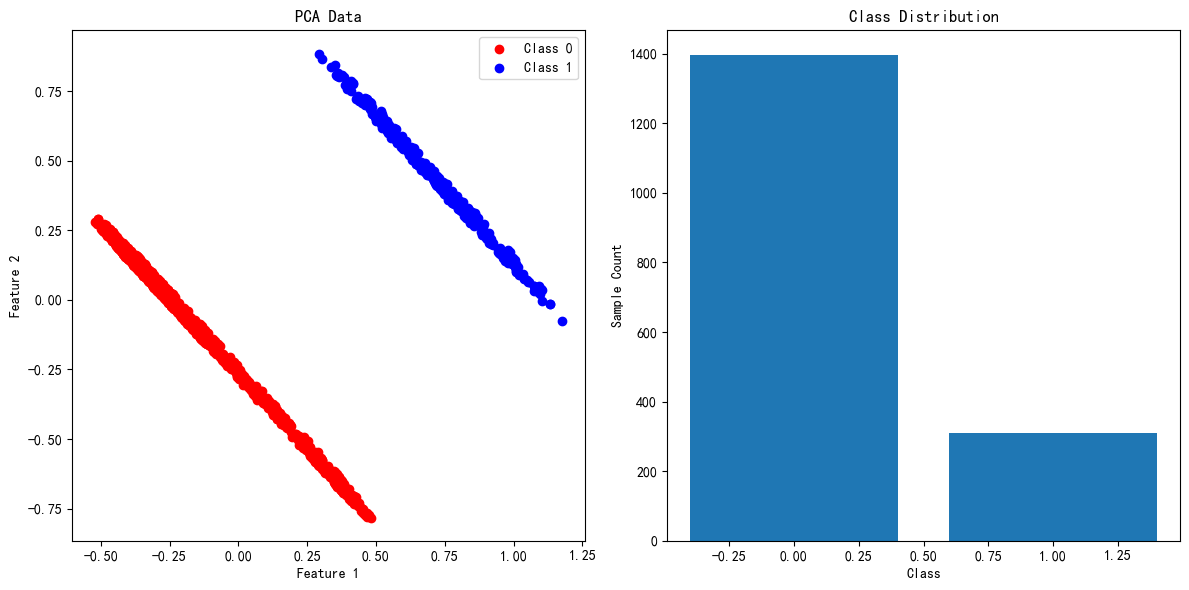

In [8]:
import numpy as np
from sklearn.datasets import make_classification
#春天训练集
# 设置随机种子以确保结果的可重复性
np.random.seed(42)
y_train_spring_numpy=y_train_spring.values.squeeze()
# 显示每个类别的样本数量
class_counts = np.bincount(y_train_spring_numpy)
print("Class counts:", dict(zip(range(2), class_counts)))

# 可视化数据集分布（可选）
import matplotlib.pyplot as plt

# 将数据分为三个子集，每个子集对应一个类别
class_0 = X_train_pca[y_train_spring_numpy == 0]
class_1 = X_train_pca[y_train_spring_numpy == 1]


plt.figure(figsize=(12, 6))

# 绘制每个类别的数据点
plt.subplot(1, 2, 1)
plt.scatter(class_0[:, 0], class_0[:,1], c='red', label='Class 0')
plt.scatter(class_1[:,0], class_1[:,1], c='blue', label='Class 1')
plt.title('PCA Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# 绘制类别分布
plt.subplot(1, 2, 2)
plt.bar(range(2), class_counts)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Sample Count')

plt.tight_layout()
plt.show()

In [9]:
from imblearn.over_sampling import RandomOverSampler
# 实例化 RandomOversampling 类对象
ros = RandomOverSampler(random_state=0)
# 过采样得到数据集及其标签
x_train_ros, y_train_ros = ros.fit_resample(X_train_pca, y_train_spring_numpy)
from imblearn.over_sampling import SMOTE
# 实例化 SMOTE 类对象
smote = SMOTE(random_state=0)
# 过采样得到数据集及其标签
x_train_smote, y_train_smote = smote.fit_resample(X_train_pca, y_train_spring_numpy)

In [10]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from imblearn.over_sampling import SMOTE

class NaN_DEBOHID:
    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors
        self.nn = NearestNeighbors(n_neighbors=n_neighbors)

    def fit_resample(self, X, y):
        # 计算自然邻居
        self.nn.fit(X)
        distances, indices = self.nn.kneighbors(X)

        # 标记密集和离群样本
        dense_indices = self._get_dense_indices(indices, y)
        outlier_indices = self._get_outlier_indices(indices, y)

        # 对密集样本应用DEBO算法
        dense_X, dense_y = X[dense_indices], y[dense_indices]
        debo = SMOTE()
        debo_X, debo_y = debo.fit_resample(dense_X, dense_y)

        # 合并原始离群样本和过采样后的密集样本
        X_resampled = np.vstack((X[dense_indices], debo_X))
        y_resampled = np.hstack((dense_y, debo_y))

        return X_resampled, y_resampled

    def _get_dense_indices(self, indices, y):
        # 计算每个样本的自然邻居中属于同一类别的比例
        majority_in_neighbors = self._get_majority_in_neighbors(indices, y)
        
        # 如果一个样本的自然邻居中属于多数类别的比例大于等于50%，则认为是密集样本
        dense_indices = majority_in_neighbors >= (self.n_neighbors / 2)
        
        # 返回密集样本的索引
        return np.where(dense_indices)[0]

    def _get_outlier_indices(self, indices, y):
        # 使用与_get_dense_indices相同的逻辑，但是这次我们寻找那些邻居中
        # 属于多数类别的比例小于50%的样本
        majority_in_neighbors = self._get_majority_in_neighbors(indices, y)
        
        # 如果一个样本的自然邻居中属于多数类别的比例小于50%，则认为是离群样本
        outlier_indices = majority_in_neighbors < (self.n_neighbors / 2)
        
        # 返回离群样本的索引
        return np.where(outlier_indices)[0]

    def _get_majority_in_neighbors(self, indices, y):
        # 计算每个样本的自然邻居中属于同一类别的数量
        neighbor_labels = y[indices]
        majority_counts = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=neighbor_labels)
        
        # 计算每个样本的自然邻居中属于多数类别的比例
        majority_in_neighbors = np.array([np.sum(neighbor_labels[i] == majority_counts[i]) for i in range(len(y))])
        return majority_in_neighbors

# 使用NaN-DEBOHID
nan_debohid = NaN_DEBOHID(n_neighbors=3)
# 假设X和y是已经定义好的数据集和标签
x_train_resampled, y_train_resampled = nan_debohid.fit_resample(X_train_pca,y_train_spring_numpy)

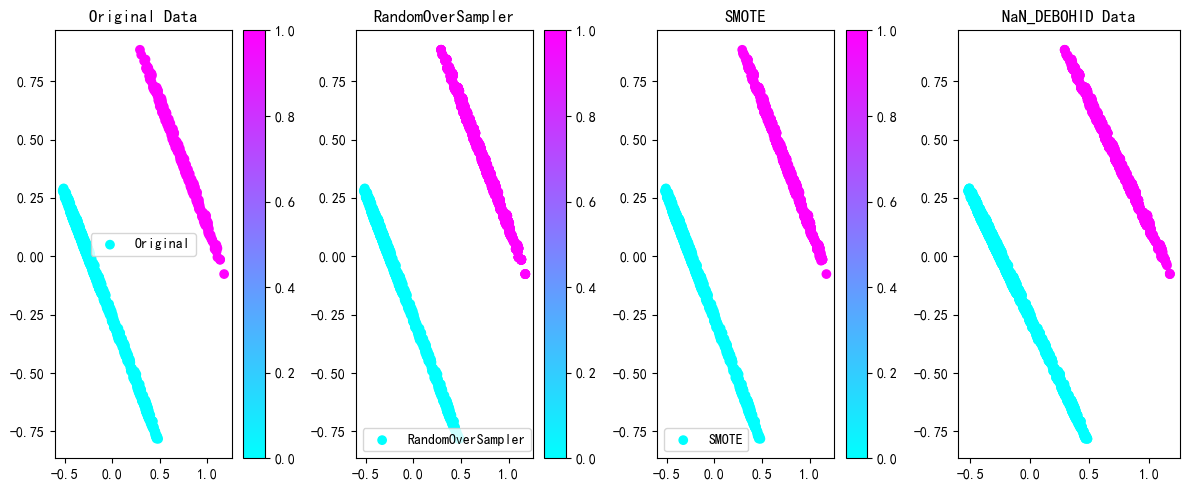

In [11]:
# 假设 x_train_spring 是二维数据
plt.figure(figsize=(12, 5))
plt.subplot(1, 4, 1)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_spring_numpy, cmap='cool', label='Original')
plt.title('Original Data')

plt.subplot(1, 4, 2)
plt.scatter(x_train_ros[:, 0], x_train_ros[:, 1], c=y_train_ros, cmap='cool', label='RandomOverSampler')
plt.title('RandomOverSampler')

plt.subplot(1, 4, 3)
plt.scatter(x_train_smote[:, 0], x_train_smote[:, 1], c=y_train_smote, cmap='cool', label='SMOTE')
plt.title('SMOTE')

plt.subplot(1, 4, 4)
plt.scatter(x_train_resampled[:, 0], x_train_resampled[:, 1], c=y_train_resampled, cmap='cool', label='NaN_DEBOHID')
plt.title('NaN_DEBOHID Data')

for i in range(1, 4):
    plt.subplot(1, 4, i)
    plt.legend()
    plt.colorbar()

plt.tight_layout()
plt.show()

2024/05/31 12:18:09 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: Solving single objective optimization problem.
2024/05/31 12:18:30 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 1, Current best: 1.0, Global best: 1.0, Runtime: 13.09410 seconds
2024/05/31 12:18:39 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 2, Current best: 1.0, Global best: 1.0, Runtime: 9.01290 seconds
2024/05/31 12:18:49 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 3, Current best: 1.0, Global best: 1.0, Runtime: 10.08715 seconds
2024/05/31 12:19:01 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 4, Current best: 1.0, Global best: 1.0, Runtime: 11.54505 seconds
2024/05/31 12:19:12 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 5, Current best: 1.0, Global best: 1.0, Runtime: 11.11903 seconds
2024/05/31 12:19:25 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 6, Current best: 1.0, Global best: 1.0, Ru

Solution: [5.42163    1.00265391 5.67149802], Fitness: 1.0
train_accuracy: 1.00
Accuracy: 1.00
Precision (macro): 1.00
Recall (macro): 1.00
F1 Score (macro): 1.00


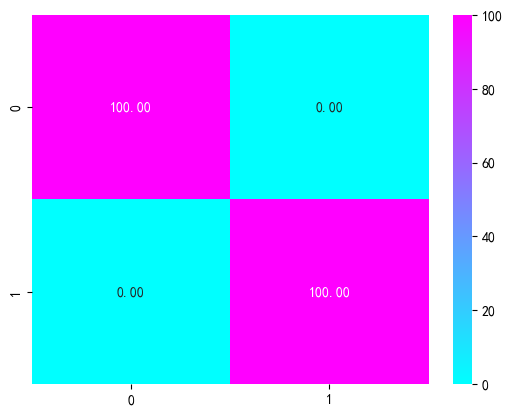

In [23]:
##pca-ros-rf
##RF模型分类
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, matthews_corrcoef, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor
from mealpy.swarm_based.ZOA import OriginalZOA
from sklearn.utils import class_weight
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_ros), y=y_train_ros)
class_weights_dict = dict(zip(np.unique(y_train_ros), class_weights))

# 假设我们想要为类别1和2的错误分类分配更高的成本，例如，是类别0的两倍
# 调整类别权重
for i in [1]:
    class_weights_dict[i] *=2
    
np.random.seed(42)
def cross_val_score_rf(nest, X, y):
    n_estimators, max_features, max_depth = nest
    rf = RandomForestClassifier(n_estimators=int(n_estimators), max_features=int(max_features), max_depth=int(max_depth),
                             class_weight=class_weights_dict, random_state=42)
    scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
    average_scoring = scores.mean()  # 返回交叉验证的平均分数
    return average_scoring

# 定义适应度函数，它将用于优化
def fitness_function(nest, X, y):
    n_estimators, max_features, max_depth = nest
    rf = RandomForestClassifier(n_estimators=int(n_estimators), max_features=int(max_features), max_depth=int(max_depth),
                             class_weight=class_weights_dict, random_state=42)
    scores = cross_val_score(rf, X, y, cv=5)  # 5-fold cross-validation
    return scores.mean()  # 返回交叉验证的平均准确率

# 定义适应度函数的参数范围
def get_nest(x_train_ros,y_train_ros):
    problem_dict1 = {
        "fit_func": lambda nest: fitness_function(nest,x_train_ros,y_train_ros),
        "lb": [1,1,1],
        "ub": [50,50,100],
        "minmax": "max",
    }
    epoch = 10
    pop_size = 32
    model = OriginalZOA(epoch, pop_size)
    best_position, best_fitness = model.solve(problem_dict1)
    print(f"Solution: {best_position}, Fitness: {best_fitness}")
    # 返回最优参数和适应度值
    return (best_position[0], best_position[1], best_position[2]), best_fitness  # 返回最优参数和适应度值

# 调用 get_nest 并传递训练数据
nest, average_accuracy = get_nest(x_train_ros,y_train_ros)  # 修改这里以接收两个返回值

# 从最优解中获取参数
n_estimators, max_features, max_depth = nest

# 使用转换后的整数创建随机森林分类器实例
rf = RandomForestClassifier(n_estimators=int(n_estimators), max_features=int(max_features), max_depth=int(max_depth),
                             class_weight=class_weights_dict, random_state=42)
rf.fit(x_train_ros,y_train_ros)
# 打印训练准确率
print(f'train_accuracy: {average_accuracy:.2f}')

# 执行预测
y_pred_s11 = rf.predict(X_test_pca)  # 确保已经拟合模型

# 使用 Seaborn 的 heatmap 函数绘制混淆矩阵
conf_matrix = confusion_matrix(y_test_spring, y_pred_s11)
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2f', cmap='cool', cbar=True)


# 计算准确率和其他指标
accuracy = accuracy_score(y_test_spring, y_pred_s11)
precision = precision_score(y_test_spring, y_pred_s11, average='macro')
recall = recall_score(y_test_spring, y_pred_s11, average='macro')
f1 = f1_score(y_test_spring, y_pred_s11, average='macro')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision (macro): {precision:.2f}')
print(f'Recall (macro): {recall:.2f}')
print(f'F1 Score (macro): {f1:.2f}')

2024/05/31 12:19:52 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: Solving single objective optimization problem.
2024/05/31 12:20:21 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 1, Current best: 1.0, Global best: 1.0, Runtime: 17.14877 seconds
2024/05/31 12:20:32 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 2, Current best: 1.0, Global best: 1.0, Runtime: 11.39695 seconds
2024/05/31 12:20:46 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 3, Current best: 1.0, Global best: 1.0, Runtime: 13.63092 seconds
2024/05/31 12:21:00 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 4, Current best: 1.0, Global best: 1.0, Runtime: 14.15688 seconds
2024/05/31 12:21:14 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 5, Current best: 1.0, Global best: 1.0, Runtime: 13.77339 seconds
2024/05/31 12:21:29 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 6, Current best: 1.0, Global best: 1.0, R

Solution: [5.42163    1.00265391 5.67149802], Fitness: 1.0
train_accuracy: 1.00
Accuracy: 1.00
Precision (macro): 1.00
Recall (macro): 1.00
F1 Score (macro): 1.00


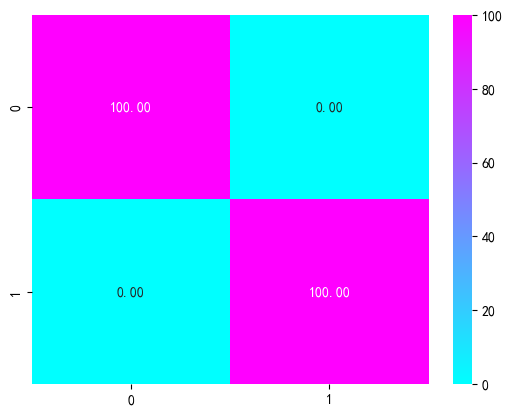

In [24]:
##pca-smote-rf
##RF模型分类
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, matthews_corrcoef, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor
from mealpy.swarm_based.ZOA import OriginalZOA
from sklearn.utils import class_weight
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_smote), y=y_train_smote)
class_weights_dict = dict(zip(np.unique(y_train_smote), class_weights))

# 假设我们想要为类别1和2的错误分类分配更高的成本，例如，是类别0的两倍
# 调整类别权重
for i in [1]:
    class_weights_dict[i] *=2
    
np.random.seed(42)
def cross_val_score_rf(nest, X, y):
    n_estimators, max_features, max_depth = nest
    rf = RandomForestClassifier(n_estimators=int(n_estimators), max_features=int(max_features), max_depth=int(max_depth),
                             class_weight=class_weights_dict, random_state=42)
    scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
    average_scoring = scores.mean()  # 返回交叉验证的平均分数
    return average_scoring

# 定义适应度函数，它将用于优化
def fitness_function(nest, X, y):
    n_estimators, max_features, max_depth = nest
    rf = RandomForestClassifier(n_estimators=int(n_estimators), max_features=int(max_features), max_depth=int(max_depth),
                             class_weight=class_weights_dict, random_state=42)
    scores = cross_val_score(rf, X, y, cv=5)  # 5-fold cross-validation
    return scores.mean()  # 返回交叉验证的平均准确率

# 定义适应度函数的参数范围
def get_nest(x_train_smote,y_train_smote):
    problem_dict1 = {
        "fit_func": lambda nest: fitness_function(nest,x_train_smote,y_train_smote),
        "lb": [1,1,1],
        "ub": [50,50,100],
        "minmax": "max",
    }
    epoch = 10
    pop_size = 32
    model = OriginalZOA(epoch, pop_size)
    best_position, best_fitness = model.solve(problem_dict1)
    print(f"Solution: {best_position}, Fitness: {best_fitness}")
    # 返回最优参数和适应度值
    return (best_position[0], best_position[1], best_position[2]), best_fitness  # 返回最优参数和适应度值

# 调用 get_nest 并传递训练数据
nest, average_accuracy = get_nest(x_train_smote,y_train_smote)  # 修改这里以接收两个返回值

# 从最优解中获取参数
n_estimators, max_features, max_depth = nest

# 使用转换后的整数创建随机森林分类器实例
rf = RandomForestClassifier(n_estimators=int(n_estimators), max_features=int(max_features), max_depth=int(max_depth),
                             class_weight=class_weights_dict, random_state=42)
rf.fit(x_train_smote,y_train_smote)
# 打印训练准确率
print(f'train_accuracy: {average_accuracy:.2f}')

# 执行预测
y_pred_s12 = rf.predict(X_test_pca)  # 确保已经拟合模型

# 使用 Seaborn 的 heatmap 函数绘制混淆矩阵
conf_matrix = confusion_matrix(y_test_spring, y_pred_s12)
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2f', cmap='cool', cbar=True)


# 计算准确率和其他指标
accuracy = accuracy_score(y_test_spring, y_pred_s12)
precision = precision_score(y_test_spring, y_pred_s12, average='macro')
recall = recall_score(y_test_spring, y_pred_s12, average='macro')
f1 = f1_score(y_test_spring, y_pred_s12, average='macro')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision (macro): {precision:.2f}')
print(f'Recall (macro): {recall:.2f}')
print(f'F1 Score (macro): {f1:.2f}')

2024/05/31 12:21:59 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: Solving single objective optimization problem.
2024/05/31 12:22:33 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 1, Current best: 1.0, Global best: 1.0, Runtime: 20.34195 seconds
2024/05/31 12:22:45 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 2, Current best: 1.0, Global best: 1.0, Runtime: 12.23099 seconds
2024/05/31 12:22:59 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 3, Current best: 1.0, Global best: 1.0, Runtime: 14.04733 seconds
2024/05/31 12:23:14 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 4, Current best: 1.0, Global best: 1.0, Runtime: 15.17190 seconds
2024/05/31 12:23:29 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 5, Current best: 1.0, Global best: 1.0, Runtime: 14.36396 seconds
2024/05/31 12:23:45 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 6, Current best: 1.0, Global best: 1.0, R

Solution: [5.42163    1.00265204 5.66603975], Fitness: 1.0
train_accuracy: 1.00
Accuracy: 1.00
Precision (macro): 1.00
Recall (macro): 1.00
F1 Score (macro): 1.00


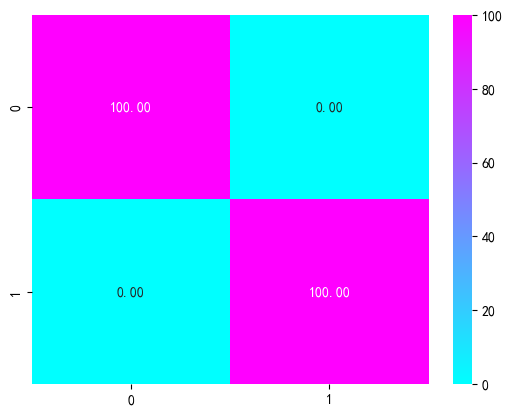

In [25]:
##pca-nan-rf
##RF模型分类
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, matthews_corrcoef, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor
from mealpy.swarm_based.ZOA import OriginalZOA
from sklearn.utils import class_weight
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_resampled), y=y_train_resampled)
class_weights_dict = dict(zip(np.unique(y_train_resampled), class_weights))

# 假设我们想要为类别1和2的错误分类分配更高的成本，例如，是类别0的两倍
# 调整类别权重
for i in [1]:
    class_weights_dict[i] *=2
    
np.random.seed(42)
def cross_val_score_rf(nest, X, y):
    n_estimators, max_features, max_depth = nest
    rf = RandomForestClassifier(n_estimators=int(n_estimators), max_features=int(max_features), max_depth=int(max_depth),
                             class_weight=class_weights_dict, random_state=42)
    scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
    average_scoring = scores.mean()  # 返回交叉验证的平均分数
    return average_scoring

# 定义适应度函数，它将用于优化
def fitness_function(nest, X, y):
    n_estimators, max_features, max_depth = nest
    rf = RandomForestClassifier(n_estimators=int(n_estimators), max_features=int(max_features), max_depth=int(max_depth),
                             class_weight=class_weights_dict, random_state=42)
    scores = cross_val_score(rf, X, y, cv=5)  # 5-fold cross-validation
    return scores.mean()  # 返回交叉验证的平均准确率

# 定义适应度函数的参数范围
def get_nest(x_train_resampled,y_train_resampled):
    problem_dict1 = {
        "fit_func": lambda nest: fitness_function(nest,x_train_resampled,y_train_resampled),
        "lb": [1,1,1],
        "ub": [50,50,100],
        "minmax": "max",
    }
    epoch = 10
    pop_size = 32
    model = OriginalZOA(epoch, pop_size)
    best_position, best_fitness = model.solve(problem_dict1)
    print(f"Solution: {best_position}, Fitness: {best_fitness}")
    # 返回最优参数和适应度值
    return (best_position[0], best_position[1], best_position[2]), best_fitness  # 返回最优参数和适应度值

# 调用 get_nest 并传递训练数据
nest, average_accuracy = get_nest(x_train_resampled,y_train_resampled)  # 修改这里以接收两个返回值

# 从最优解中获取参数
n_estimators, max_features, max_depth = nest

# 使用转换后的整数创建随机森林分类器实例
rf = RandomForestClassifier(n_estimators=int(n_estimators), max_features=int(max_features), max_depth=int(max_depth),
                             class_weight=class_weights_dict, random_state=42)
rf.fit(x_train_resampled,y_train_resampled)
# 打印训练准确率
print(f'train_accuracy: {average_accuracy:.2f}')

# 执行预测
y_pred_s14 = rf.predict(X_test_pca)  # 确保已经拟合模型

# 使用 Seaborn 的 heatmap 函数绘制混淆矩阵
conf_matrix = confusion_matrix(y_test_spring, y_pred_s14)
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2f', cmap='cool', cbar=True)


# 计算准确率和其他指标
accuracy = accuracy_score(y_test_spring, y_pred_s14)
precision = precision_score(y_test_spring, y_pred_s14, average='macro')
recall = recall_score(y_test_spring, y_pred_s14, average='macro')
f1 = f1_score(y_test_spring, y_pred_s14, average='macro')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision (macro): {precision:.2f}')
print(f'Recall (macro): {recall:.2f}')
print(f'F1 Score (macro): {f1:.2f}')

In [26]:
###pca-ros-knn
##knn模型分类
#KNN模型分类
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, matthews_corrcoef, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neural_network import MLPRegressor
from mealpy.swarm_based.ZOA import OriginalZOA
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

np.random.seed(42)

# 确保 weights 和 algorithm 列表在全局作用域内定义
weights = ["lin", "sigm", "tanh", "rbf_l1", "rbf_l2", "rbf_linf"]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

# 定义交叉验证的适应度函数
def cross_val_score_knn(nest, X, y):
    n_neighbors, weights_fx, algorithm_fx = nest
    n_neighbors = int(n_neighbors)
    # weights_fx 应该是介于 0 到 1 之间的值，用于选择权重类型
    if weights_fx < 0.5:
        weights_str = 'uniform'  # 如果 weights_fx 在 0 到 0.5 之间，使用 'uniform'
    else:
        weights_str = 'distance'  # 如果 weights_fx 在 0.5 到 1 之间，使用 'distance'
    
    algorithm_index = int(round(algorithm_fx * len(algorithm)))  # 确保索引在合法范围内
    algorithm_str = algorithm[algorithm_index]
    
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights_str, algorithm=algorithm_str)
    knn.fit(X, y)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    average_accuracy = scores.mean()
    return average_accuracy

# 定义适应度函数
def fitness_function(nest):
    return cross_val_score_knn(nest, x_train_ros, y_train_ros)

# 定义适应度函数的参数范围
def get_nest():
    problem_dict1 = {
        "fit_func": fitness_function,
        "lb": [1, 0.01, 0.01],
        "ub": [10, 0.05, 0.05],
        "minmax": "max",
    }
    # 设置迭代次数和粒子群数
    epoch = 10
    pop_size = 32
    model = OriginalZOA(epoch, pop_size)
    best_position, best_fitness = model.solve(problem_dict1)
    print(f"Solution: {best_position}, Fitness: {best_fitness}")
    # 返回最优参数
    return (best_position[0], best_position[1], best_position[2])

# 调用 get_nest 函数来获取最优参数
nest = get_nest()
n_neighbors, weights_fx, algorithm_fx = nest

# 将 n_neighbors 转换为整数
n_neighbors = int(n_neighbors)

# 根据 weights_fx 选择权重策略
weights_strategy = 'uniform' if weights_fx < 0.5 else 'distance'

# 根据 algorithm_fx 选择算法
algorithm_index = int(round(algorithm_fx * len(algorithm)))
algorithm_str = algorithm[algorithm_index]

# 使用最优参数创建 KNN 分类器实例
knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights_strategy, algorithm=algorithm_str)
knn.fit(x_train_ros, y_train_ros)

# 计算交叉验证分数
cv_scores = cross_val_score_knn((n_neighbors, weights_fx, algorithm_fx), x_train_ros, y_train_ros)
average_accuracy = cv_scores.mean()
print(f'train_accuracy: {average_accuracy:.2f}')

# 执行预测
y_pred_s21 = knn.predict(X_test_pca)

# 计算准确率和其他性能指标
accuracy = accuracy_score(y_test_spring, y_pred_s21)
precision = precision_score(y_test_spring, y_pred_s21, average='macro')
recall = recall_score(y_test_spring, y_pred_s21, average='macro')
f1 = f1_score(y_test_spring, y_pred_s21, average='macro')

print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test_spring, y_pred_s21))
print(f'Precision (macro): {precision:.2f}')
print(f'Recall (macro): {recall:.2f}')
print(f'F1 Score (macro): {f1:.2f}')

2024/05/31 12:24:15 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: Solving single objective optimization problem.
2024/05/31 12:24:22 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 1, Current best: 1.0, Global best: 1.0, Runtime: 5.08398 seconds
2024/05/31 12:24:27 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 2, Current best: 1.0, Global best: 1.0, Runtime: 4.98812 seconds
2024/05/31 12:24:32 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 3, Current best: 1.0, Global best: 1.0, Runtime: 4.99106 seconds
2024/05/31 12:24:37 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 4, Current best: 1.0, Global best: 1.0, Runtime: 4.97958 seconds
2024/05/31 12:24:42 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 5, Current best: 1.0, Global best: 1.0, Runtime: 4.96917 seconds
2024/05/31 12:24:47 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 6, Current best: 1.0, Global best: 1.0, Runtim

Solution: [1.   0.01 0.01], Fitness: 1.0
train_accuracy: 1.00
Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       353
           1       1.00      1.00      1.00        75

    accuracy                           1.00       428
   macro avg       1.00      1.00      1.00       428
weighted avg       1.00      1.00      1.00       428

Precision (macro): 1.00
Recall (macro): 1.00
F1 Score (macro): 1.00


In [27]:
###pca-smote-knn
##knn模型分类
#KNN模型分类
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, matthews_corrcoef, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neural_network import MLPRegressor
from mealpy.swarm_based.ZOA import OriginalZOA
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

np.random.seed(42)

# 确保 weights 和 algorithm 列表在全局作用域内定义
weights = ["lin", "sigm", "tanh", "rbf_l1", "rbf_l2", "rbf_linf"]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

# 定义交叉验证的适应度函数
def cross_val_score_knn(nest, X, y):
    n_neighbors, weights_fx, algorithm_fx = nest
    n_neighbors = int(n_neighbors)
    # weights_fx 应该是介于 0 到 1 之间的值，用于选择权重类型
    if weights_fx < 0.5:
        weights_str = 'uniform'  # 如果 weights_fx 在 0 到 0.5 之间，使用 'uniform'
    else:
        weights_str = 'distance'  # 如果 weights_fx 在 0.5 到 1 之间，使用 'distance'
    
    algorithm_index = int(round(algorithm_fx * len(algorithm)))  # 确保索引在合法范围内
    algorithm_str = algorithm[algorithm_index]
    
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights_str, algorithm=algorithm_str)
    knn.fit(X, y)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    average_accuracy = scores.mean()
    return average_accuracy

# 定义适应度函数
def fitness_function(nest):
    return cross_val_score_knn(nest, x_train_smote, y_train_smote)

# 定义适应度函数的参数范围
def get_nest():
    problem_dict1 = {
        "fit_func": fitness_function,
        "lb": [1, 0.01, 0.01],
        "ub": [10, 0.05, 0.05],
        "minmax": "max",
    }
    # 设置迭代次数和粒子群数
    epoch = 10
    pop_size = 32
    model = OriginalZOA(epoch, pop_size)
    best_position, best_fitness = model.solve(problem_dict1)
    print(f"Solution: {best_position}, Fitness: {best_fitness}")
    # 返回最优参数
    return (best_position[0], best_position[1], best_position[2])

# 调用 get_nest 函数来获取最优参数
nest = get_nest()
n_neighbors, weights_fx, algorithm_fx = nest

# 将 n_neighbors 转换为整数
n_neighbors = int(n_neighbors)

# 根据 weights_fx 选择权重策略
weights_strategy = 'uniform' if weights_fx < 0.5 else 'distance'

# 根据 algorithm_fx 选择算法
algorithm_index = int(round(algorithm_fx * len(algorithm)))
algorithm_str = algorithm[algorithm_index]

# 使用最优参数创建 KNN 分类器实例
knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights_strategy, algorithm=algorithm_str)
knn.fit(x_train_smote, y_train_smote)

# 计算交叉验证分数
cv_scores = cross_val_score_knn((n_neighbors, weights_fx, algorithm_fx), x_train_smote, y_train_smote)
average_accuracy = cv_scores.mean()
print(f'train_accuracy: {average_accuracy:.2f}')

# 执行预测
y_pred_s22 = knn.predict(X_test_pca)

# 计算准确率和其他性能指标
accuracy = accuracy_score(y_test_spring, y_pred_s22)
precision = precision_score(y_test_spring, y_pred_s22, average='macro')
recall = recall_score(y_test_spring, y_pred_s22, average='macro')
f1 = f1_score(y_test_spring, y_pred_s22, average='macro')

print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test_spring, y_pred_s22))
print(f'Precision (macro): {precision:.2f}')
print(f'Recall (macro): {recall:.2f}')
print(f'F1 Score (macro): {f1:.2f}')

2024/05/31 12:25:07 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: Solving single objective optimization problem.
2024/05/31 12:25:15 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 1, Current best: 1.0, Global best: 1.0, Runtime: 5.25624 seconds
2024/05/31 12:25:20 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 2, Current best: 1.0, Global best: 1.0, Runtime: 5.16959 seconds
2024/05/31 12:25:25 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 3, Current best: 1.0, Global best: 1.0, Runtime: 4.92217 seconds
2024/05/31 12:25:31 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 4, Current best: 1.0, Global best: 1.0, Runtime: 5.74675 seconds
2024/05/31 12:25:37 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 5, Current best: 1.0, Global best: 1.0, Runtime: 5.64415 seconds
2024/05/31 12:25:43 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 6, Current best: 1.0, Global best: 1.0, Runtim

Solution: [1.   0.01 0.01], Fitness: 1.0
train_accuracy: 1.00
Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       353
           1       1.00      1.00      1.00        75

    accuracy                           1.00       428
   macro avg       1.00      1.00      1.00       428
weighted avg       1.00      1.00      1.00       428

Precision (macro): 1.00
Recall (macro): 1.00
F1 Score (macro): 1.00


In [28]:
###pca-ana-knn
#KNN模型分类
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, matthews_corrcoef, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neural_network import MLPRegressor
from mealpy.swarm_based.ZOA import OriginalZOA
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

np.random.seed(42)

# 确保 weights 和 algorithm 列表在全局作用域内定义
weights = ["lin", "sigm", "tanh", "rbf_l1", "rbf_l2", "rbf_linf"]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

# 定义交叉验证的适应度函数
def cross_val_score_knn(nest, X, y):
    n_neighbors, weights_fx, algorithm_fx = nest
    n_neighbors = int(n_neighbors)
    # weights_fx 应该是介于 0 到 1 之间的值，用于选择权重类型
    if weights_fx < 0.5:
        weights_str = 'uniform'  # 如果 weights_fx 在 0 到 0.5 之间，使用 'uniform'
    else:
        weights_str = 'distance'  # 如果 weights_fx 在 0.5 到 1 之间，使用 'distance'
    
    algorithm_index = int(round(algorithm_fx * len(algorithm)))  # 确保索引在合法范围内
    algorithm_str = algorithm[algorithm_index]
    
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights_str, algorithm=algorithm_str)
    knn.fit(X, y)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    average_accuracy = scores.mean()
    return average_accuracy

# 定义适应度函数
def fitness_function(nest):
    return cross_val_score_knn(nest, x_train_resampled, y_train_resampled)

# 定义适应度函数的参数范围
def get_nest():
    problem_dict1 = {
        "fit_func": fitness_function,
        "lb": [1, 0.01, 0.01],
        "ub": [10, 0.05, 0.05],
        "minmax": "max",
    }
    # 设置迭代次数和粒子群数
    epoch = 10
    pop_size = 32
    model = OriginalZOA(epoch, pop_size)
    best_position, best_fitness = model.solve(problem_dict1)
    print(f"Solution: {best_position}, Fitness: {best_fitness}")
    # 返回最优参数
    return (best_position[0], best_position[1], best_position[2])

# 调用 get_nest 函数来获取最优参数
nest = get_nest()
n_neighbors, weights_fx, algorithm_fx = nest

# 将 n_neighbors 转换为整数
n_neighbors = int(n_neighbors)

# 根据 weights_fx 选择权重策略
weights_strategy = 'uniform' if weights_fx < 0.5 else 'distance'

# 根据 algorithm_fx 选择算法
algorithm_index = int(round(algorithm_fx * len(algorithm)))
algorithm_str = algorithm[algorithm_index]

# 使用最优参数创建 KNN 分类器实例
knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights_strategy, algorithm=algorithm_str)
knn.fit(x_train_resampled, y_train_resampled)

# 计算交叉验证分数
cv_scores = cross_val_score_knn((n_neighbors, weights_fx, algorithm_fx), x_train_resampled, y_train_resampled)
average_accuracy = cv_scores.mean()
print(f'train_accuracy: {average_accuracy:.2f}')

# 执行预测
y_pred_s24 = knn.predict(X_test_pca)

# 计算准确率和其他性能指标
accuracy = accuracy_score(y_test_spring, y_pred_s24)
precision = precision_score(y_test_spring, y_pred_s24, average='macro')
recall = recall_score(y_test_spring, y_pred_s24, average='macro')
f1 = f1_score(y_test_spring, y_pred_s24, average='macro')

print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test_spring, y_pred_s24))
print(f'Precision (macro): {precision:.2f}')
print(f'Recall (macro): {recall:.2f}')
print(f'F1 Score (macro): {f1:.2f}')

2024/05/31 12:26:05 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: Solving single objective optimization problem.
2024/05/31 12:26:18 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 1, Current best: 1.0, Global best: 1.0, Runtime: 7.93302 seconds
2024/05/31 12:26:26 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 2, Current best: 1.0, Global best: 1.0, Runtime: 7.93697 seconds
2024/05/31 12:26:34 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 3, Current best: 1.0, Global best: 1.0, Runtime: 7.71103 seconds
2024/05/31 12:26:41 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 4, Current best: 1.0, Global best: 1.0, Runtime: 7.70138 seconds
2024/05/31 12:26:49 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 5, Current best: 1.0, Global best: 1.0, Runtime: 7.60479 seconds
2024/05/31 12:26:57 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 6, Current best: 1.0, Global best: 1.0, Runtim

Solution: [1.   0.01 0.01], Fitness: 1.0
train_accuracy: 1.00
Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       353
           1       1.00      1.00      1.00        75

    accuracy                           1.00       428
   macro avg       1.00      1.00      1.00       428
weighted avg       1.00      1.00      1.00       428

Precision (macro): 1.00
Recall (macro): 1.00
F1 Score (macro): 1.00


2024/05/31 12:27:29 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: Solving single objective optimization problem.
2024/05/31 12:27:30 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 1, Current best: 1.0, Global best: 1.0, Runtime: 0.65618 seconds
2024/05/31 12:27:31 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 2, Current best: 1.0, Global best: 1.0, Runtime: 0.70784 seconds
2024/05/31 12:27:31 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 3, Current best: 1.0, Global best: 1.0, Runtime: 0.68774 seconds
2024/05/31 12:27:32 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 4, Current best: 1.0, Global best: 1.0, Runtime: 0.68442 seconds
2024/05/31 12:27:33 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 5, Current best: 1.0, Global best: 1.0, Runtime: 0.59238 seconds
2024/05/31 12:27:33 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 6, Current best: 1.0, Global best: 1.0, Runtim

Optimal var_smoothing: 2.0878533426400506e-08, Best Fitness: 1.0
train_accuracy: 1.00


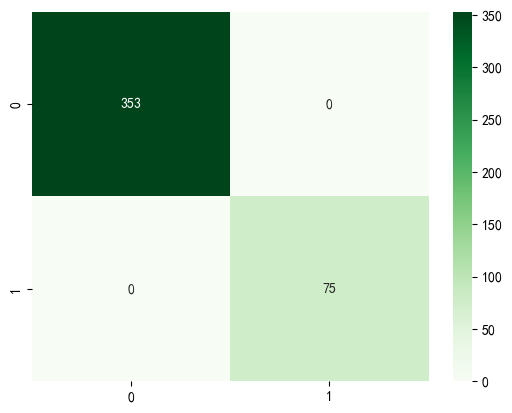

Accuracy: 1.00
Precision (macro): 1.00
Recall (macro): 1.00
F1 Score (macro): 1.00


In [29]:
###pca-ros-朴素贝叶斯
#朴素贝叶斯分类
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from mealpy.swarm_based.ZOA import OriginalZOA
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
np.random.seed(42)

# 定义交叉验证的适应度函数
def cross_val_score_gnb(var_smoothing, X, y):
    gnb = GaussianNB(var_smoothing=var_smoothing)
    gnb.fit(X, y)
    scores = cross_val_score(gnb, X, y, cv=5, scoring='accuracy')
    return scores.mean()

# 定义ZOA的适应度函数
def fitness_function(solution):
    return cross_val_score_gnb(solution[0], x_train_ros, y_train_ros)

# 定义var_smoothing的参数范围
var_smoothing_lb = 1e-9  # 下界
var_smoothing_ub = 1e-5  # 上界

# 初始化ZOA优化器
problem_dict = {
    "fit_func": fitness_function,
    "lb": [var_smoothing_lb],  # 参数的下界列表
    "ub": [var_smoothing_ub],  # 参数的上界列表
    "minmax": "max"  # 目标是最大化适应度函数
}
epoch =10  # 进化代数
pop_size =32  # 种群大小

# 创建并运行ZOA优化器
model = OriginalZOA(epoch, pop_size)
best_solution, best_fitness = model.solve(problem_dict)

# 输出最优的var_smoothing值和对应的适应度值
var_smoothing_optimal = best_solution[0]
print(f"Optimal var_smoothing: {var_smoothing_optimal}, Best Fitness: {best_fitness}")

# 使用找到的最优var_smoothing值来初始化GaussianNB
gnb_optimal = GaussianNB(var_smoothing=var_smoothing_optimal)
gnb_optimal.fit(x_train_ros, y_train_ros)
# 预测测试集
y_pred_s31= gnb_optimal.predict(X_test_pca)

# 计算训练准确率
average_accuracy = cross_val_score_gnb(var_smoothing_optimal, x_train_ros, y_train_ros)
print(f'train_accuracy: {average_accuracy:.2f}')

# 如果需要绘制混淆矩阵
conf_matrix = confusion_matrix(y_test_spring, y_pred_s31)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.show()

# 计算准确率和其他指标
accuracy = accuracy_score(y_test_spring, y_pred_s31)
precision = precision_score(y_test_spring, y_pred_s31, average='macro')
recall = recall_score(y_test_spring, y_pred_s31, average='macro')
f1 = f1_score(y_test_spring, y_pred_s31, average='macro')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision (macro): {precision:.2f}')
print(f'Recall (macro): {recall:.2f}')
print(f'F1 Score (macro): {f1:.2f}')

2024/05/31 12:27:36 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: Solving single objective optimization problem.
2024/05/31 12:27:37 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 1, Current best: 1.0, Global best: 1.0, Runtime: 0.72026 seconds
2024/05/31 12:27:38 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 2, Current best: 1.0, Global best: 1.0, Runtime: 0.74589 seconds
2024/05/31 12:27:39 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 3, Current best: 1.0, Global best: 1.0, Runtime: 0.67925 seconds
2024/05/31 12:27:39 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 4, Current best: 1.0, Global best: 1.0, Runtime: 0.58567 seconds
2024/05/31 12:27:40 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 5, Current best: 1.0, Global best: 1.0, Runtime: 0.78148 seconds
2024/05/31 12:27:41 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 6, Current best: 1.0, Global best: 1.0, Runtim

Optimal var_smoothing: 2.0878533426400506e-08, Best Fitness: 1.0
train_accuracy: 1.00


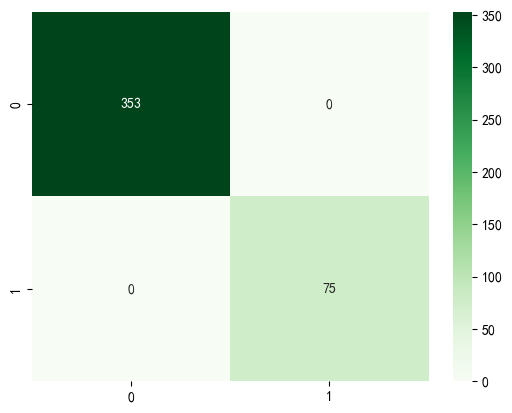

Accuracy: 1.00
Precision (macro): 1.00
Recall (macro): 1.00
F1 Score (macro): 1.00


In [30]:
###pca-smote-朴素贝叶斯
#朴素贝叶斯分类
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from mealpy.swarm_based.ZOA import OriginalZOA
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
np.random.seed(42)

# 定义交叉验证的适应度函数
def cross_val_score_gnb(var_smoothing, X, y):
    gnb = GaussianNB(var_smoothing=var_smoothing)
    gnb.fit(X, y)
    scores = cross_val_score(gnb, X, y, cv=5, scoring='accuracy')
    return scores.mean()

# 定义ZOA的适应度函数
def fitness_function(solution):
    return cross_val_score_gnb(solution[0], x_train_smote, y_train_smote)

# 定义var_smoothing的参数范围
var_smoothing_lb = 1e-9  # 下界
var_smoothing_ub = 1e-5  # 上界

# 初始化ZOA优化器
problem_dict = {
    "fit_func": fitness_function,
    "lb": [var_smoothing_lb],  # 参数的下界列表
    "ub": [var_smoothing_ub],  # 参数的上界列表
    "minmax": "max"  # 目标是最大化适应度函数
}
epoch =10  # 进化代数
pop_size =32  # 种群大小

# 创建并运行ZOA优化器
model = OriginalZOA(epoch, pop_size)
best_solution, best_fitness = model.solve(problem_dict)

# 输出最优的var_smoothing值和对应的适应度值
var_smoothing_optimal = best_solution[0]
print(f"Optimal var_smoothing: {var_smoothing_optimal}, Best Fitness: {best_fitness}")

# 使用找到的最优var_smoothing值来初始化GaussianNB
gnb_optimal = GaussianNB(var_smoothing=var_smoothing_optimal)
gnb_optimal.fit(x_train_smote, y_train_smote)
# 预测测试集
y_pred_s32= gnb_optimal.predict(X_test_pca)

# 计算训练准确率
average_accuracy = cross_val_score_gnb(var_smoothing_optimal, x_train_smote, y_train_smote)
print(f'train_accuracy: {average_accuracy:.2f}')

# 如果需要绘制混淆矩阵
conf_matrix = confusion_matrix(y_test_spring, y_pred_s32)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.show()

# 计算准确率和其他指标
accuracy = accuracy_score(y_test_spring, y_pred_s32)
precision = precision_score(y_test_spring, y_pred_s32, average='macro')
recall = recall_score(y_test_spring, y_pred_s32, average='macro')
f1 = f1_score(y_test_spring, y_pred_s32, average='macro')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision (macro): {precision:.2f}')
print(f'Recall (macro): {recall:.2f}')
print(f'F1 Score (macro): {f1:.2f}')

2024/05/31 12:27:45 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: Solving single objective optimization problem.
2024/05/31 12:27:46 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 1, Current best: 1.0, Global best: 1.0, Runtime: 0.85399 seconds
2024/05/31 12:27:47 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 2, Current best: 1.0, Global best: 1.0, Runtime: 0.77232 seconds
2024/05/31 12:27:48 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 3, Current best: 1.0, Global best: 1.0, Runtime: 0.88096 seconds
2024/05/31 12:27:49 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 4, Current best: 1.0, Global best: 1.0, Runtime: 0.90242 seconds
2024/05/31 12:27:49 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 5, Current best: 1.0, Global best: 1.0, Runtime: 0.81133 seconds
2024/05/31 12:27:50 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 6, Current best: 1.0, Global best: 1.0, Runtim

Optimal var_smoothing: 2.0878533426400506e-08, Best Fitness: 1.0
train_accuracy: 1.00


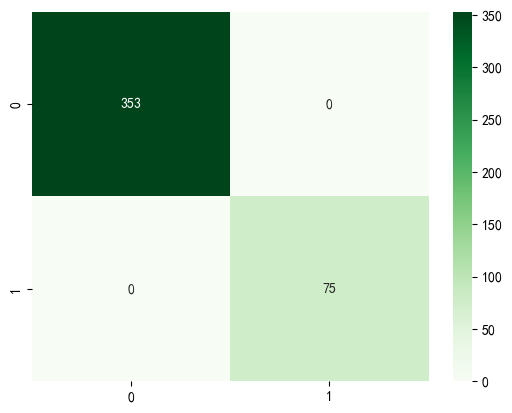

Accuracy: 1.00
Precision (macro): 1.00
Recall (macro): 1.00
F1 Score (macro): 1.00


In [31]:
###pca-nan-朴素贝叶斯
#朴素贝叶斯分类
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from mealpy.swarm_based.ZOA import OriginalZOA
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
np.random.seed(42)

# 定义交叉验证的适应度函数
def cross_val_score_gnb(var_smoothing, X, y):
    gnb = GaussianNB(var_smoothing=var_smoothing)
    gnb.fit(X, y)
    scores = cross_val_score(gnb, X, y, cv=5, scoring='accuracy')
    return scores.mean()

# 定义ZOA的适应度函数
def fitness_function(solution):
    return cross_val_score_gnb(solution[0], x_train_resampled, y_train_resampled)

# 定义var_smoothing的参数范围
var_smoothing_lb = 1e-9  # 下界
var_smoothing_ub = 1e-5  # 上界

# 初始化ZOA优化器
problem_dict = {
    "fit_func": fitness_function,
    "lb": [var_smoothing_lb],  # 参数的下界列表
    "ub": [var_smoothing_ub],  # 参数的上界列表
    "minmax": "max"  # 目标是最大化适应度函数
}
epoch =10  # 进化代数
pop_size =32  # 种群大小

# 创建并运行ZOA优化器
model = OriginalZOA(epoch, pop_size)
best_solution, best_fitness = model.solve(problem_dict)

# 输出最优的var_smoothing值和对应的适应度值
var_smoothing_optimal = best_solution[0]
print(f"Optimal var_smoothing: {var_smoothing_optimal}, Best Fitness: {best_fitness}")

# 使用找到的最优var_smoothing值来初始化GaussianNB
gnb_optimal = GaussianNB(var_smoothing=var_smoothing_optimal)
gnb_optimal.fit(x_train_resampled, y_train_resampled)
# 预测测试集
y_pred_s34= gnb_optimal.predict(X_test_pca)

# 计算训练准确率
average_accuracy = cross_val_score_gnb(var_smoothing_optimal, x_train_resampled, y_train_resampled)
print(f'train_accuracy: {average_accuracy:.2f}')

# 如果需要绘制混淆矩阵
conf_matrix = confusion_matrix(y_test_spring, y_pred_s34)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.show()

# 计算准确率和其他指标
accuracy = accuracy_score(y_test_spring, y_pred_s34)
precision = precision_score(y_test_spring, y_pred_s34, average='macro')
recall = recall_score(y_test_spring, y_pred_s34, average='macro')
f1 = f1_score(y_test_spring, y_pred_s34, average='macro')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision (macro): {precision:.2f}')
print(f'Recall (macro): {recall:.2f}')
print(f'F1 Score (macro): {f1:.2f}')

2024/05/31 03:41:57 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: Solving single objective optimization problem.
2024/05/31 04:04:35 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 1, Current best: 1.0, Global best: 1.0, Runtime: 875.76298 seconds
2024/05/31 04:17:47 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 2, Current best: 1.0, Global best: 1.0, Runtime: 791.40262 seconds


Solution: [3.e+01 1.e+01 1.e-04], Fitness: 1.0
(30.0, 10.0, 0.0001)
Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9112 - loss: 0.6697 - val_accuracy: 1.0000 - val_loss: 0.6104
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.6098 - val_accuracy: 1.0000 - val_loss: 0.5271
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.5469 - val_accuracy: 1.0000 - val_loss: 0.4412
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.4802 - val_accuracy: 1.0000 - val_loss: 0.3583
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.4178 - val_accuracy: 1.0000 - val_loss: 0.2841
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.3540 - val_accuracy: 1.0000 - val_loss: 0.2209
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.2973 - val_accuracy: 1.0000 - val_loss: 0.1707
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

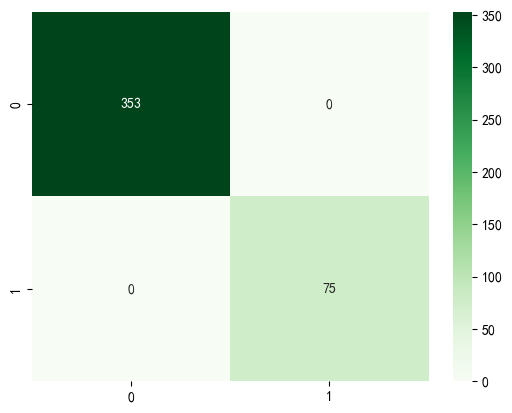

In [12]:
###pca-ros-FCNN
#FCNN前馈神经网络
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
from mealpy.swarm_based.ZOA import OriginalZOA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

np.random.seed(42)#设置随机种子，保证每次输出结果都一样
num_classes = len(set(y_test_spring))
# 使用 to_categorical 进行one-hot编码
y_train_ros_encoded = to_categorical(y_train_ros, num_classes)
y_test_spring_encoded = to_categorical(y_test_spring, num_classes)
# print(y_train_ros)            # 输出原始标签
# print(y_train_ros_encoded)    # 输出one-hot编码后的标签

# 定义您的模型创建函数
def FCNN_model(units, learning_rate, input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Input(shape=input_shape))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

from sklearn.model_selection import KFold

# 确保 create_model 函数在当前作用域内
def FCNN_model(units, learning_rate, input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Input(shape=input_shape))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def cross_val(nest):
    units, epochs, learning_rate = nest
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    val_scores = []

    # 遍历KFold生成的所有训练/验证拆分
    for train_index, val_index in kfold.split(x_train_ros):
        x_train_fold, x_val_fold = x_train_ros[train_index], x_train_ros[val_index]
        y_train_fold, y_val_fold = y_train_ros_encoded[train_index], y_train_ros_encoded[val_index]

        # 创建模型实例
        model = FCNN_model(units, learning_rate, x_train_fold.shape[1:], num_classes)
        
        # 训练模型
        model.fit(x_train_fold, y_train_fold,
                  epochs=int(epochs),
                  batch_size=32,
                  validation_data=(x_val_fold, y_val_fold),
                  verbose=0)
        
        # 评估模型性能
        val_loss, val_accuracy = model.evaluate(x_val_fold, y_val_fold, verbose=0)
        val_scores.append(val_accuracy)
    
    # 计算平均分数
    mean_val_score = np.mean(val_scores)
    return mean_val_score


# 定义适应度函数
def fitness_function(nest):
    units,epochs,learning_rate = nest
    return cross_val(nest)

# 定义适应度函数的参数范围
def get_nest():
    problem_dict1 = {
        "fit_func": fitness_function,
        "lb": [10, 10, 0.0001],
        "ub": [50, 50, 0.001],
        "minmax": "max",
    }
    epoch = 2
    pop_size = 32
    model = OriginalZOA(epoch, pop_size)
    best_position, best_fitness = model.solve(problem_dict1)
    print(f"Solution: {best_position}, Fitness: {best_fitness}")
    # 修正返回值，返回一个包含best_fitness的元组，以及best_position
    return best_fitness, (best_position[0], best_position[1], best_position[2])

# 获取最优参数
best_fitness, nest = get_nest()  # 注意这里的解包方式也改变了
units, epochs, learning_rate = nest
print(nest)
units= nest[0]
epochs= nest[1]
learning_rate =nest[2]

model = FCNN_model(units, learning_rate, x_train_ros.shape[1:], num_classes)
history = model.fit(x_train_ros, y_train_ros_encoded, epochs=int(epochs), batch_size=32, validation_split=0.2)

# 执行预测
y_pred_s41 = model.predict(X_test_pca)
y_pred_s41_classes = np.argmax(y_pred_s41, axis=1)  # 获取预测类别
y_test_spring_classes = np.argmax(y_test_spring_encoded, axis=1)  # 获取真实类别

# 计算评估指标
accuracy = accuracy_score(y_test_spring_classes, y_pred_s41_classes)
precision = precision_score(y_test_spring_classes, y_pred_s41_classes, average='macro')
recall = recall_score(y_test_spring_classes, y_pred_s41_classes, average='macro')
f1 = f1_score(y_test_spring_classes, y_pred_s41_classes, average='macro')

# 打印评估指标
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision (macro): {precision:.2f}')
print(f'Recall (macro): {recall:.2f}')
print(f'F1 Score (macro): {f1:.2f}')

# 如果需要绘制混淆矩阵
conf_matrix = confusion_matrix(y_test_spring_classes, y_pred_s41_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.show()

2024/06/01 10:23:57 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: Solving single objective optimization problem.
2024/06/01 10:34:52 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 1, Current best: 1.0, Global best: 1.0, Runtime: 421.53537 seconds
2024/06/01 10:41:42 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 2, Current best: 1.0, Global best: 1.0, Runtime: 410.00362 seconds


Solution: [3.e+01 1.e+01 1.e-04], Fitness: 1.0
(30.0, 10.0, 0.0001)
Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5558 - loss: 0.6618 - val_accuracy: 1.0000 - val_loss: 0.5395
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.5928 - val_accuracy: 1.0000 - val_loss: 0.4706
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.5193 - val_accuracy: 1.0000 - val_loss: 0.3905
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.4417 - val_accuracy: 1.0000 - val_loss: 0.3146
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.3644 - val_accuracy: 1.0000 - val_loss: 0.2473
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.2944 - val_accuracy: 1.0000 - val_loss: 0.1912
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.2276 - val_accuracy: 1.0000 - val_loss: 0.1468
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

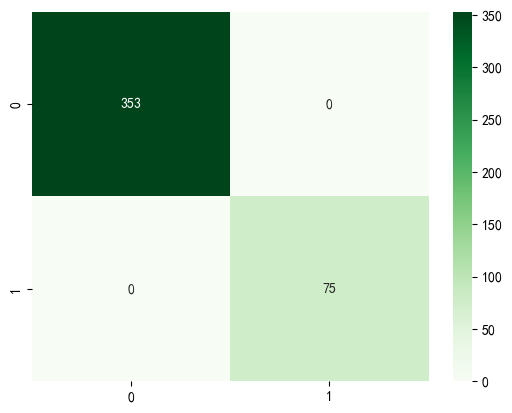

In [14]:
###pca-smote-FCNN
#FCNN前馈神经网络
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
from mealpy.swarm_based.ZOA import OriginalZOA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

np.random.seed(42)#设置随机种子，保证每次输出结果都一样
num_classes = len(set(y_test_spring))
# 使用 to_categorical 进行one-hot编码
y_train_smote_encoded = to_categorical(y_train_smote, num_classes)
y_test_spring_encoded = to_categorical(y_test_spring, num_classes)
# print(y_train_smote)            # 输出原始标签
# print(y_train_smote_encoded)    # 输出one-hot编码后的标签

# 定义您的模型创建函数
def FCNN_model(units, learning_rate, input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Input(shape=input_shape))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

from sklearn.model_selection import KFold

# 确保 create_model 函数在当前作用域内
def FCNN_model(units, learning_rate, input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Input(shape=input_shape))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def cross_val(nest):
    units, epochs, learning_rate = nest
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    val_scores = []

    # 遍历KFold生成的所有训练/验证拆分
    for train_index, val_index in kfold.split(x_train_smote):
        x_train_fold, x_val_fold = x_train_smote[train_index], x_train_smote[val_index]
        y_train_fold, y_val_fold = y_train_smote_encoded[train_index], y_train_smote_encoded[val_index]

        # 创建模型实例
        model = FCNN_model(units, learning_rate, x_train_fold.shape[1:], num_classes)
        
        # 训练模型
        model.fit(x_train_fold, y_train_fold,
                  epochs=int(epochs),
                  batch_size=32,
                  validation_data=(x_val_fold, y_val_fold),
                  verbose=0)
        
        # 评估模型性能
        val_loss, val_accuracy = model.evaluate(x_val_fold, y_val_fold, verbose=0)
        val_scores.append(val_accuracy)
    
    # 计算平均分数
    mean_val_score = np.mean(val_scores)
    return mean_val_score


# 定义适应度函数
def fitness_function(nest):
    units,epochs,learning_rate = nest
    return cross_val(nest)

# 定义适应度函数的参数范围
def get_nest():
    problem_dict1 = {
        "fit_func": fitness_function,
        "lb": [30, 10, 0.0001],
        "ub": [50, 20, 0.001],
        "minmax": "max",
    }
    epoch = 2
    pop_size = 16
    model = OriginalZOA(epoch, pop_size)
    best_position, best_fitness = model.solve(problem_dict1)
    print(f"Solution: {best_position}, Fitness: {best_fitness}")
    # 修正返回值，返回一个包含best_fitness的元组，以及best_position
    return best_fitness, (best_position[0], best_position[1], best_position[2])

# 获取最优参数
best_fitness, nest = get_nest()  # 注意这里的解包方式也改变了
units, epochs, learning_rate = nest
print(nest)
units= nest[0]
epochs= nest[1]
learning_rate =nest[2]

model = FCNN_model(units, learning_rate, x_train_smote.shape[1:], num_classes)
history = model.fit(x_train_smote, y_train_smote_encoded, epochs=int(epochs), batch_size=32, validation_split=0.2)

# 执行预测
y_pred_s42 = model.predict(X_test_pca)
y_pred_s42_classes = np.argmax(y_pred_s42, axis=1)  # 获取预测类别
y_test_spring_classes = np.argmax(y_test_spring_encoded, axis=1)  # 获取真实类别

# 计算评估指标
accuracy = accuracy_score(y_test_spring_classes, y_pred_s42_classes)
precision = precision_score(y_test_spring_classes, y_pred_s42_classes, average='macro')
recall = recall_score(y_test_spring_classes, y_pred_s42_classes, average='macro')
f1 = f1_score(y_test_spring_classes, y_pred_s42_classes, average='macro')

# 打印评估指标
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision (macro): {precision:.2f}')
print(f'Recall (macro): {recall:.2f}')
print(f'F1 Score (macro): {f1:.2f}')

# 如果需要绘制混淆矩阵
conf_matrix = confusion_matrix(y_test_spring_classes, y_pred_s42_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.show()

2024/06/01 10:50:35 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: Solving single objective optimization problem.
2024/06/01 11:05:16 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 1, Current best: 1.0, Global best: 1.0, Runtime: 573.71663 seconds
2024/06/01 11:15:51 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 2, Current best: 1.0, Global best: 1.0, Runtime: 634.81854 seconds


Solution: [3.e+01 1.e+01 1.e-04], Fitness: 1.0
(30.0, 10.0, 0.0001)
Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2888 - loss: 0.7054 - val_accuracy: 0.9911 - val_loss: 0.6309
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.6145 - val_accuracy: 1.0000 - val_loss: 0.5334
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.5165 - val_accuracy: 1.0000 - val_loss: 0.4201
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.4074 - val_accuracy: 1.0000 - val_loss: 0.2980
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.3002 - val_accuracy: 1.0000 - val_loss: 0.2001
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.2072 - val_accuracy: 1.0000 - val_loss: 0.1334
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.1383 - val_accuracy: 1.0000 - val_loss: 0.0896
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━

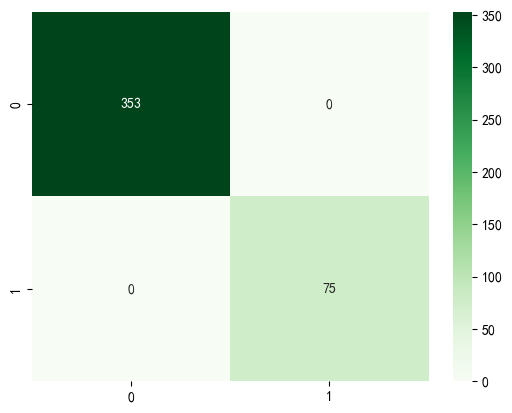

In [15]:
###pca-自然邻域-FCNN
#FCNN全连接神经网络
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
from mealpy.swarm_based.ZOA import OriginalZOA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

np.random.seed(42)#设置随机种子，保证每次输出结果都一样
num_classes = len(set(y_test_spring))
# 使用 to_categorical 进行one-hot编码
y_train_resampled_encoded = to_categorical(y_train_resampled, num_classes)
y_test_spring_encoded = to_categorical(y_test_spring, num_classes)
# print(y_train_resampled)            # 输出原始标签
# print(y_train_resampled_encoded)    # 输出one-hot编码后的标签

# 定义您的模型创建函数
def FCNN_model(units, learning_rate, input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Input(shape=input_shape))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

from sklearn.model_selection import KFold

# 确保 create_model 函数在当前作用域内
def FCNN_model(units, learning_rate, input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Input(shape=input_shape))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def cross_val(nest):
    units, epochs, learning_rate = nest
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    val_scores = []

    # 遍历KFold生成的所有训练/验证拆分
    for train_index, val_index in kfold.split(x_train_resampled):
        x_train_fold, x_val_fold = x_train_resampled[train_index], x_train_resampled[val_index]
        y_train_fold, y_val_fold = y_train_resampled_encoded[train_index], y_train_resampled_encoded[val_index]

        # 创建模型实例
        model = FCNN_model(units, learning_rate, x_train_fold.shape[1:], num_classes)
        
        # 训练模型
        model.fit(x_train_fold, y_train_fold,
                  epochs=int(epochs),
                  batch_size=32,
                  validation_data=(x_val_fold, y_val_fold),
                  verbose=0)
        
        # 评估模型性能
        val_loss, val_accuracy = model.evaluate(x_val_fold, y_val_fold, verbose=0)
        val_scores.append(val_accuracy)
    
    # 计算平均分数
    mean_val_score = np.mean(val_scores)
    return mean_val_score


# 定义适应度函数
def fitness_function(nest):
    units,epochs,learning_rate = nest
    return cross_val(nest)

# 定义适应度函数的参数范围
def get_nest():
    problem_dict1 = {
        "fit_func": fitness_function,
        "lb": [30, 10, 0.0001],
        "ub": [50, 20, 0.001],
        "minmax": "max",
    }
    epoch = 2
    pop_size = 16
    model = OriginalZOA(epoch, pop_size)
    best_position, best_fitness = model.solve(problem_dict1)
    print(f"Solution: {best_position}, Fitness: {best_fitness}")
    # 修正返回值，返回一个包含best_fitness的元组，以及best_position
    return best_fitness, (best_position[0], best_position[1], best_position[2])

# 获取最优参数
best_fitness, nest = get_nest()  # 注意这里的解包方式也改变了
units, epochs, learning_rate = nest
print(nest)
units= nest[0]
epochs= nest[1]
learning_rate =nest[2]

model = FCNN_model(units, learning_rate, x_train_resampled.shape[1:], num_classes)
history = model.fit(x_train_resampled, y_train_resampled_encoded, epochs=int(epochs), batch_size=32, validation_split=0.2)

# 执行预测
y_pred_s44 = model.predict(X_test_pca)
y_pred_s44_classes = np.argmax(y_pred_s44, axis=1)  # 获取预测类别
y_test_spring_classes = np.argmax(y_test_spring_encoded, axis=1)  # 获取真实类别

# 计算评估指标
accuracy = accuracy_score(y_test_spring_classes, y_pred_s44_classes)
precision = precision_score(y_test_spring_classes, y_pred_s44_classes, average='macro')
recall = recall_score(y_test_spring_classes, y_pred_s44_classes, average='macro')
f1 = f1_score(y_test_spring_classes, y_pred_s44_classes, average='macro')

# 打印评估指标
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision (macro): {precision:.2f}')
print(f'Recall (macro): {recall:.2f}')
print(f'F1 Score (macro): {f1:.2f}')

# 如果需要绘制混淆矩阵
conf_matrix = confusion_matrix(y_test_spring_classes, y_pred_s44_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.show()

x_train_ros shape: (2794, 2)
y_train_ros shape: (2794,)
X_test_pca shape: (428, 2)
y_test_spring shape: (428,)
y_train_cat shape: (2794, 2)
y_test_spring_encoded shape: (428, 2)
[0 0 0 ... 1 1 1]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


Model: "sequential_1277"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 37)                  │           5,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3831 (Dense)                   │ (None, 64)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3832 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3833 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,498 (41.01 KB)

 Trainable params: 10,498 (41.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9130 - loss: 0.6505 - val_accuracy: 1.0000 - val_loss: 0.4744
Epoch 2/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3604 - val_accuracy: 1.0000 - val_loss: 0.0852
Epoch 3/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0484 - val_accuracy: 1.0000 - val_loss: 0.0113
Epoch 4/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0079 - val_accuracy: 1.0000 - val_loss: 0.0043
Epoch 5/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 6/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 7/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 8/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 9.5715e-04 - val_accuracy: 1.0000 - val_

2024/05/31 04:54:19 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: Solving single objective optimization problem.
C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1278"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 41)                  │           7,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3834 (Dense)                   │ (None, 64)                  │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3835 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3836 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,050 (47.07 KB)

 Trainable params: 12,050 (47.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9493 - loss: 0.6487 - val_accuracy: 1.0000 - val_loss: 0.4270
Epoch 2/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3597 - val_accuracy: 1.0000 - val_loss: 0.0650
Epoch 3/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0435 - val_accuracy: 1.0000 - val_loss: 0.0084
Epoch 4/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0061 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 5/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 6/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 8.8344e-04
Epoch 7/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.1361e-04 - val_accuracy: 1.0000 - val_loss: 5.6927e-04
Epoch 8/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 6.3134e-04 - val_accuracy: 1

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1279"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3837 (Dense)                   │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3838 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3839 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/18
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9551 - loss: 0.6340 - val_accuracy: 1.0000 - val_loss: 0.5075
Epoch 2/18
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3118 - val_accuracy: 1.0000 - val_loss: 0.1003
Epoch 3/18
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0435 - val_accuracy: 1.0000 - val_loss: 0.0125
Epoch 4/18
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0079 - val_accuracy: 1.0000 - val_loss: 0.0048
Epoch 5/18
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 6/18
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 7/18
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 8/18
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.9726e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1280"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, 44)                  │           8,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3840 (Dense)                   │ (None, 64)                  │           2,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3841 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3842 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,298 (51.95 KB)

 Trainable params: 13,298 (51.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7027 - loss: 0.6702 - val_accuracy: 1.0000 - val_loss: 0.5903
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.4218 - val_accuracy: 1.0000 - val_loss: 0.1540
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0699 - val_accuracy: 1.0000 - val_loss: 0.0142
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0089 - val_accuracy: 1.0000 - val_loss: 0.0048
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 9.5833e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1281"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 46)                  │           9,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3843 (Dense)                   │ (None, 64)                  │           3,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3844 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3845 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,170 (55.35 KB)

 Trainable params: 14,170 (55.35 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6511 - loss: 0.6580 - val_accuracy: 0.9535 - val_loss: 0.6709
Epoch 2/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9982 - loss: 0.3976 - val_accuracy: 1.0000 - val_loss: 0.4067
Epoch 3/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.1349 - val_accuracy: 1.0000 - val_loss: 0.0623
Epoch 4/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0180 - val_accuracy: 1.0000 - val_loss: 0.0110
Epoch 5/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 1.0000 - val_loss: 0.0047
Epoch 6/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 7/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 8/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.3539e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1282"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                        │ (None, 33)                  │           4,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3846 (Dense)                   │ (None, 64)                  │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3847 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3848 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,074 (35.45 KB)

 Trainable params: 9,074 (35.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8345 - loss: 0.6488 - val_accuracy: 1.0000 - val_loss: 0.5391
Epoch 2/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3245 - val_accuracy: 1.0000 - val_loss: 0.1056
Epoch 3/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0414 - val_accuracy: 1.0000 - val_loss: 0.0122
Epoch 4/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0067 - val_accuracy: 1.0000 - val_loss: 0.0041
Epoch 5/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 6/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 7/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 9.4325e-04
Epoch 8/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.0790e-04 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1283"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 38)                  │           6,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3849 (Dense)                   │ (None, 64)                  │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3850 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3851 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,874 (42.48 KB)

 Trainable params: 10,874 (42.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7087 - loss: 0.6426 - val_accuracy: 1.0000 - val_loss: 0.6179
Epoch 2/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3252 - val_accuracy: 1.0000 - val_loss: 0.2388
Epoch 3/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0686 - val_accuracy: 1.0000 - val_loss: 0.0230
Epoch 4/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0082 - val_accuracy: 1.0000 - val_loss: 0.0051
Epoch 5/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 6/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 7/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.6828e-04 - val_accuracy: 1.0000 - val_loss: 5.7054e-04
Epoch 8/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4.8398e-04 - val_accuracy: 1.000

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1284"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                        │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3852 (Dense)                   │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3853 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3854 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7542 - loss: 0.6732 - val_accuracy: 1.0000 - val_loss: 0.5635
Epoch 2/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4590 - val_accuracy: 1.0000 - val_loss: 0.1307
Epoch 3/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0915 - val_accuracy: 1.0000 - val_loss: 0.0132
Epoch 4/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0103 - val_accuracy: 1.0000 - val_loss: 0.0045
Epoch 5/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 6/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 7/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 8/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.6744e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1285"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, 39)                  │           6,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3855 (Dense)                   │ (None, 64)                  │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3856 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3857 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,258 (43.98 KB)

 Trainable params: 11,258 (43.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/17
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9293 - loss: 0.6424 - val_accuracy: 1.0000 - val_loss: 0.4556
Epoch 2/17
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3206 - val_accuracy: 1.0000 - val_loss: 0.0690
Epoch 3/17
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0389 - val_accuracy: 1.0000 - val_loss: 0.0092
Epoch 4/17
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0069 - val_accuracy: 1.0000 - val_loss: 0.0038
Epoch 5/17
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 6/17
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 7/17
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 8/17
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.1159e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1286"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_11 (LSTM)                       │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3858 (Dense)                   │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3859 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3860 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8960 - loss: 0.6544 - val_accuracy: 1.0000 - val_loss: 0.5048
Epoch 2/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3688 - val_accuracy: 1.0000 - val_loss: 0.0853
Epoch 3/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0528 - val_accuracy: 1.0000 - val_loss: 0.0096
Epoch 4/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0076 - val_accuracy: 1.0000 - val_loss: 0.0034
Epoch 5/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 6/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 7/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.9755e-04 - val_accuracy: 1.0000 - val_loss: 7.6134e-04
Epoch 8/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 5.4322e-04 - val_accuracy: 1.000

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1287"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 42)                  │           7,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3861 (Dense)                   │ (None, 64)                  │           2,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3862 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3863 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,458 (48.66 KB)

 Trainable params: 12,458 (48.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9118 - loss: 0.6452 - val_accuracy: 1.0000 - val_loss: 0.4075
Epoch 2/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3537 - val_accuracy: 1.0000 - val_loss: 0.0439
Epoch 3/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0453 - val_accuracy: 1.0000 - val_loss: 0.0059
Epoch 4/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0060 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 5/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 6/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 9.8737e-04
Epoch 7/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.8709e-04 - val_accuracy: 1.0000 - val_loss: 7.0399e-04
Epoch 8/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 6.9198e-04 - val_accuracy: 1

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1288"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_13 (LSTM)                       │ (None, 48)                  │           9,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3864 (Dense)                   │ (None, 64)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3865 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3866 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,074 (58.88 KB)

 Trainable params: 15,074 (58.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9318 - loss: 0.6437 - val_accuracy: 1.0000 - val_loss: 0.4524
Epoch 2/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3097 - val_accuracy: 1.0000 - val_loss: 0.0610
Epoch 3/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0307 - val_accuracy: 1.0000 - val_loss: 0.0080
Epoch 4/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 5/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 6/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 7/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.5374e-04 - val_accuracy: 1.0000 - val_loss: 8.9536e-04
Epoch 8/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 6.8784e-04 - val_accuracy: 1.000

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1289"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                       │ (None, 36)                  │           5,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3867 (Dense)                   │ (None, 64)                  │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3868 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3869 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,130 (39.57 KB)

 Trainable params: 10,130 (39.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8620 - loss: 0.6474 - val_accuracy: 1.0000 - val_loss: 0.5339
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3321 - val_accuracy: 1.0000 - val_loss: 0.1257
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0443 - val_accuracy: 1.0000 - val_loss: 0.0152
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0068 - val_accuracy: 1.0000 - val_loss: 0.0054
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.4458e-04 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 6.5438e-04 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1290"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                       │ (None, 38)                  │           6,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3870 (Dense)                   │ (None, 64)                  │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3871 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3872 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,874 (42.48 KB)

 Trainable params: 10,874 (42.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9244 - loss: 0.6562 - val_accuracy: 1.0000 - val_loss: 0.4958
Epoch 2/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3778 - val_accuracy: 1.0000 - val_loss: 0.0926
Epoch 3/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0528 - val_accuracy: 1.0000 - val_loss: 0.0115
Epoch 4/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0077 - val_accuracy: 1.0000 - val_loss: 0.0044
Epoch 5/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 6/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 7/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 8/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.0945e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1291"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3873 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3874 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3875 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8771 - loss: 0.6475 - val_accuracy: 1.0000 - val_loss: 0.4355
Epoch 2/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3655 - val_accuracy: 1.0000 - val_loss: 0.0637
Epoch 3/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0552 - val_accuracy: 1.0000 - val_loss: 0.0084
Epoch 4/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0084 - val_accuracy: 1.0000 - val_loss: 0.0035
Epoch 5/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 6/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 7/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 9.2772e-04
Epoch 8/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.8686e-04 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1292"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_17 (LSTM)                       │ (None, 43)                  │           7,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3876 (Dense)                   │ (None, 64)                  │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3877 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3878 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,874 (50.29 KB)

 Trainable params: 12,874 (50.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5836 - loss: 0.6718 - val_accuracy: 1.0000 - val_loss: 0.6615
Epoch 2/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4513 - val_accuracy: 1.0000 - val_loss: 0.3632
Epoch 3/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1196 - val_accuracy: 1.0000 - val_loss: 0.0416
Epoch 4/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0129 - val_accuracy: 1.0000 - val_loss: 0.0073
Epoch 5/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 6/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 7/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 8/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.7304e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1293"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                       │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3879 (Dense)                   │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3880 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3881 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9805 - loss: 0.6407 - val_accuracy: 1.0000 - val_loss: 0.4423
Epoch 2/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.2991 - val_accuracy: 1.0000 - val_loss: 0.0529
Epoch 3/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0308 - val_accuracy: 1.0000 - val_loss: 0.0072
Epoch 4/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0056 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 5/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 6/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 7/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.8583e-04 - val_accuracy: 1.0000 - val_loss: 8.6391e-04
Epoch 8/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 6.9197e-04 - val_accuracy: 1.000

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1294"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_19 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3882 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3883 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3884 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7253 - loss: 0.6550 - val_accuracy: 1.0000 - val_loss: 0.5988
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3781 - val_accuracy: 1.0000 - val_loss: 0.1989
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0719 - val_accuracy: 1.0000 - val_loss: 0.0198
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0094 - val_accuracy: 1.0000 - val_loss: 0.0053
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 8.9145e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.4449e-04 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1295"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3885 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3886 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3887 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8957 - loss: 0.6678 - val_accuracy: 1.0000 - val_loss: 0.5426
Epoch 2/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4343 - val_accuracy: 1.0000 - val_loss: 0.1111
Epoch 3/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0808 - val_accuracy: 1.0000 - val_loss: 0.0126
Epoch 4/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0109 - val_accuracy: 1.0000 - val_loss: 0.0045
Epoch 5/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 6/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 7/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 8/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.6753e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1296"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_21 (LSTM)                       │ (None, 43)                  │           7,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3888 (Dense)                   │ (None, 64)                  │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3889 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3890 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,874 (50.29 KB)

 Trainable params: 12,874 (50.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8247 - loss: 0.6542 - val_accuracy: 1.0000 - val_loss: 0.5046
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3267 - val_accuracy: 1.0000 - val_loss: 0.0786
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0351 - val_accuracy: 1.0000 - val_loss: 0.0092
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0060 - val_accuracy: 1.0000 - val_loss: 0.0036
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.4486e-04 - val_accuracy: 1.0000 - val_loss: 8.8654e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 5.5964e-04 - val_accuracy: 1.000

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1297"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_22 (LSTM)                       │ (None, 45)                  │           8,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3891 (Dense)                   │ (None, 64)                  │           2,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3892 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3893 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,730 (53.63 KB)

 Trainable params: 13,730 (53.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9420 - loss: 0.6402 - val_accuracy: 1.0000 - val_loss: 0.3905
Epoch 2/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.2883 - val_accuracy: 1.0000 - val_loss: 0.0409
Epoch 3/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0283 - val_accuracy: 1.0000 - val_loss: 0.0067
Epoch 4/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 5/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 6/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 7/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.4296e-04 - val_accuracy: 1.0000 - val_loss: 7.3056e-04
Epoch 8/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 6.5831e-04 - val_accuracy: 1.000

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1298"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_23 (LSTM)                       │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3894 (Dense)                   │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3895 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3896 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9346 - loss: 0.6449 - val_accuracy: 1.0000 - val_loss: 0.5143
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3278 - val_accuracy: 1.0000 - val_loss: 0.0775
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0376 - val_accuracy: 1.0000 - val_loss: 0.0091
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0064 - val_accuracy: 1.0000 - val_loss: 0.0035
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 9.1769e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.1154e-04 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1299"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_24 (LSTM)                       │ (None, 38)                  │           6,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3897 (Dense)                   │ (None, 64)                  │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3898 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3899 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,874 (42.48 KB)

 Trainable params: 10,874 (42.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8736 - loss: 0.6617 - val_accuracy: 1.0000 - val_loss: 0.5144
Epoch 2/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4189 - val_accuracy: 1.0000 - val_loss: 0.1184
Epoch 3/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0846 - val_accuracy: 1.0000 - val_loss: 0.0127
Epoch 4/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0104 - val_accuracy: 1.0000 - val_loss: 0.0042
Epoch 5/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 6/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 7/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 9.1209e-04
Epoch 8/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.8392e-04 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1300"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_25 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3900 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3901 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3902 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8664 - loss: 0.6648 - val_accuracy: 1.0000 - val_loss: 0.5303
Epoch 2/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4281 - val_accuracy: 1.0000 - val_loss: 0.1491
Epoch 3/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0803 - val_accuracy: 1.0000 - val_loss: 0.0167
Epoch 4/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0101 - val_accuracy: 1.0000 - val_loss: 0.0052
Epoch 5/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 6/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 7/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 8/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.6317e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1301"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_26 (LSTM)                       │ (None, 41)                  │           7,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3903 (Dense)                   │ (None, 64)                  │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3904 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3905 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,050 (47.07 KB)

 Trainable params: 12,050 (47.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8846 - loss: 0.6537 - val_accuracy: 1.0000 - val_loss: 0.4831
Epoch 2/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3566 - val_accuracy: 1.0000 - val_loss: 0.0655
Epoch 3/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0441 - val_accuracy: 1.0000 - val_loss: 0.0079
Epoch 4/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0068 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 5/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 6/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 7/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 8.5858e-04
Epoch 8/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.5643e-04 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1302"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_27 (LSTM)                       │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3906 (Dense)                   │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3907 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3908 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/14
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9547 - loss: 0.6456 - val_accuracy: 1.0000 - val_loss: 0.4006
Epoch 2/14
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3406 - val_accuracy: 1.0000 - val_loss: 0.0436
Epoch 3/14
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0516 - val_accuracy: 1.0000 - val_loss: 0.0076
Epoch 4/14
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0082 - val_accuracy: 1.0000 - val_loss: 0.0034
Epoch 5/14
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 6/14
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 7/14
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 9.8591e-04
Epoch 8/14
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.8114e-04 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1303"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_28 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3909 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3910 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3911 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7866 - loss: 0.6734 - val_accuracy: 1.0000 - val_loss: 0.5963
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4871 - val_accuracy: 1.0000 - val_loss: 0.1849
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1336 - val_accuracy: 1.0000 - val_loss: 0.0187
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0179 - val_accuracy: 1.0000 - val_loss: 0.0053
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0056 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 9.8563e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1304"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_29 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3912 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3913 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3914 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 170s 81ms/step - accuracy: 0.9674 - loss: 0.6435 - val_accuracy: 1.0000 - val_loss: 0.4482
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3524 - val_accuracy: 1.0000 - val_loss: 0.0689
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0524 - val_accuracy: 1.0000 - val_loss: 0.0095
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0083 - val_accuracy: 1.0000 - val_loss: 0.0037
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 9.1319e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 8.2181e-04 - val_accuracy: 1.0000 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1305"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_30 (LSTM)                       │ (None, 39)                  │           6,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3915 (Dense)                   │ (None, 64)                  │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3916 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3917 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,258 (43.98 KB)

 Trainable params: 11,258 (43.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8342 - loss: 0.6518 - val_accuracy: 1.0000 - val_loss: 0.6079
Epoch 2/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3702 - val_accuracy: 1.0000 - val_loss: 0.2181
Epoch 3/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0643 - val_accuracy: 1.0000 - val_loss: 0.0226
Epoch 4/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0089 - val_accuracy: 1.0000 - val_loss: 0.0060
Epoch 5/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 6/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 7/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 8/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.4190e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1306"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_31 (LSTM)                       │ (None, 38)                  │           6,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3918 (Dense)                   │ (None, 64)                  │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3919 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3920 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,874 (42.48 KB)

 Trainable params: 10,874 (42.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9241 - loss: 0.6578 - val_accuracy: 1.0000 - val_loss: 0.5112
Epoch 2/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4113 - val_accuracy: 1.0000 - val_loss: 0.0963
Epoch 3/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0768 - val_accuracy: 1.0000 - val_loss: 0.0101
Epoch 4/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0099 - val_accuracy: 1.0000 - val_loss: 0.0037
Epoch 5/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 6/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 7/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 9.5231e-04
Epoch 8/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.7284e-04 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1307"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_32 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3921 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3922 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3923 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7227 - loss: 0.6702 - val_accuracy: 0.9678 - val_loss: 0.6463
Epoch 2/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9970 - loss: 0.4596 - val_accuracy: 1.0000 - val_loss: 0.2994
Epoch 3/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1075 - val_accuracy: 1.0000 - val_loss: 0.0302
Epoch 4/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0115 - val_accuracy: 1.0000 - val_loss: 0.0073
Epoch 5/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 1.0000 - val_loss: 0.0036
Epoch 6/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 7/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 8/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.2881e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1308"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_33 (LSTM)                       │ (None, 33)                  │           4,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3924 (Dense)                   │ (None, 64)                  │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3925 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3926 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,074 (35.45 KB)

 Trainable params: 9,074 (35.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8786 - loss: 0.6677 - val_accuracy: 1.0000 - val_loss: 0.5454
Epoch 2/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4384 - val_accuracy: 1.0000 - val_loss: 0.1186
Epoch 3/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0914 - val_accuracy: 1.0000 - val_loss: 0.0132
Epoch 4/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0125 - val_accuracy: 1.0000 - val_loss: 0.0046
Epoch 5/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 6/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 7/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 8/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1309"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_34 (LSTM)                       │ (None, 41)                  │           7,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3927 (Dense)                   │ (None, 64)                  │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3928 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3929 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,050 (47.07 KB)

 Trainable params: 12,050 (47.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8559 - loss: 0.6583 - val_accuracy: 1.0000 - val_loss: 0.5816
Epoch 2/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3950 - val_accuracy: 1.0000 - val_loss: 0.1551
Epoch 3/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0646 - val_accuracy: 1.0000 - val_loss: 0.0131
Epoch 4/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0077 - val_accuracy: 1.0000 - val_loss: 0.0038
Epoch 5/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 6/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 7/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 9.9332e-04 - val_accuracy: 1.0000 - val_loss: 8.2453e-04
Epoch 8/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 6.8205e-04 - val_accuracy: 1.000

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1310"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_35 (LSTM)                       │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3930 (Dense)                   │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3931 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3932 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9259 - loss: 0.6451 - val_accuracy: 1.0000 - val_loss: 0.4812
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3196 - val_accuracy: 1.0000 - val_loss: 0.0794
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0399 - val_accuracy: 1.0000 - val_loss: 0.0107
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0073 - val_accuracy: 1.0000 - val_loss: 0.0043
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.8266e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1311"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_36 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3933 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3934 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3935 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9326 - loss: 0.6579 - val_accuracy: 1.0000 - val_loss: 0.5379
Epoch 2/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3935 - val_accuracy: 1.0000 - val_loss: 0.1506
Epoch 3/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0646 - val_accuracy: 1.0000 - val_loss: 0.0176
Epoch 4/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0087 - val_accuracy: 1.0000 - val_loss: 0.0050
Epoch 5/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 6/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 7/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 8/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.6851e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1312"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_37 (LSTM)                       │ (None, 45)                  │           8,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3936 (Dense)                   │ (None, 64)                  │           2,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3937 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3938 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,730 (53.63 KB)

 Trainable params: 13,730 (53.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.8949 - loss: 0.6621 - val_accuracy: 1.0000 - val_loss: 0.3788
Epoch 2/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.4401 - val_accuracy: 1.0000 - val_loss: 0.0345
Epoch 3/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.1561 - val_accuracy: 1.0000 - val_loss: 0.0078
Epoch 4/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0222 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 5/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0055 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 6/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 1.0000 - val_loss: 8.4365e-04
Epoch 7/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 5.8944e-04
Epoch 8/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 -

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1313"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_38 (LSTM)                       │ (None, 47)                  │           9,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3939 (Dense)                   │ (None, 64)                  │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3940 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3941 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,618 (57.10 KB)

 Trainable params: 14,618 (57.10 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.8895 - loss: 0.6529 - val_accuracy: 1.0000 - val_loss: 0.4886
Epoch 2/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.3450 - val_accuracy: 1.0000 - val_loss: 0.0649
Epoch 3/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0384 - val_accuracy: 1.0000 - val_loss: 0.0078
Epoch 4/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0059 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 5/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 6/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 7/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 9.5544e-04
Epoch 8/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.8000e-04 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1314"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_39 (LSTM)                       │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3942 (Dense)                   │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3943 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3944 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9288 - loss: 0.6426 - val_accuracy: 1.0000 - val_loss: 0.5074
Epoch 2/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3296 - val_accuracy: 1.0000 - val_loss: 0.1204
Epoch 3/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0535 - val_accuracy: 1.0000 - val_loss: 0.0166
Epoch 4/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0097 - val_accuracy: 1.0000 - val_loss: 0.0051
Epoch 5/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 6/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 7/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 8/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1315"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_40 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3945 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3946 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3947 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8096 - loss: 0.6658 - val_accuracy: 1.0000 - val_loss: 0.4624
Epoch 2/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4563 - val_accuracy: 1.0000 - val_loss: 0.0682
Epoch 3/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1525 - val_accuracy: 1.0000 - val_loss: 0.0096
Epoch 4/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0249 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 5/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0066 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 6/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 7.5032e-04
Epoch 7/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 4.1880e-04
Epoch 8/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1316"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_41 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3948 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3949 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3950 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9710 - loss: 0.6559 - val_accuracy: 1.0000 - val_loss: 0.5267
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3912 - val_accuracy: 1.0000 - val_loss: 0.1235
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0645 - val_accuracy: 1.0000 - val_loss: 0.0137
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0094 - val_accuracy: 1.0000 - val_loss: 0.0048
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.4781e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1317"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_42 (LSTM)                       │ (None, 45)                  │           8,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3951 (Dense)                   │ (None, 64)                  │           2,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3952 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3953 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,730 (53.63 KB)

 Trainable params: 13,730 (53.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9437 - loss: 0.6544 - val_accuracy: 1.0000 - val_loss: 0.5245
Epoch 2/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3607 - val_accuracy: 1.0000 - val_loss: 0.0954
Epoch 3/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0459 - val_accuracy: 1.0000 - val_loss: 0.0093
Epoch 4/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0066 - val_accuracy: 1.0000 - val_loss: 0.0036
Epoch 5/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 6/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 7/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 9.1122e-04
Epoch 8/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.6384e-04 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1318"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_43 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3954 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3955 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3956 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8710 - loss: 0.6471 - val_accuracy: 1.0000 - val_loss: 0.5372
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3422 - val_accuracy: 1.0000 - val_loss: 0.1269
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0538 - val_accuracy: 1.0000 - val_loss: 0.0159
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0094 - val_accuracy: 1.0000 - val_loss: 0.0057
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1319"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_44 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3957 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3958 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3959 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9500 - loss: 0.6468 - val_accuracy: 1.0000 - val_loss: 0.5470
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3416 - val_accuracy: 1.0000 - val_loss: 0.1349
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0493 - val_accuracy: 1.0000 - val_loss: 0.0146
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0077 - val_accuracy: 1.0000 - val_loss: 0.0047
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.0003e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1320"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_45 (LSTM)                       │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3960 (Dense)                   │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3961 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3962 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8255 - loss: 0.6637 - val_accuracy: 1.0000 - val_loss: 0.5349
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3917 - val_accuracy: 1.0000 - val_loss: 0.1099
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0573 - val_accuracy: 1.0000 - val_loss: 0.0126
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0084 - val_accuracy: 1.0000 - val_loss: 0.0045
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.5878e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1321"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_46 (LSTM)                       │ (None, 35)                  │           5,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3963 (Dense)                   │ (None, 64)                  │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3964 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3965 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,770 (38.16 KB)

 Trainable params: 9,770 (38.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8951 - loss: 0.6478 - val_accuracy: 1.0000 - val_loss: 0.4042
Epoch 2/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3593 - val_accuracy: 1.0000 - val_loss: 0.0488
Epoch 3/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0564 - val_accuracy: 1.0000 - val_loss: 0.0077
Epoch 4/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0081 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 5/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 6/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 7/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 9.0527e-04
Epoch 8/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.6103e-04 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1322"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_47 (LSTM)                       │ (None, 41)                  │           7,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3966 (Dense)                   │ (None, 64)                  │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3967 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3968 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,050 (47.07 KB)

 Trainable params: 12,050 (47.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8629 - loss: 0.6509 - val_accuracy: 1.0000 - val_loss: 0.4254
Epoch 2/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3771 - val_accuracy: 1.0000 - val_loss: 0.0606
Epoch 3/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0603 - val_accuracy: 1.0000 - val_loss: 0.0087
Epoch 4/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0081 - val_accuracy: 1.0000 - val_loss: 0.0035
Epoch 5/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 6/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 7/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 9.4443e-04
Epoch 8/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.4158e-04 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1323"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_48 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3969 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3970 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3971 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9590 - loss: 0.6597 - val_accuracy: 1.0000 - val_loss: 0.5482
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4354 - val_accuracy: 1.0000 - val_loss: 0.1469
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0906 - val_accuracy: 1.0000 - val_loss: 0.0157
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0111 - val_accuracy: 1.0000 - val_loss: 0.0050
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.3443e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1324"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_49 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3972 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3973 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3974 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9693 - loss: 0.6479 - val_accuracy: 1.0000 - val_loss: 0.5306
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3472 - val_accuracy: 1.0000 - val_loss: 0.1487
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0567 - val_accuracy: 1.0000 - val_loss: 0.0173
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0089 - val_accuracy: 1.0000 - val_loss: 0.0055
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.2885e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1325"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_50 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3975 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3976 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3977 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8560 - loss: 0.6564 - val_accuracy: 1.0000 - val_loss: 0.5266
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3756 - val_accuracy: 1.0000 - val_loss: 0.1251
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0613 - val_accuracy: 1.0000 - val_loss: 0.0149
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0096 - val_accuracy: 1.0000 - val_loss: 0.0053
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.8880e-04 - val_accuracy: 1.0000 - val_

2024/05/31 05:00:51 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 1, Current best: 1.0, Global best: 1.0, Runtime: 322.92848 seconds
C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1326"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_51 (LSTM)                       │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3978 (Dense)                   │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3979 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3980 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9837 - loss: 0.6314 - val_accuracy: 1.0000 - val_loss: 0.3669
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.2882 - val_accuracy: 1.0000 - val_loss: 0.0436
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0331 - val_accuracy: 1.0000 - val_loss: 0.0081
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0067 - val_accuracy: 1.0000 - val_loss: 0.0037
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.2266e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1327"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_52 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3981 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3982 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3983 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8992 - loss: 0.6623 - val_accuracy: 1.0000 - val_loss: 0.5130
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4230 - val_accuracy: 1.0000 - val_loss: 0.1132
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0850 - val_accuracy: 1.0000 - val_loss: 0.0132
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0113 - val_accuracy: 1.0000 - val_loss: 0.0045
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.9746e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1328"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_53 (LSTM)                       │ (None, 34)                  │           5,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3984 (Dense)                   │ (None, 64)                  │           2,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3985 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3986 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,418 (36.79 KB)

 Trainable params: 9,418 (36.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8972 - loss: 0.6461 - val_accuracy: 1.0000 - val_loss: 0.4884
Epoch 2/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3586 - val_accuracy: 1.0000 - val_loss: 0.1015
Epoch 3/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0594 - val_accuracy: 1.0000 - val_loss: 0.0134
Epoch 4/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0103 - val_accuracy: 1.0000 - val_loss: 0.0053
Epoch 5/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0043 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 6/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 7/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 8/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1329"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_54 (LSTM)                       │ (None, 37)                  │           5,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3987 (Dense)                   │ (None, 64)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3988 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3989 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,498 (41.01 KB)

 Trainable params: 10,498 (41.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8677 - loss: 0.6609 - val_accuracy: 1.0000 - val_loss: 0.5558
Epoch 2/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4102 - val_accuracy: 1.0000 - val_loss: 0.1371
Epoch 3/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0718 - val_accuracy: 1.0000 - val_loss: 0.0123
Epoch 4/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0092 - val_accuracy: 1.0000 - val_loss: 0.0042
Epoch 5/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 6/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 7/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 8.8174e-04
Epoch 8/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.2422e-04 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1330"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_55 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3990 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3991 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3992 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8435 - loss: 0.6664 - val_accuracy: 1.0000 - val_loss: 0.5146
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4500 - val_accuracy: 1.0000 - val_loss: 0.0967
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1072 - val_accuracy: 1.0000 - val_loss: 0.0111
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0126 - val_accuracy: 1.0000 - val_loss: 0.0038
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 8.9049e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.0048e-04 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1331"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_56 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3993 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3994 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3995 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8191 - loss: 0.6722 - val_accuracy: 1.0000 - val_loss: 0.5824
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4778 - val_accuracy: 1.0000 - val_loss: 0.1595
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1115 - val_accuracy: 1.0000 - val_loss: 0.0149
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0124 - val_accuracy: 1.0000 - val_loss: 0.0041
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 7.7388e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.2204e-04 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1332"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_57 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3996 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3997 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3998 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9666 - loss: 0.6440 - val_accuracy: 1.0000 - val_loss: 0.5415
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3537 - val_accuracy: 1.0000 - val_loss: 0.1770
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0734 - val_accuracy: 1.0000 - val_loss: 0.0254
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0121 - val_accuracy: 1.0000 - val_loss: 0.0079
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 1.0000 - val_loss: 0.0037
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.1097e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1333"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_58 (LSTM)                       │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3999 (Dense)                   │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4000 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4001 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/14
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9361 - loss: 0.6412 - val_accuracy: 1.0000 - val_loss: 0.4943
Epoch 2/14
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3105 - val_accuracy: 1.0000 - val_loss: 0.1207
Epoch 3/14
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0422 - val_accuracy: 1.0000 - val_loss: 0.0155
Epoch 4/14
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0073 - val_accuracy: 1.0000 - val_loss: 0.0053
Epoch 5/14
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 6/14
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 7/14
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 8/14
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.0899e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1334"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_59 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4002 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4003 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4004 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8275 - loss: 0.6613 - val_accuracy: 1.0000 - val_loss: 0.5010
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4210 - val_accuracy: 1.0000 - val_loss: 0.0952
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0952 - val_accuracy: 1.0000 - val_loss: 0.0096
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0132 - val_accuracy: 1.0000 - val_loss: 0.0035
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 8.8187e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.6187e-04 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1335"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_60 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4005 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4006 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4007 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9801 - loss: 0.6361 - val_accuracy: 1.0000 - val_loss: 0.3649
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3074 - val_accuracy: 1.0000 - val_loss: 0.0450
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0390 - val_accuracy: 1.0000 - val_loss: 0.0079
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0072 - val_accuracy: 1.0000 - val_loss: 0.0035
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 8.8228e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.0658e-04 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1336"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_61 (LSTM)                       │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4008 (Dense)                   │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4009 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4010 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8665 - loss: 0.6501 - val_accuracy: 1.0000 - val_loss: 0.5419
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3625 - val_accuracy: 1.0000 - val_loss: 0.1361
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0594 - val_accuracy: 1.0000 - val_loss: 0.0162
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0097 - val_accuracy: 1.0000 - val_loss: 0.0056
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1337"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_62 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4011 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4012 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4013 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8911 - loss: 0.6545 - val_accuracy: 1.0000 - val_loss: 0.4976
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3643 - val_accuracy: 1.0000 - val_loss: 0.1046
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0510 - val_accuracy: 1.0000 - val_loss: 0.0123
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0078 - val_accuracy: 1.0000 - val_loss: 0.0045
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.1598e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1338"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_63 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4014 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4015 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4016 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8728 - loss: 0.6480 - val_accuracy: 1.0000 - val_loss: 0.4340
Epoch 2/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3533 - val_accuracy: 1.0000 - val_loss: 0.0579
Epoch 3/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0567 - val_accuracy: 1.0000 - val_loss: 0.0082
Epoch 4/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0093 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 5/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 6/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 7/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 6.8054e-04
Epoch 8/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.2777e-04 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1339"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_64 (LSTM)                       │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4017 (Dense)                   │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4018 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4019 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9422 - loss: 0.6549 - val_accuracy: 1.0000 - val_loss: 0.4676
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3688 - val_accuracy: 1.0000 - val_loss: 0.0666
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0558 - val_accuracy: 1.0000 - val_loss: 0.0088
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0089 - val_accuracy: 1.0000 - val_loss: 0.0035
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 6.4386e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.3208e-04 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1340"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_65 (LSTM)                       │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4020 (Dense)                   │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4021 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4022 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8618 - loss: 0.6629 - val_accuracy: 1.0000 - val_loss: 0.5747
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4282 - val_accuracy: 1.0000 - val_loss: 0.1799
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0962 - val_accuracy: 1.0000 - val_loss: 0.0187
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0125 - val_accuracy: 1.0000 - val_loss: 0.0049
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 9.0242e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.6633e-04 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1341"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_66 (LSTM)                       │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4023 (Dense)                   │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4024 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4025 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7776 - loss: 0.6650 - val_accuracy: 1.0000 - val_loss: 0.6147
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4283 - val_accuracy: 1.0000 - val_loss: 0.2682
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0945 - val_accuracy: 1.0000 - val_loss: 0.0306
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0116 - val_accuracy: 1.0000 - val_loss: 0.0067
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 9.9495e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.2138e-04 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1342"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_67 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4026 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4027 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4028 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8873 - loss: 0.6547 - val_accuracy: 1.0000 - val_loss: 0.4985
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3685 - val_accuracy: 1.0000 - val_loss: 0.0760
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0558 - val_accuracy: 1.0000 - val_loss: 0.0097
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0093 - val_accuracy: 1.0000 - val_loss: 0.0038
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 9.8297e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1343"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_68 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4029 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4030 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4031 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9411 - loss: 0.6631 - val_accuracy: 1.0000 - val_loss: 0.5095
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4401 - val_accuracy: 1.0000 - val_loss: 0.1041
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0953 - val_accuracy: 1.0000 - val_loss: 0.0124
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0128 - val_accuracy: 1.0000 - val_loss: 0.0045
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1344"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_69 (LSTM)                       │ (None, 34)                  │           5,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4032 (Dense)                   │ (None, 64)                  │           2,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4033 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4034 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,418 (36.79 KB)

 Trainable params: 9,418 (36.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6367 - loss: 0.6537 - val_accuracy: 0.9714 - val_loss: 0.6719
Epoch 2/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3847 - val_accuracy: 1.0000 - val_loss: 0.4685
Epoch 3/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1596 - val_accuracy: 1.0000 - val_loss: 0.1469
Epoch 4/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0393 - val_accuracy: 1.0000 - val_loss: 0.0249
Epoch 5/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0086 - val_accuracy: 1.0000 - val_loss: 0.0082
Epoch 6/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 0.0043
Epoch 7/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 8/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1345"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_70 (LSTM)                       │ (None, 37)                  │           5,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4035 (Dense)                   │ (None, 64)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4036 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4037 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,498 (41.01 KB)

 Trainable params: 10,498 (41.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9232 - loss: 0.6452 - val_accuracy: 1.0000 - val_loss: 0.4431
Epoch 2/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3343 - val_accuracy: 1.0000 - val_loss: 0.0762
Epoch 3/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0445 - val_accuracy: 1.0000 - val_loss: 0.0102
Epoch 4/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0070 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 5/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 6/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 8.1752e-04
Epoch 7/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.7556e-04 - val_accuracy: 1.0000 - val_loss: 4.8497e-04
Epoch 8/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 5.7151e-04 - val_accuracy: 1

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1346"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_71 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4038 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4039 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4040 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9363 - loss: 0.6597 - val_accuracy: 1.0000 - val_loss: 0.5115
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4051 - val_accuracy: 1.0000 - val_loss: 0.1072
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0720 - val_accuracy: 1.0000 - val_loss: 0.0130
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0103 - val_accuracy: 1.0000 - val_loss: 0.0049
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.2649e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1347"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_72 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4041 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4042 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4043 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9100 - loss: 0.6447 - val_accuracy: 1.0000 - val_loss: 0.5084
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3245 - val_accuracy: 1.0000 - val_loss: 0.1094
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0435 - val_accuracy: 1.0000 - val_loss: 0.0156
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0077 - val_accuracy: 1.0000 - val_loss: 0.0059
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.6472e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1348"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_73 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4044 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4045 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4046 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8467 - loss: 0.6577 - val_accuracy: 1.0000 - val_loss: 0.5175
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4053 - val_accuracy: 1.0000 - val_loss: 0.1149
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0737 - val_accuracy: 1.0000 - val_loss: 0.0142
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0099 - val_accuracy: 1.0000 - val_loss: 0.0044
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 8.5109e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.1270e-04 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1349"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_74 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4047 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4048 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4049 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8380 - loss: 0.6570 - val_accuracy: 1.0000 - val_loss: 0.6024
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3972 - val_accuracy: 1.0000 - val_loss: 0.1768
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0749 - val_accuracy: 1.0000 - val_loss: 0.0189
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0112 - val_accuracy: 1.0000 - val_loss: 0.0061
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1350"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_75 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4050 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4051 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4052 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9342 - loss: 0.6375 - val_accuracy: 1.0000 - val_loss: 0.3883
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3325 - val_accuracy: 1.0000 - val_loss: 0.0472
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0530 - val_accuracy: 1.0000 - val_loss: 0.0079
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0085 - val_accuracy: 1.0000 - val_loss: 0.0034
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 6.8284e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 7.2124e-04 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1351"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_76 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4053 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4054 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4055 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8138 - loss: 0.6563 - val_accuracy: 1.0000 - val_loss: 0.5388
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3871 - val_accuracy: 1.0000 - val_loss: 0.1579
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0701 - val_accuracy: 1.0000 - val_loss: 0.0203
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0105 - val_accuracy: 1.0000 - val_loss: 0.0066
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 1.0000 - val_loss: 0.0035
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1352"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_77 (LSTM)                       │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4056 (Dense)                   │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4057 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4058 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9805 - loss: 0.6445 - val_accuracy: 1.0000 - val_loss: 0.5081
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.3393 - val_accuracy: 1.0000 - val_loss: 0.1073
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0477 - val_accuracy: 1.0000 - val_loss: 0.0135
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0079 - val_accuracy: 1.0000 - val_loss: 0.0045
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 8.8072e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.4653e-04 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1353"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_78 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4059 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4060 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4061 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6903 - loss: 0.6707 - val_accuracy: 1.0000 - val_loss: 0.4419
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9929 - loss: 0.4715 - val_accuracy: 1.0000 - val_loss: 0.0572
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1939 - val_accuracy: 1.0000 - val_loss: 0.0090
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0431 - val_accuracy: 1.0000 - val_loss: 0.0035
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0102 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0043 - val_accuracy: 1.0000 - val_loss: 9.1009e-04
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 6.0199e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1354"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_79 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4062 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4063 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4064 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9067 - loss: 0.6413 - val_accuracy: 1.0000 - val_loss: 0.4167
Epoch 2/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3385 - val_accuracy: 1.0000 - val_loss: 0.0658
Epoch 3/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0474 - val_accuracy: 1.0000 - val_loss: 0.0098
Epoch 4/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0077 - val_accuracy: 1.0000 - val_loss: 0.0038
Epoch 5/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 6/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 7/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 9.3546e-04
Epoch 8/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.2034e-04 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1355"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_80 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4065 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4066 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4067 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9207 - loss: 0.6426 - val_accuracy: 1.0000 - val_loss: 0.5119
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3204 - val_accuracy: 1.0000 - val_loss: 0.1076
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0427 - val_accuracy: 1.0000 - val_loss: 0.0143
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0078 - val_accuracy: 1.0000 - val_loss: 0.0055
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.9845e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1356"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_81 (LSTM)                       │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4068 (Dense)                   │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4069 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4070 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9348 - loss: 0.6502 - val_accuracy: 1.0000 - val_loss: 0.5203
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3422 - val_accuracy: 1.0000 - val_loss: 0.1000
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0438 - val_accuracy: 1.0000 - val_loss: 0.0123
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0075 - val_accuracy: 1.0000 - val_loss: 0.0046
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.3393e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1357"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_82 (LSTM)                       │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4071 (Dense)                   │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4072 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4073 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9105 - loss: 0.6605 - val_accuracy: 1.0000 - val_loss: 0.5489
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4143 - val_accuracy: 1.0000 - val_loss: 0.1667
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0709 - val_accuracy: 1.0000 - val_loss: 0.0183
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0090 - val_accuracy: 1.0000 - val_loss: 0.0051
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 8.5278e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.1804e-04 - val_accuracy: 1.0000 - 

2024/05/31 05:02:52 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 2, Current best: 1.0, Global best: 1.0, Runtime: 120.59717 seconds


Solution: [3.e+01 1.e+01 1.e-07], Fitness: 1.0
(30.0, 10.0, 1e-07)


C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1358"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_83 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4074 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4075 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4076 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7186 - loss: 0.6572 - val_accuracy: 1.0000 - val_loss: 0.6400
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4037 - val_accuracy: 1.0000 - val_loss: 0.3092
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1026 - val_accuracy: 1.0000 - val_loss: 0.0364
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0127 - val_accuracy: 1.0000 - val_loss: 0.0065
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.1810e-04 - val_accuracy: 1.0000 - val_loss: 6.5679e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 6.0994e-04 - val_accuracy: 1.000

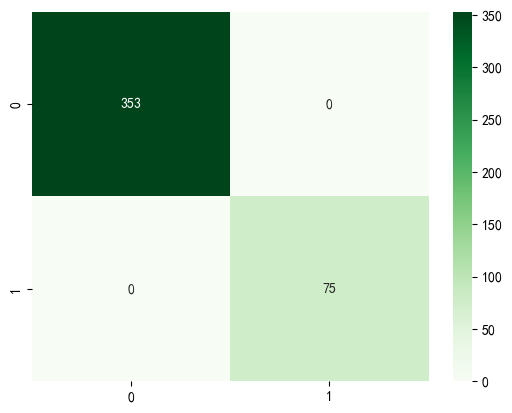

In [15]:
###pca-ros-LSTM
#LSTM长短期记忆网络
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
from mealpy.swarm_based.ZOA import OriginalZOA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

np.random.seed(42)#设置随机种子，保证每次输出结果都一样
# 确保 x_train_ros 和 y_train_ros 有相同的样本数量
print("x_train_ros shape:", x_train_ros.shape)
print("y_train_ros shape:", y_train_ros.shape)

# 确保 X_test_pca 和 y_test_spring 有相同的样本数量
print("X_test_pca shape:", X_test_pca.shape)
print("y_test_spring shape:", y_test_spring.shape)

# 重塑 LSTM 输入数据的形状
train_X1 = x_train_ros.reshape((x_train_ros.shape[0], 1, x_train_ros.shape[1]))
test_X1 = X_test_pca.reshape((X_test_pca.shape[0],1, X_test_pca.shape[1]))
num_classes = 2
# 确保 one-hot 编码后的数据与原始数据的样本数量一致
y_train_cat = to_categorical(y_train_ros, num_classes=num_classes)
print("y_train_cat shape:", y_train_cat.shape)
y_test_spring_encoded = to_categorical(y_test_spring, num_classes=num_classes)
print("y_test_spring_encoded shape:", y_test_spring_encoded.shape)

# 使用 to_categorical 进行one-hot编码
y_train_ros_encoded = to_categorical(y_train_ros, num_classes)
y_test_spring_encoded = to_categorical(y_test_spring, num_classes)
print(y_train_ros)            # 输出原始标签
print(y_train_ros_encoded)    # 输出one-hot编码后的标签

# 将标签转换为独热编码
y_train_cat = to_categorical(y_train_ros, num_classes=2)

# 确保 create_model 函数在当前作用域
def LSTM_model(units, learning_rate, train_X1):
    # 使用Keras建构LSTM模型
    model = Sequential()
    model.add(LSTM(units=int(units), input_shape=(train_X1.shape[1], train_X1.shape[2])))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

def cross_val_score_LSTM(nest, train_X1):
    units, epochs, learning_rate = nest
    model = LSTM_model(units, learning_rate, train_X1)
    history = model.fit(train_X1, y_train_cat, epochs=int(epochs), batch_size=64, validation_split=0.2)
    y_pred_s51_classes = model.predict(test_X1)
    y_pred_s51_classes = np.argmax(y_pred_s51_classes, axis=1)
    y_test_spring_classes = np.argmax(y_test_spring_encoded, axis=1)
    accuracy = accuracy_score(y_test_spring_classes, y_pred_s51_classes)
    return accuracy

def fitness_function(nest):
    units,epochs,learning_rate = nest
    return cross_val_score_LSTM(nest,train_X1)

# 定义适应度函数的参数范围
def get_nest():
    problem_dict1 = {
        "fit_func": fitness_function,
        "lb": [30, 10, 1e-7],
        "ub": [50, 20, 1e-3],
        "minmax": "max",
    }
    epoch = 2
    pop_size = 16
    model = OriginalZOA(epoch, pop_size)
    best_position, best_fitness = model.solve(problem_dict1)
    print(f"Solution: {best_position}, Fitness: {best_fitness}")
    # 修正返回值，返回一个包含best_fitness的元组，以及best_position
    return best_fitness, (best_position[0], best_position[1], best_position[2])

# 获取最优参数
best_fitness, nest = get_nest()  # 注意这里的解包方式也改变了
units, epochs, learning_rate = nest
print(nest)
units= nest[0]
epochs= nest[1]
learning_rate =nest[2]

model=LSTM_model(units, learning_rate, train_X1)
history = model.fit(train_X1, y_train_cat,epochs=int(epochs), batch_size=64,validation_split=0.2)

# 评估模型性能，确保使用二分类的评估指标
loss, accuracy = model.evaluate(test_X1, y_test_spring_encoded)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

# 使用模型进行预测
y_pred_s51_classes = model.predict(test_X1)
y_pred_s51_classes = np.argmax(y_pred_s51_classes, axis=1)

# 将 y_test_spring_encoded 转换回二进制格式
y_test_spring_classes = np.argmax(y_test_spring_encoded, axis=1)
# 计算评估指标
accuracy = accuracy_score(y_test_spring_classes, y_pred_s51_classes)
precision = precision_score(y_test_spring_classes, y_pred_s51_classes, average='macro')
recall = recall_score(y_test_spring_classes, y_pred_s51_classes, average='macro')
f1 = f1_score(y_test_spring_classes, y_pred_s51_classes, average='macro')

# 打印评估指标
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision (macro): {precision:.2f}')
print(f'Recall (macro): {recall:.2f}')
print(f'F1 Score (macro): {f1:.2f}')

# 如果需要绘制混淆矩阵
conf_matrix = confusion_matrix(y_test_spring_classes, y_pred_s51_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.show()

x_train_smote shape: (2794, 2)
y_train_smote shape: (2794,)
X_test_pca shape: (428, 2)
y_test_spring shape: (428,)
y_train_cat shape: (2794, 2)
y_test_spring_encoded shape: (428, 2)
[0 0 0 ... 1 1 1]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_925"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 37)                  │           5,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2775 (Dense)                   │ (None, 64)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2776 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2777 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,498 (41.01 KB)

 Trainable params: 10,498 (41.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.7828 - loss: 0.6602 - val_accuracy: 1.0000 - val_loss: 0.6024
Epoch 2/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.4006 - val_accuracy: 1.0000 - val_loss: 0.1944
Epoch 3/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0737 - val_accuracy: 1.0000 - val_loss: 0.0176
Epoch 4/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0096 - val_accuracy: 1.0000 - val_loss: 0.0050
Epoch 5/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 6/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 7/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 9.3742e-04
Epoch 8/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 9.0846e-04 - val_accuracy: 1.0000 -

2024/06/01 11:17:22 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: Solving single objective optimization problem.
C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_926"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 41)                  │           7,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2778 (Dense)                   │ (None, 64)                  │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2779 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2780 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,050 (47.07 KB)

 Trainable params: 12,050 (47.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9928 - loss: 0.6539 - val_accuracy: 1.0000 - val_loss: 0.4725
Epoch 2/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3820 - val_accuracy: 1.0000 - val_loss: 0.0894
Epoch 3/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0596 - val_accuracy: 1.0000 - val_loss: 0.0117
Epoch 4/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0082 - val_accuracy: 1.0000 - val_loss: 0.0043
Epoch 5/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 6/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 7/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 8/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 8.4659e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_927"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2781 (Dense)                   │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2782 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2783 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/18
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9109 - loss: 0.6307 - val_accuracy: 1.0000 - val_loss: 0.4890
Epoch 2/18
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.2799 - val_accuracy: 1.0000 - val_loss: 0.0970
Epoch 3/18
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0391 - val_accuracy: 1.0000 - val_loss: 0.0136
Epoch 4/18
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0079 - val_accuracy: 1.0000 - val_loss: 0.0052
Epoch 5/18
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 6/18
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 7/18
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 8/18
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.7485e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_928"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 44)                  │           8,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2784 (Dense)                   │ (None, 64)                  │           2,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2785 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2786 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,298 (51.95 KB)

 Trainable params: 13,298 (51.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9218 - loss: 0.6470 - val_accuracy: 1.0000 - val_loss: 0.5471
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3230 - val_accuracy: 1.0000 - val_loss: 0.1332
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0419 - val_accuracy: 1.0000 - val_loss: 0.0126
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0060 - val_accuracy: 1.0000 - val_loss: 0.0036
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 8.7693e-04
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.7282e-04 - val_accuracy: 1.0000 - val_loss: 4.8103e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 5.0058e-04 - val_accuracy: 1

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_929"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 46)                  │           9,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2787 (Dense)                   │ (None, 64)                  │           3,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2788 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2789 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,170 (55.35 KB)

 Trainable params: 14,170 (55.35 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9384 - loss: 0.6455 - val_accuracy: 1.0000 - val_loss: 0.5279
Epoch 2/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.3389 - val_accuracy: 1.0000 - val_loss: 0.1038
Epoch 3/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0439 - val_accuracy: 1.0000 - val_loss: 0.0093
Epoch 4/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0064 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 5/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 6/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 7/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.5226e-04 - val_accuracy: 1.0000 - val_loss: 7.4736e-04
Epoch 8/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 6.5445e-04 - val_accuracy: 1.000

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_930"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, 33)                  │           4,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2790 (Dense)                   │ (None, 64)                  │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2791 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2792 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,074 (35.45 KB)

 Trainable params: 9,074 (35.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8812 - loss: 0.6488 - val_accuracy: 1.0000 - val_loss: 0.5264
Epoch 2/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3488 - val_accuracy: 1.0000 - val_loss: 0.1083
Epoch 3/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0507 - val_accuracy: 1.0000 - val_loss: 0.0120
Epoch 4/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0085 - val_accuracy: 1.0000 - val_loss: 0.0044
Epoch 5/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 6/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 7/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 8.9706e-04
Epoch 8/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.2864e-04 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_931"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 38)                  │           6,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2793 (Dense)                   │ (None, 64)                  │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2794 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2795 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,874 (42.48 KB)

 Trainable params: 10,874 (42.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8647 - loss: 0.6526 - val_accuracy: 1.0000 - val_loss: 0.4619
Epoch 2/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3459 - val_accuracy: 1.0000 - val_loss: 0.0691
Epoch 3/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0461 - val_accuracy: 1.0000 - val_loss: 0.0089
Epoch 4/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0076 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 5/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 6/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 7/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 7.4209e-04
Epoch 8/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.5358e-04 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_932"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                        │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2796 (Dense)                   │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2797 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2798 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9003 - loss: 0.6533 - val_accuracy: 1.0000 - val_loss: 0.5414
Epoch 2/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3800 - val_accuracy: 1.0000 - val_loss: 0.1735
Epoch 3/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0719 - val_accuracy: 1.0000 - val_loss: 0.0234
Epoch 4/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0112 - val_accuracy: 1.0000 - val_loss: 0.0068
Epoch 5/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 6/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 7/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 8/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.5175e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_933"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 39)                  │           6,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2799 (Dense)                   │ (None, 64)                  │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2800 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2801 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,258 (43.98 KB)

 Trainable params: 11,258 (43.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/17
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8491 - loss: 0.6573 - val_accuracy: 1.0000 - val_loss: 0.4078
Epoch 2/17
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3749 - val_accuracy: 1.0000 - val_loss: 0.0589
Epoch 3/17
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0594 - val_accuracy: 1.0000 - val_loss: 0.0086
Epoch 4/17
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0082 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 5/17
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 6/17
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 7/17
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 6.7026e-04
Epoch 8/17
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.9877e-04 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_934"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                        │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2802 (Dense)                   │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2803 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2804 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9124 - loss: 0.6556 - val_accuracy: 1.0000 - val_loss: 0.4735
Epoch 2/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3695 - val_accuracy: 1.0000 - val_loss: 0.0704
Epoch 3/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0535 - val_accuracy: 1.0000 - val_loss: 0.0086
Epoch 4/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0083 - val_accuracy: 1.0000 - val_loss: 0.0034
Epoch 5/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 6/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 7/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 8.5085e-04
Epoch 8/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.7715e-04 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_935"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, 42)                  │           7,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2805 (Dense)                   │ (None, 64)                  │           2,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2806 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2807 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,458 (48.66 KB)

 Trainable params: 12,458 (48.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9176 - loss: 0.6548 - val_accuracy: 1.0000 - val_loss: 0.5075
Epoch 2/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3701 - val_accuracy: 1.0000 - val_loss: 0.0967
Epoch 3/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0526 - val_accuracy: 1.0000 - val_loss: 0.0092
Epoch 4/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0069 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 5/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 6/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 9.5352e-04
Epoch 7/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 6.5624e-04
Epoch 8/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.2214e-04 - val_accuracy: 1.000

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_936"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_11 (LSTM)                       │ (None, 48)                  │           9,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2808 (Dense)                   │ (None, 64)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2809 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2810 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,074 (58.88 KB)

 Trainable params: 15,074 (58.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8168 - loss: 0.6538 - val_accuracy: 1.0000 - val_loss: 0.5839
Epoch 2/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3657 - val_accuracy: 1.0000 - val_loss: 0.1862
Epoch 3/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0624 - val_accuracy: 1.0000 - val_loss: 0.0175
Epoch 4/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0081 - val_accuracy: 1.0000 - val_loss: 0.0053
Epoch 5/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 6/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 7/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 9.9831e-04
Epoch 8/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.2422e-04 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_937"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 36)                  │           5,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2811 (Dense)                   │ (None, 64)                  │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2812 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2813 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,130 (39.57 KB)

 Trainable params: 10,130 (39.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8558 - loss: 0.6625 - val_accuracy: 1.0000 - val_loss: 0.4876
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4109 - val_accuracy: 1.0000 - val_loss: 0.0768
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0705 - val_accuracy: 1.0000 - val_loss: 0.0097
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0087 - val_accuracy: 1.0000 - val_loss: 0.0036
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 8.2812e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.5335e-04 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_938"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_13 (LSTM)                       │ (None, 38)                  │           6,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2814 (Dense)                   │ (None, 64)                  │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2815 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2816 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,874 (42.48 KB)

 Trainable params: 10,874 (42.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9114 - loss: 0.6461 - val_accuracy: 1.0000 - val_loss: 0.4084
Epoch 2/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3405 - val_accuracy: 1.0000 - val_loss: 0.0529
Epoch 3/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0440 - val_accuracy: 1.0000 - val_loss: 0.0082
Epoch 4/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0069 - val_accuracy: 1.0000 - val_loss: 0.0035
Epoch 5/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 6/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 7/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 9.5358e-04
Epoch 8/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.0163e-04 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_939"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2817 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2818 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2819 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7158 - loss: 0.6640 - val_accuracy: 0.9911 - val_loss: 0.6413
Epoch 2/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9982 - loss: 0.4491 - val_accuracy: 1.0000 - val_loss: 0.3410
Epoch 3/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1336 - val_accuracy: 1.0000 - val_loss: 0.0526
Epoch 4/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0199 - val_accuracy: 1.0000 - val_loss: 0.0117
Epoch 5/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0059 - val_accuracy: 1.0000 - val_loss: 0.0048
Epoch 6/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 7/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 8/19
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.6277e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_940"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                       │ (None, 43)                  │           7,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2820 (Dense)                   │ (None, 64)                  │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2821 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2822 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,874 (50.29 KB)

 Trainable params: 12,874 (50.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9736 - loss: 0.6409 - val_accuracy: 1.0000 - val_loss: 0.4379
Epoch 2/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3082 - val_accuracy: 1.0000 - val_loss: 0.0545
Epoch 3/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0354 - val_accuracy: 1.0000 - val_loss: 0.0078
Epoch 4/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0066 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 5/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 6/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 7/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 6.5500e-04
Epoch 8/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 6.7482e-04 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_941"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                       │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2823 (Dense)                   │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2824 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2825 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9606 - loss: 0.6468 - val_accuracy: 1.0000 - val_loss: 0.4929
Epoch 2/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3517 - val_accuracy: 1.0000 - val_loss: 0.1004
Epoch 3/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0495 - val_accuracy: 1.0000 - val_loss: 0.0112
Epoch 4/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0074 - val_accuracy: 1.0000 - val_loss: 0.0037
Epoch 5/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 6/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 7/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 7.9325e-04
Epoch 8/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.7166e-04 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_942"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_17 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2826 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2827 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2828 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9247 - loss: 0.6549 - val_accuracy: 1.0000 - val_loss: 0.5716
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3869 - val_accuracy: 1.0000 - val_loss: 0.1922
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0679 - val_accuracy: 1.0000 - val_loss: 0.0205
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0090 - val_accuracy: 1.0000 - val_loss: 0.0056
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.6374e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_943"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2829 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2830 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2831 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9583 - loss: 0.6511 - val_accuracy: 1.0000 - val_loss: 0.5617
Epoch 2/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3566 - val_accuracy: 1.0000 - val_loss: 0.1953
Epoch 3/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0649 - val_accuracy: 1.0000 - val_loss: 0.0256
Epoch 4/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0096 - val_accuracy: 1.0000 - val_loss: 0.0078
Epoch 5/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 1.0000 - val_loss: 0.0041
Epoch 6/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 7/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 8/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.3886e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_944"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_19 (LSTM)                       │ (None, 43)                  │           7,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2832 (Dense)                   │ (None, 64)                  │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2833 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2834 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,874 (50.29 KB)

 Trainable params: 12,874 (50.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8740 - loss: 0.6623 - val_accuracy: 1.0000 - val_loss: 0.5782
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4222 - val_accuracy: 1.0000 - val_loss: 0.1682
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0746 - val_accuracy: 1.0000 - val_loss: 0.0132
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0083 - val_accuracy: 1.0000 - val_loss: 0.0038
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 8.3977e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 7.2724e-04 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_945"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                       │ (None, 45)                  │           8,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2835 (Dense)                   │ (None, 64)                  │           2,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2836 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2837 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,730 (53.63 KB)

 Trainable params: 13,730 (53.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9556 - loss: 0.6466 - val_accuracy: 1.0000 - val_loss: 0.3584
Epoch 2/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3493 - val_accuracy: 1.0000 - val_loss: 0.0300
Epoch 3/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0517 - val_accuracy: 1.0000 - val_loss: 0.0050
Epoch 4/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0063 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 5/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 6/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 8.4362e-04
Epoch 7/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.9868e-04 - val_accuracy: 1.0000 - val_loss: 5.9485e-04
Epoch 8/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 6.2199e-04 - val_accuracy: 1

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_946"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_21 (LSTM)                       │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2838 (Dense)                   │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2839 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2840 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9255 - loss: 0.6532 - val_accuracy: 1.0000 - val_loss: 0.5493
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.3646 - val_accuracy: 1.0000 - val_loss: 0.1576
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0601 - val_accuracy: 1.0000 - val_loss: 0.0172
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0089 - val_accuracy: 1.0000 - val_loss: 0.0055
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 9.9972e-04 - val_accuracy: 1.0000 - val_l

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_947"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_22 (LSTM)                       │ (None, 38)                  │           6,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2841 (Dense)                   │ (None, 64)                  │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2842 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2843 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,874 (42.48 KB)

 Trainable params: 10,874 (42.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8873 - loss: 0.6523 - val_accuracy: 1.0000 - val_loss: 0.5403
Epoch 2/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3568 - val_accuracy: 1.0000 - val_loss: 0.1150
Epoch 3/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0499 - val_accuracy: 1.0000 - val_loss: 0.0123
Epoch 4/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0080 - val_accuracy: 1.0000 - val_loss: 0.0045
Epoch 5/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 6/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 7/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 8/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.4867e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_948"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_23 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2844 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2845 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2846 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6548 - loss: 0.6428 - val_accuracy: 0.9732 - val_loss: 0.6583
Epoch 2/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.3576 - val_accuracy: 1.0000 - val_loss: 0.3491
Epoch 3/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.1060 - val_accuracy: 1.0000 - val_loss: 0.0466
Epoch 4/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0148 - val_accuracy: 1.0000 - val_loss: 0.0073
Epoch 5/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 6/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 7/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 8.7279e-04
Epoch 8/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 6.6403e-04 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_949"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_24 (LSTM)                       │ (None, 41)                  │           7,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2847 (Dense)                   │ (None, 64)                  │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2848 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2849 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,050 (47.07 KB)

 Trainable params: 12,050 (47.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9155 - loss: 0.6504 - val_accuracy: 1.0000 - val_loss: 0.4972
Epoch 2/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3605 - val_accuracy: 1.0000 - val_loss: 0.1119
Epoch 3/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0525 - val_accuracy: 1.0000 - val_loss: 0.0134
Epoch 4/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0080 - val_accuracy: 1.0000 - val_loss: 0.0048
Epoch 5/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 6/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 7/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 8/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.6419e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_950"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_25 (LSTM)                       │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2850 (Dense)                   │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2851 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2852 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/14
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8633 - loss: 0.6473 - val_accuracy: 1.0000 - val_loss: 0.5012
Epoch 2/14
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3251 - val_accuracy: 1.0000 - val_loss: 0.0980
Epoch 3/14
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0395 - val_accuracy: 1.0000 - val_loss: 0.0112
Epoch 4/14
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0057 - val_accuracy: 1.0000 - val_loss: 0.0036
Epoch 5/14
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 6/14
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 7/14
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 7.1888e-04 - val_accuracy: 1.0000 - val_loss: 6.7464e-04
Epoch 8/14
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4.7350e-04 - val_accuracy: 1.000

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_951"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_26 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2853 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2854 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2855 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8565 - loss: 0.6579 - val_accuracy: 1.0000 - val_loss: 0.4480
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4077 - val_accuracy: 1.0000 - val_loss: 0.0585
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0844 - val_accuracy: 1.0000 - val_loss: 0.0084
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0110 - val_accuracy: 1.0000 - val_loss: 0.0035
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 9.8122e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.3550e-04 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_952"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_27 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2856 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2857 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2858 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8999 - loss: 0.6663 - val_accuracy: 1.0000 - val_loss: 0.5745
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4628 - val_accuracy: 1.0000 - val_loss: 0.1949
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1004 - val_accuracy: 1.0000 - val_loss: 0.0213
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0117 - val_accuracy: 1.0000 - val_loss: 0.0061
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_953"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_28 (LSTM)                       │ (None, 39)                  │           6,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2859 (Dense)                   │ (None, 64)                  │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2860 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2861 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,258 (43.98 KB)

 Trainable params: 11,258 (43.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9060 - loss: 0.6567 - val_accuracy: 1.0000 - val_loss: 0.5542
Epoch 2/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3735 - val_accuracy: 1.0000 - val_loss: 0.1563
Epoch 3/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0581 - val_accuracy: 1.0000 - val_loss: 0.0164
Epoch 4/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0082 - val_accuracy: 1.0000 - val_loss: 0.0047
Epoch 5/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 6/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 7/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 8.4945e-04 - val_accuracy: 1.0000 - val_loss: 6.7278e-04
Epoch 8/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 5.4571e-04 - val_accuracy: 1.000

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_954"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_29 (LSTM)                       │ (None, 38)                  │           6,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2862 (Dense)                   │ (None, 64)                  │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2863 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2864 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,874 (42.48 KB)

 Trainable params: 10,874 (42.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9136 - loss: 0.6544 - val_accuracy: 1.0000 - val_loss: 0.4364
Epoch 2/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4082 - val_accuracy: 1.0000 - val_loss: 0.0525
Epoch 3/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0983 - val_accuracy: 1.0000 - val_loss: 0.0080
Epoch 4/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0146 - val_accuracy: 1.0000 - val_loss: 0.0034
Epoch 5/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 6/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 7/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 8.8343e-04
Epoch 8/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_955"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_30 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2865 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2866 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2867 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9140 - loss: 0.6491 - val_accuracy: 1.0000 - val_loss: 0.4407
Epoch 2/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4025 - val_accuracy: 1.0000 - val_loss: 0.0734
Epoch 3/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0930 - val_accuracy: 1.0000 - val_loss: 0.0104
Epoch 4/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0139 - val_accuracy: 1.0000 - val_loss: 0.0038
Epoch 5/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0049 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 6/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 7/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 9.5706e-04
Epoch 8/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_956"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_31 (LSTM)                       │ (None, 33)                  │           4,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2868 (Dense)                   │ (None, 64)                  │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2869 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2870 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,074 (35.45 KB)

 Trainable params: 9,074 (35.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 1.0000 - loss: 0.6409 - val_accuracy: 1.0000 - val_loss: 0.4912
Epoch 2/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3288 - val_accuracy: 1.0000 - val_loss: 0.0852
Epoch 3/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0441 - val_accuracy: 1.0000 - val_loss: 0.0114
Epoch 4/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0078 - val_accuracy: 1.0000 - val_loss: 0.0046
Epoch 5/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 6/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 7/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 8/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.3966e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_957"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_32 (LSTM)                       │ (None, 41)                  │           7,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2871 (Dense)                   │ (None, 64)                  │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2872 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2873 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,050 (47.07 KB)

 Trainable params: 12,050 (47.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9801 - loss: 0.6528 - val_accuracy: 1.0000 - val_loss: 0.4388
Epoch 2/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3678 - val_accuracy: 1.0000 - val_loss: 0.0536
Epoch 3/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0521 - val_accuracy: 1.0000 - val_loss: 0.0075
Epoch 4/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0075 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 5/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 6/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 7/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 8.0840e-04
Epoch 8/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.5726e-04 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_958"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_33 (LSTM)                       │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2874 (Dense)                   │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2875 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2876 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7011 - loss: 0.6751 - val_accuracy: 0.9928 - val_loss: 0.6554
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4952 - val_accuracy: 1.0000 - val_loss: 0.3517
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.1444 - val_accuracy: 1.0000 - val_loss: 0.0539
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0201 - val_accuracy: 1.0000 - val_loss: 0.0114
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0055 - val_accuracy: 1.0000 - val_loss: 0.0051
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_959"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_34 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2877 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2878 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2879 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7769 - loss: 0.6660 - val_accuracy: 1.0000 - val_loss: 0.5902
Epoch 2/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4369 - val_accuracy: 1.0000 - val_loss: 0.1608
Epoch 3/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0872 - val_accuracy: 1.0000 - val_loss: 0.0171
Epoch 4/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0122 - val_accuracy: 1.0000 - val_loss: 0.0055
Epoch 5/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 6/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 7/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 8/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_960"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_35 (LSTM)                       │ (None, 45)                  │           8,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2880 (Dense)                   │ (None, 64)                  │           2,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2881 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2882 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,730 (53.63 KB)

 Trainable params: 13,730 (53.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8513 - loss: 0.6528 - val_accuracy: 1.0000 - val_loss: 0.5619
Epoch 2/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3556 - val_accuracy: 1.0000 - val_loss: 0.1821
Epoch 3/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0609 - val_accuracy: 1.0000 - val_loss: 0.0217
Epoch 4/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0089 - val_accuracy: 1.0000 - val_loss: 0.0057
Epoch 5/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 6/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 7/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.5935e-04 - val_accuracy: 1.0000 - val_loss: 8.4563e-04
Epoch 8/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 6.4217e-04 - val_accuracy: 1.000

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_961"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_36 (LSTM)                       │ (None, 47)                  │           9,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2883 (Dense)                   │ (None, 64)                  │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2884 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2885 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,618 (57.10 KB)

 Trainable params: 14,618 (57.10 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9416 - loss: 0.6502 - val_accuracy: 1.0000 - val_loss: 0.5279
Epoch 2/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3343 - val_accuracy: 1.0000 - val_loss: 0.0982
Epoch 3/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0374 - val_accuracy: 1.0000 - val_loss: 0.0101
Epoch 4/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 1.0000 - val_loss: 0.0037
Epoch 5/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 6/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 7/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.1541e-04 - val_accuracy: 1.0000 - val_loss: 8.2544e-04
Epoch 8/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 5.5657e-04 - val_accuracy: 1.000

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_962"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_37 (LSTM)                       │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2886 (Dense)                   │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2887 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2888 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 167s 18ms/step - accuracy: 0.8636 - loss: 0.6586 - val_accuracy: 1.0000 - val_loss: 0.5452
Epoch 2/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4057 - val_accuracy: 1.0000 - val_loss: 0.1723
Epoch 3/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0787 - val_accuracy: 1.0000 - val_loss: 0.0226
Epoch 4/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0106 - val_accuracy: 1.0000 - val_loss: 0.0064
Epoch 5/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 6/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 7/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 8/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.5846e-04 - val_accuracy: 1.0000 - va

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_963"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_38 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2889 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2890 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2891 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9465 - loss: 0.6411 - val_accuracy: 1.0000 - val_loss: 0.4118
Epoch 2/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3264 - val_accuracy: 1.0000 - val_loss: 0.0554
Epoch 3/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0526 - val_accuracy: 1.0000 - val_loss: 0.0088
Epoch 4/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0099 - val_accuracy: 1.0000 - val_loss: 0.0038
Epoch 5/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 6/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 7/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 8/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 9.9569e-04 - val_accuracy: 1.0000 - val

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_964"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_39 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2892 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2893 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2894 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.8393 - loss: 0.6511 - val_accuracy: 1.0000 - val_loss: 0.3350
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3901 - val_accuracy: 1.0000 - val_loss: 0.0328
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1003 - val_accuracy: 1.0000 - val_loss: 0.0065
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0148 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 1.0000 - val_loss: 7.2894e-04
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 4.4119e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_965"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_40 (LSTM)                       │ (None, 45)                  │           8,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2895 (Dense)                   │ (None, 64)                  │           2,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2896 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2897 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,730 (53.63 KB)

 Trainable params: 13,730 (53.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9264 - loss: 0.6455 - val_accuracy: 1.0000 - val_loss: 0.3729
Epoch 2/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3552 - val_accuracy: 1.0000 - val_loss: 0.0354
Epoch 3/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0582 - val_accuracy: 1.0000 - val_loss: 0.0058
Epoch 4/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0079 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 5/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 6/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 8.8140e-04
Epoch 7/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 5.5732e-04
Epoch 8/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.4881e-04 - val_accuracy: 1.000

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_966"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_41 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2898 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2899 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2900 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9052 - loss: 0.6559 - val_accuracy: 1.0000 - val_loss: 0.4795
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3933 - val_accuracy: 1.0000 - val_loss: 0.0820
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0766 - val_accuracy: 1.0000 - val_loss: 0.0105
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0122 - val_accuracy: 1.0000 - val_loss: 0.0040
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_967"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_42 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2901 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2902 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2903 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7694 - loss: 0.6371 - val_accuracy: 0.9928 - val_loss: 0.6193
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3362 - val_accuracy: 1.0000 - val_loss: 0.3011
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0939 - val_accuracy: 1.0000 - val_loss: 0.0482
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0163 - val_accuracy: 1.0000 - val_loss: 0.0108
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 1.0000 - val_loss: 0.0050
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.7748e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_968"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_43 (LSTM)                       │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2904 (Dense)                   │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2905 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2906 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.9231 - loss: 0.6462 - val_accuracy: 1.0000 - val_loss: 0.4774
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3293 - val_accuracy: 1.0000 - val_loss: 0.0839
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0434 - val_accuracy: 1.0000 - val_loss: 0.0113
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0077 - val_accuracy: 1.0000 - val_loss: 0.0045
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 8.7814e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.7154e-04 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_969"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_44 (LSTM)                       │ (None, 35)                  │           5,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2907 (Dense)                   │ (None, 64)                  │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2908 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2909 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,770 (38.16 KB)

 Trainable params: 9,770 (38.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9188 - loss: 0.6505 - val_accuracy: 1.0000 - val_loss: 0.4960
Epoch 2/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3857 - val_accuracy: 1.0000 - val_loss: 0.1160
Epoch 3/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0748 - val_accuracy: 1.0000 - val_loss: 0.0150
Epoch 4/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0119 - val_accuracy: 1.0000 - val_loss: 0.0053
Epoch 5/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 6/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 7/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 8/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_970"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_45 (LSTM)                       │ (None, 41)                  │           7,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2910 (Dense)                   │ (None, 64)                  │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2911 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2912 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,050 (47.07 KB)

 Trainable params: 12,050 (47.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9124 - loss: 0.6451 - val_accuracy: 1.0000 - val_loss: 0.4805
Epoch 2/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3112 - val_accuracy: 1.0000 - val_loss: 0.0666
Epoch 3/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0338 - val_accuracy: 1.0000 - val_loss: 0.0084
Epoch 4/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0061 - val_accuracy: 1.0000 - val_loss: 0.0036
Epoch 5/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 6/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 7/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 9.9389e-04
Epoch 8/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.7127e-04 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_971"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_46 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2913 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2914 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2915 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7797 - loss: 0.6524 - val_accuracy: 1.0000 - val_loss: 0.5663
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3359 - val_accuracy: 1.0000 - val_loss: 0.1324
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0453 - val_accuracy: 1.0000 - val_loss: 0.0164
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0077 - val_accuracy: 1.0000 - val_loss: 0.0058
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.8262e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_972"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_47 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2916 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2917 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2918 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.8123 - loss: 0.6502 - val_accuracy: 1.0000 - val_loss: 0.3330
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3981 - val_accuracy: 1.0000 - val_loss: 0.0338
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1136 - val_accuracy: 1.0000 - val_loss: 0.0072
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0156 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 9.0500e-04
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 6.2382e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.8058e-04 - val_accuracy: 1.000

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_973"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_48 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2919 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2920 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2921 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 182ms/step - accuracy: 0.7764 - loss: 0.6687 - val_accuracy: 1.0000 - val_loss: 0.6107
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4472 - val_accuracy: 1.0000 - val_loss: 0.2034
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0929 - val_accuracy: 1.0000 - val_loss: 0.0188
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0114 - val_accuracy: 1.0000 - val_loss: 0.0059
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0043 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_los

2024/06/01 11:24:02 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 1, Current best: 1.0, Global best: 1.0, Runtime: 325.59388 seconds
C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_974"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_49 (LSTM)                       │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2922 (Dense)                   │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2923 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2924 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9438 - loss: 0.6403 - val_accuracy: 1.0000 - val_loss: 0.4403
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3410 - val_accuracy: 1.0000 - val_loss: 0.0926
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0506 - val_accuracy: 1.0000 - val_loss: 0.0145
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0085 - val_accuracy: 1.0000 - val_loss: 0.0055
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.4606e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_975"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_50 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2925 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2926 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2927 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9928 - loss: 0.6363 - val_accuracy: 1.0000 - val_loss: 0.4901
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.3083 - val_accuracy: 1.0000 - val_loss: 0.1126
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0435 - val_accuracy: 1.0000 - val_loss: 0.0165
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0080 - val_accuracy: 1.0000 - val_loss: 0.0058
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 8.6549e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_976"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_51 (LSTM)                       │ (None, 34)                  │           5,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2928 (Dense)                   │ (None, 64)                  │           2,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2929 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2930 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,418 (36.79 KB)

 Trainable params: 9,418 (36.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.8334 - loss: 0.6639 - val_accuracy: 1.0000 - val_loss: 0.4962
Epoch 2/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4226 - val_accuracy: 1.0000 - val_loss: 0.0765
Epoch 3/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0778 - val_accuracy: 1.0000 - val_loss: 0.0084
Epoch 4/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0096 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 5/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 6/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 7/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 8.3285e-04
Epoch 8/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.5228e-04 - val_accuracy: 1.0000 -

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_977"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_52 (LSTM)                       │ (None, 37)                  │           5,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2931 (Dense)                   │ (None, 64)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2932 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2933 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,498 (41.01 KB)

 Trainable params: 10,498 (41.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9746 - loss: 0.6367 - val_accuracy: 1.0000 - val_loss: 0.3310
Epoch 2/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.2993 - val_accuracy: 1.0000 - val_loss: 0.0268
Epoch 3/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0387 - val_accuracy: 1.0000 - val_loss: 0.0049
Epoch 4/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0063 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 5/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 6/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 7.3306e-04
Epoch 7/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 5.0163e-04
Epoch 8/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.3972e-04 - val_accuracy: 1.000

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_978"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_53 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2934 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2935 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2936 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9891 - loss: 0.6385 - val_accuracy: 1.0000 - val_loss: 0.5145
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3086 - val_accuracy: 1.0000 - val_loss: 0.1154
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0429 - val_accuracy: 1.0000 - val_loss: 0.0141
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0075 - val_accuracy: 1.0000 - val_loss: 0.0051
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.5964e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_979"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_54 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2937 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2938 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2939 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 27s 57ms/step - accuracy: 0.8165 - loss: 0.6629 - val_accuracy: 1.0000 - val_loss: 0.6416
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.4103 - val_accuracy: 1.0000 - val_loss: 0.3119
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0992 - val_accuracy: 1.0000 - val_loss: 0.0461
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0150 - val_accuracy: 1.0000 - val_loss: 0.0103
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 1.0000 - val_loss: 0.0046
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.6241e-04 - val_accuracy: 1.0000 - val

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_980"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_55 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2940 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2941 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2942 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9325 - loss: 0.6500 - val_accuracy: 1.0000 - val_loss: 0.4844
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3542 - val_accuracy: 1.0000 - val_loss: 0.0903
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0492 - val_accuracy: 1.0000 - val_loss: 0.0123
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0079 - val_accuracy: 1.0000 - val_loss: 0.0048
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 8.3805e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_981"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_56 (LSTM)                       │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2943 (Dense)                   │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2944 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2945 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/14
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8435 - loss: 0.6563 - val_accuracy: 1.0000 - val_loss: 0.5369
Epoch 2/14
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3614 - val_accuracy: 1.0000 - val_loss: 0.0776
Epoch 3/14
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0466 - val_accuracy: 1.0000 - val_loss: 0.0077
Epoch 4/14
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0071 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 5/14
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 6/14
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 7/14
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 8.9748e-04 - val_accuracy: 1.0000 - val_loss: 7.6616e-04
Epoch 8/14
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 6.0290e-04 - val_accuracy: 1.0

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_982"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_57 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2946 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2947 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2948 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.8863 - loss: 0.6578 - val_accuracy: 1.0000 - val_loss: 0.5712
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4029 - val_accuracy: 1.0000 - val_loss: 0.1512
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0705 - val_accuracy: 1.0000 - val_loss: 0.0129
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0089 - val_accuracy: 1.0000 - val_loss: 0.0034
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 8.2330e-04
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 4.1928e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.1261e-04 - val_accuracy: 1.00

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_983"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_58 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2949 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2950 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2951 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8710 - loss: 0.6578 - val_accuracy: 1.0000 - val_loss: 0.5493
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3774 - val_accuracy: 1.0000 - val_loss: 0.1023
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0489 - val_accuracy: 1.0000 - val_loss: 0.0115
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0074 - val_accuracy: 1.0000 - val_loss: 0.0044
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 7.4461e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_984"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_59 (LSTM)                       │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2952 (Dense)                   │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2953 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2954 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7636 - loss: 0.6495 - val_accuracy: 1.0000 - val_loss: 0.5970
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3366 - val_accuracy: 1.0000 - val_loss: 0.1741
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0548 - val_accuracy: 1.0000 - val_loss: 0.0191
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0089 - val_accuracy: 1.0000 - val_loss: 0.0058
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.1124e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_985"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_60 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2955 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2956 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2957 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9801 - loss: 0.6390 - val_accuracy: 1.0000 - val_loss: 0.3867
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3313 - val_accuracy: 1.0000 - val_loss: 0.0558
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0468 - val_accuracy: 1.0000 - val_loss: 0.0095
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0081 - val_accuracy: 1.0000 - val_loss: 0.0040
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.8822e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_986"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_61 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2958 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2959 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2960 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.7874 - loss: 0.6556 - val_accuracy: 1.0000 - val_loss: 0.5580
Epoch 2/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3439 - val_accuracy: 1.0000 - val_loss: 0.1544
Epoch 3/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0523 - val_accuracy: 1.0000 - val_loss: 0.0180
Epoch 4/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0086 - val_accuracy: 1.0000 - val_loss: 0.0062
Epoch 5/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 1.0000 - val_loss: 0.0034
Epoch 6/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 7/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 8/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.5130e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_987"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_62 (LSTM)                       │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2961 (Dense)                   │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2962 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2963 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9612 - loss: 0.6538 - val_accuracy: 1.0000 - val_loss: 0.5647
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 1.0000 - loss: 0.3738 - val_accuracy: 1.0000 - val_loss: 0.1626
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0613 - val_accuracy: 1.0000 - val_loss: 0.0187
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0088 - val_accuracy: 1.0000 - val_loss: 0.0059
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.8078e-04 - val_accuracy: 1.0000 - va

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_988"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_63 (LSTM)                       │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2964 (Dense)                   │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2965 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2966 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9213 - loss: 0.6434 - val_accuracy: 1.0000 - val_loss: 0.4537
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3254 - val_accuracy: 1.0000 - val_loss: 0.0715
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0430 - val_accuracy: 1.0000 - val_loss: 0.0095
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0077 - val_accuracy: 1.0000 - val_loss: 0.0036
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 9.8469e-04
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.5165e-04 - val_accuracy: 1.0000 - val_loss: 6.0682e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 6.0719e-04 - val_accuracy: 1

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_989"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_64 (LSTM)                       │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2967 (Dense)                   │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2968 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2969 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8677 - loss: 0.6506 - val_accuracy: 1.0000 - val_loss: 0.5157
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3661 - val_accuracy: 1.0000 - val_loss: 0.1171
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0521 - val_accuracy: 1.0000 - val_loss: 0.0155
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0081 - val_accuracy: 1.0000 - val_loss: 0.0055
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.1323e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_990"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_65 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2970 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2971 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2972 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9041 - loss: 0.6426 - val_accuracy: 1.0000 - val_loss: 0.5153
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.3299 - val_accuracy: 1.0000 - val_loss: 0.1199
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0518 - val_accuracy: 1.0000 - val_loss: 0.0131
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0088 - val_accuracy: 1.0000 - val_loss: 0.0045
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 9.4078e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_991"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_66 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2973 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2974 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2975 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9656 - loss: 0.6511 - val_accuracy: 1.0000 - val_loss: 0.4592
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3625 - val_accuracy: 1.0000 - val_loss: 0.0753
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0561 - val_accuracy: 1.0000 - val_loss: 0.0102
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0090 - val_accuracy: 1.0000 - val_loss: 0.0039
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 6.1516e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 7.9677e-04 - val_accuracy: 1.0000 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_992"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_67 (LSTM)                       │ (None, 34)                  │           5,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2976 (Dense)                   │ (None, 64)                  │           2,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2977 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2978 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,418 (36.79 KB)

 Trainable params: 9,418 (36.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9597 - loss: 0.6539 - val_accuracy: 1.0000 - val_loss: 0.5042
Epoch 2/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3649 - val_accuracy: 1.0000 - val_loss: 0.0999
Epoch 3/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0470 - val_accuracy: 1.0000 - val_loss: 0.0126
Epoch 4/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0069 - val_accuracy: 1.0000 - val_loss: 0.0047
Epoch 5/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 6/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 7/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 8/11
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 7.5985e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_993"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_68 (LSTM)                       │ (None, 37)                  │           5,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2979 (Dense)                   │ (None, 64)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2980 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2981 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,498 (41.01 KB)

 Trainable params: 10,498 (41.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7871 - loss: 0.6541 - val_accuracy: 0.9928 - val_loss: 0.6451
Epoch 2/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3796 - val_accuracy: 1.0000 - val_loss: 0.3041
Epoch 3/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0943 - val_accuracy: 1.0000 - val_loss: 0.0319
Epoch 4/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0111 - val_accuracy: 1.0000 - val_loss: 0.0065
Epoch 5/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 6/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 7/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.6699e-04 - val_accuracy: 1.0000 - val_loss: 4.8810e-04
Epoch 8/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 5.5218e-04 - val_accuracy: 1.000

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_994"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_69 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2982 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2983 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2984 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8124 - loss: 0.6473 - val_accuracy: 1.0000 - val_loss: 0.6005
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3580 - val_accuracy: 1.0000 - val_loss: 0.2123
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0770 - val_accuracy: 1.0000 - val_loss: 0.0292
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0117 - val_accuracy: 1.0000 - val_loss: 0.0082
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0043 - val_accuracy: 1.0000 - val_loss: 0.0039
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 9.8724e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_995"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_70 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2985 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2986 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2987 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.9783 - loss: 0.6460 - val_accuracy: 1.0000 - val_loss: 0.4441
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3536 - val_accuracy: 1.0000 - val_loss: 0.0669
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0547 - val_accuracy: 1.0000 - val_loss: 0.0099
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0086 - val_accuracy: 1.0000 - val_loss: 0.0040
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 8.9952e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_996"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_71 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2988 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2989 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2990 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.8580 - loss: 0.6504 - val_accuracy: 1.0000 - val_loss: 0.5384
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3431 - val_accuracy: 1.0000 - val_loss: 0.1179
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0499 - val_accuracy: 1.0000 - val_loss: 0.0136
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0081 - val_accuracy: 1.0000 - val_loss: 0.0048
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 8.9233e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_997"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_72 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2991 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2992 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2993 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9474 - loss: 0.6438 - val_accuracy: 1.0000 - val_loss: 0.4915
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3440 - val_accuracy: 1.0000 - val_loss: 0.1098
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0501 - val_accuracy: 1.0000 - val_loss: 0.0146
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0084 - val_accuracy: 1.0000 - val_loss: 0.0050
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 9.2425e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_998"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_73 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2994 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2995 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2996 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8681 - loss: 0.6607 - val_accuracy: 1.0000 - val_loss: 0.4644
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4144 - val_accuracy: 1.0000 - val_loss: 0.0796
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0745 - val_accuracy: 1.0000 - val_loss: 0.0115
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0098 - val_accuracy: 1.0000 - val_loss: 0.0044
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_999"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_74 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2997 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2998 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2999 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9036 - loss: 0.6559 - val_accuracy: 1.0000 - val_loss: 0.4306
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3999 - val_accuracy: 1.0000 - val_loss: 0.0662
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0892 - val_accuracy: 1.0000 - val_loss: 0.0102
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0140 - val_accuracy: 1.0000 - val_loss: 0.0040
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0051 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1000"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_75 (LSTM)                       │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3000 (Dense)                   │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3001 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3002 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8782 - loss: 0.6594 - val_accuracy: 1.0000 - val_loss: 0.5625
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4026 - val_accuracy: 1.0000 - val_loss: 0.1588
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0669 - val_accuracy: 1.0000 - val_loss: 0.0132
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0077 - val_accuracy: 1.0000 - val_loss: 0.0039
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.4136e-04 - val_accuracy: 1.0000 - val_loss: 8.3561e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 6.4956e-04 - val_accuracy: 1.000

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1001"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_76 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3003 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3004 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3005 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9619 - loss: 0.6459 - val_accuracy: 1.0000 - val_loss: 0.4085
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3296 - val_accuracy: 1.0000 - val_loss: 0.0570
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0435 - val_accuracy: 1.0000 - val_loss: 0.0093
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0078 - val_accuracy: 1.0000 - val_loss: 0.0039
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 9.3957e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1002"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_77 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3006 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3007 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3008 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9476 - loss: 0.6456 - val_accuracy: 1.0000 - val_loss: 0.3869
Epoch 2/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3544 - val_accuracy: 1.0000 - val_loss: 0.0487
Epoch 3/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0594 - val_accuracy: 1.0000 - val_loss: 0.0074
Epoch 4/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0090 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 5/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 6/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 9.8986e-04
Epoch 7/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 6.5479e-04
Epoch 8/12
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.4651e-04 - val_accuracy: 1.000

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1003"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_78 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3009 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3010 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3011 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - accuracy: 0.8993 - loss: 0.6588 - val_accuracy: 1.0000 - val_loss: 0.5788
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3891 - val_accuracy: 1.0000 - val_loss: 0.1641
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0634 - val_accuracy: 1.0000 - val_loss: 0.0180
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0089 - val_accuracy: 1.0000 - val_loss: 0.0058
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.2679e-04 - val_accuracy: 1.0000 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1004"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_79 (LSTM)                       │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3012 (Dense)                   │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3013 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3014 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9370 - loss: 0.6508 - val_accuracy: 1.0000 - val_loss: 0.4505
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.3590 - val_accuracy: 1.0000 - val_loss: 0.0636
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0566 - val_accuracy: 1.0000 - val_loss: 0.0086
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0090 - val_accuracy: 1.0000 - val_loss: 0.0035
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 8.7781e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 7.9613e-04 - val_accuracy: 1.0000 -

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1005"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_80 (LSTM)                       │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3015 (Dense)                   │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3016 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3017 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9149 - loss: 0.6322 - val_accuracy: 1.0000 - val_loss: 0.3911
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3046 - val_accuracy: 1.0000 - val_loss: 0.0521
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0427 - val_accuracy: 1.0000 - val_loss: 0.0090
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0080 - val_accuracy: 1.0000 - val_loss: 0.0039
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 9.0823e-04 - val_accuracy: 1.0000 - val_

2024/06/01 11:28:52 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 2, Current best: 1.0, Global best: 1.0, Runtime: 289.95531 seconds


Solution: [3.e+01 1.e+01 1.e-04], Fitness: 1.0
(30.0, 10.0, 0.0001)


C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1006"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_81 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3018 (Dense)                   │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3019 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3020 (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8557 - loss: 0.6432 - val_accuracy: 1.0000 - val_loss: 0.5465
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3171 - val_accuracy: 1.0000 - val_loss: 0.1335
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0447 - val_accuracy: 1.0000 - val_loss: 0.0170
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0079 - val_accuracy: 1.0000 - val_loss: 0.0057
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 8.6875e-04 - val_accuracy: 1.0000 - val_

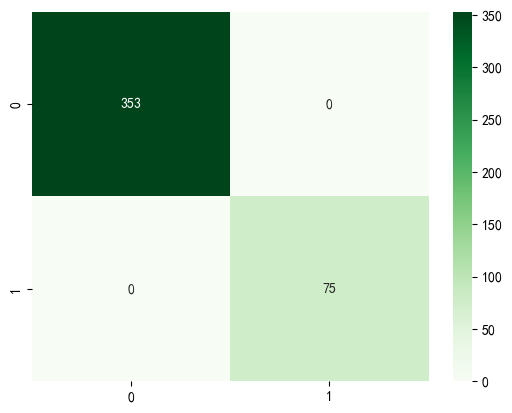

In [16]:
###pca-Smote-LSTM
#LSTM长短期记忆网络
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
from mealpy.swarm_based.ZOA import OriginalZOA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

np.random.seed(42)#设置随机种子，保证每次输出结果都一样
# 确保 x_train_smote 和 y_train_smote 有相同的样本数量
print("x_train_smote shape:", x_train_smote.shape)
print("y_train_smote shape:", y_train_smote.shape)

# 确保 X_test_pca 和 y_test_spring 有相同的样本数量
print("X_test_pca shape:", X_test_pca.shape)
print("y_test_spring shape:", y_test_spring.shape)

# 重塑 LSTM 输入数据的形状
train_X1 = x_train_smote.reshape((x_train_smote.shape[0], 1, x_train_smote.shape[1]))
test_X1 = X_test_pca.reshape((X_test_pca.shape[0],1, X_test_pca.shape[1]))
num_classes = 2
# 确保 one-hot 编码后的数据与原始数据的样本数量一致
y_train_cat = to_categorical(y_train_smote, num_classes=num_classes)
print("y_train_cat shape:", y_train_cat.shape)
y_test_spring_encoded = to_categorical(y_test_spring, num_classes=num_classes)
print("y_test_spring_encoded shape:", y_test_spring_encoded.shape)

# 使用 to_categorical 进行one-hot编码
y_train_smote_encoded = to_categorical(y_train_smote, num_classes)
y_test_spring_encoded = to_categorical(y_test_spring, num_classes)
print(y_train_smote)            # 输出原始标签
print(y_train_smote_encoded)    # 输出one-hot编码后的标签

# 将标签转换为独热编码
y_train_cat = to_categorical(y_train_smote, num_classes=2)

# 确保 create_model 函数在当前作用域
def LSTM_model(units, learning_rate, train_X1):
    # 使用Keras建构LSTM模型
    model = Sequential()
    model.add(LSTM(units=int(units), input_shape=(train_X1.shape[1], train_X1.shape[2])))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

def cross_val_score_LSTM(nest, train_X1):
    units, epochs, learning_rate = nest
    model = LSTM_model(units, learning_rate, train_X1)
    history = model.fit(train_X1, y_train_cat, epochs=int(epochs), batch_size=64, validation_split=0.2)
    y_pred_s52_classes = model.predict(test_X1)
    y_pred_s52_classes = np.argmax(y_pred_s52_classes, axis=1)
    y_test_spring_classes = np.argmax(y_test_spring_encoded, axis=1)
    accuracy = accuracy_score(y_test_spring_classes, y_pred_s52_classes)
    return accuracy

def fitness_function(nest):
    units,epochs,learning_rate = nest
    return cross_val_score_LSTM(nest,train_X1)

# 定义适应度函数的参数范围
def get_nest():
    problem_dict1 = {
        "fit_func": fitness_function,
        "lb": [30, 10, 0.0001],
        "ub": [50, 20, 0.001],
        "minmax": "max",
    }
    epoch = 2
    pop_size = 16
    model = OriginalZOA(epoch, pop_size)
    best_position, best_fitness = model.solve(problem_dict1)
    print(f"Solution: {best_position}, Fitness: {best_fitness}")
    # 修正返回值，返回一个包含best_fitness的元组，以及best_position
    return best_fitness, (best_position[0], best_position[1], best_position[2])

# 获取最优参数
best_fitness, nest = get_nest()  # 注意这里的解包方式也改变了
units, epochs, learning_rate = nest
print(nest)
units= nest[0]
epochs= nest[1]
learning_rate =nest[2]

model=LSTM_model(units, learning_rate, train_X1)
history = model.fit(train_X1, y_train_cat,epochs=int(epochs), batch_size=64,validation_split=0.2)

# 评估模型性能，确保使用二分类的评估指标
loss, accuracy = model.evaluate(test_X1, y_test_spring_encoded)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

# 使用模型进行预测
y_pred_s52_classes = model.predict(test_X1)
y_pred_s52_classes = np.argmax(y_pred_s52_classes, axis=1)
# 将 y_test_spring_encoded 转换回二进制格式
y_test_spring_classes = np.argmax(y_test_spring_encoded, axis=1)
#计算评估指标
accuracy = accuracy_score(y_test_spring_classes, y_pred_s52_classes)
precision = precision_score(y_test_spring_classes, y_pred_s52_classes, average='macro')
recall = recall_score(y_test_spring_classes, y_pred_s52_classes, average='macro')
f1 = f1_score(y_test_spring_classes, y_pred_s52_classes, average='macro')

# 打印评估指标
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision (macro): {precision:.2f}')
print(f'Recall (macro): {recall:.2f}')
print(f'F1 Score (macro): {f1:.2f}')

# 如果需要绘制混淆矩阵
conf_matrix = confusion_matrix(y_test_spring_classes, y_pred_s52_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.show()

x_train_resampled shape: (4502, 2)
y_train_resampled shape: (4502,)
X_test_pca shape: (428, 2)
y_test_spring shape: (428,)
y_train_cat shape: (4502, 2)
y_test_spring_encoded shape: (428, 2)
[0 0 0 ... 1 1 1]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 37)                  │           5,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,498 (41.01 KB)

 Trainable params: 10,498 (41.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/19
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9286 - loss: 0.6157 - val_accuracy: 1.0000 - val_loss: 0.2311
Epoch 2/19
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.1097 - val_accuracy: 1.0000 - val_loss: 0.0081
Epoch 3/19
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 4/19
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 5/19
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.4497e-04 - val_accuracy: 1.0000 - val_loss: 6.7836e-04
Epoch 6/19
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 5.8136e-04 - val_accuracy: 1.0000 - val_loss: 4.4421e-04
Epoch 7/19
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.9470e-04 - val_accuracy: 1.0000 - val_loss: 3.1121e-04
Epoch 8/19
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 2.8191e-04 - val

2024/06/01 11:38:18 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: Solving single objective optimization problem.
C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 41)                  │           7,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,050 (47.07 KB)

 Trainable params: 12,050 (47.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 1.0000 - loss: 0.5959 - val_accuracy: 1.0000 - val_loss: 0.2941
Epoch 2/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0744 - val_accuracy: 1.0000 - val_loss: 0.0102
Epoch 3/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 4/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 5/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.4275e-04 - val_accuracy: 1.0000 - val_loss: 9.1609e-04
Epoch 6/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.5904e-04 - val_accuracy: 1.0000 - val_loss: 6.1789e-04
Epoch 7/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.0731e-04 - val_accuracy: 1.0000 - val_loss: 4.4671e-04
Epoch 8/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 2.2198e-04 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/18
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9486 - loss: 0.5713 - val_accuracy: 1.0000 - val_loss: 0.2832
Epoch 2/18
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0639 - val_accuracy: 1.0000 - val_loss: 0.0159
Epoch 3/18
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 1.0000 - val_loss: 0.0043
Epoch 4/18
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 5/18
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.1098e-04 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 6/18
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 5.6855e-04 - val_accuracy: 1.0000 - val_loss: 8.0366e-04
Epoch 7/18
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.7460e-04 - val_accuracy: 1.0000 - val_loss: 5.7164e-04
Epoch 8/18
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 2.1370e-04 - val_accu

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 44)                  │           8,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           2,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,298 (51.95 KB)

 Trainable params: 13,298 (51.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9123 - loss: 0.6178 - val_accuracy: 1.0000 - val_loss: 0.2603
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.1007 - val_accuracy: 1.0000 - val_loss: 0.0095
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 7.5183e-04 - val_accuracy: 1.0000 - val_loss: 8.0512e-04
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4.4661e-04 - val_accuracy: 1.0000 - val_loss: 5.2337e-04
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 2.8986e-04 - val_accuracy: 1.0000 - val_loss: 3.6530e-04
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.0486e-04 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 46)                  │           9,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           3,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,170 (55.35 KB)

 Trainable params: 14,170 (55.35 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8990 - loss: 0.6377 - val_accuracy: 1.0000 - val_loss: 0.1748
Epoch 2/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.1508 - val_accuracy: 1.0000 - val_loss: 0.0056
Epoch 3/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 4/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 9.2432e-04
Epoch 5/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 6.2046e-04 - val_accuracy: 1.0000 - val_loss: 5.5108e-04
Epoch 6/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.6391e-04 - val_accuracy: 1.0000 - val_loss: 3.6736e-04
Epoch 7/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 2.3817e-04 - val_accuracy: 1.0000 - val_loss: 2.6369e-04
Epoch 8/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.6525e-04 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, 33)                  │           4,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,074 (35.45 KB)

 Trainable params: 9,074 (35.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9118 - loss: 0.6123 - val_accuracy: 1.0000 - val_loss: 0.3822
Epoch 2/13
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1049 - val_accuracy: 1.0000 - val_loss: 0.0161
Epoch 3/13
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 1.0000 - val_loss: 0.0039
Epoch 4/13
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 5/13
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.5779e-04 - val_accuracy: 1.0000 - val_loss: 8.3197e-04
Epoch 6/13
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4.1030e-04 - val_accuracy: 1.0000 - val_loss: 4.4951e-04
Epoch 7/13
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 2.5760e-04 - val_accuracy: 1.0000 - val_loss: 2.6918e-04
Epoch 8/13
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.7036e-04 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 38)                  │           6,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,874 (42.48 KB)

 Trainable params: 10,874 (42.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9499 - loss: 0.6056 - val_accuracy: 1.0000 - val_loss: 0.4131
Epoch 2/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.1099 - val_accuracy: 1.0000 - val_loss: 0.0205
Epoch 3/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0066 - val_accuracy: 1.0000 - val_loss: 0.0044
Epoch 4/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 5/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 6/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.3343e-04 - val_accuracy: 1.0000 - val_loss: 7.8560e-04
Epoch 7/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.1520e-04 - val_accuracy: 1.0000 - val_loss: 5.5264e-04
Epoch 8/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.9010e-04 - val_accuracy

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                        │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9724 - loss: 0.6022 - val_accuracy: 1.0000 - val_loss: 0.2324
Epoch 2/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0898 - val_accuracy: 1.0000 - val_loss: 0.0119
Epoch 3/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0053 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 4/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 5/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 9.3937e-04 - val_accuracy: 1.0000 - val_loss: 8.6690e-04
Epoch 6/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.6587e-04 - val_accuracy: 1.0000 - val_loss: 5.5878e-04
Epoch 7/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.7602e-04 - val_accuracy: 1.0000 - val_loss: 3.8694e-04
Epoch 8/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.6429e-04 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 39)                  │           6,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 64)                  │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,258 (43.98 KB)

 Trainable params: 11,258 (43.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/17
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8468 - loss: 0.6158 - val_accuracy: 1.0000 - val_loss: 0.5478
Epoch 2/17
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.1355 - val_accuracy: 1.0000 - val_loss: 0.0509
Epoch 3/17
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0092 - val_accuracy: 1.0000 - val_loss: 0.0055
Epoch 4/17
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 5/17
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 8.8480e-04 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 6/17
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.2017e-04 - val_accuracy: 1.0000 - val_loss: 6.7927e-04
Epoch 7/17
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.3846e-04 - val_accuracy: 1.0000 - val_loss: 4.5517e-04
Epoch 8/17
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.3191e-04 - val_accu

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                        │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8528 - loss: 0.6414 - val_accuracy: 1.0000 - val_loss: 0.0976
Epoch 2/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.2349 - val_accuracy: 1.0000 - val_loss: 0.0076
Epoch 3/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0113 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 4/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 8.7766e-04
Epoch 5/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 5.1859e-04
Epoch 6/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 5.8559e-04 - val_accuracy: 1.0000 - val_loss: 3.4373e-04
Epoch 7/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.7004e-04 - val_accuracy: 1.0000 - val_loss: 2.4304e-04
Epoch 8/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 2.5296e-04 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, 42)                  │           7,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 64)                  │           2,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,458 (48.66 KB)

 Trainable params: 12,458 (48.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9378 - loss: 0.5843 - val_accuracy: 1.0000 - val_loss: 0.2436
Epoch 2/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0590 - val_accuracy: 1.0000 - val_loss: 0.0106
Epoch 3/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 4/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 5/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.8934e-04 - val_accuracy: 1.0000 - val_loss: 8.7003e-04
Epoch 6/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4.7998e-04 - val_accuracy: 1.0000 - val_loss: 5.5485e-04
Epoch 7/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.2671e-04 - val_accuracy: 1.0000 - val_loss: 3.8250e-04
Epoch 8/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 2.3365e-04 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_11 (LSTM)                       │ (None, 48)                  │           9,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 64)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,074 (58.88 KB)

 Trainable params: 15,074 (58.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/19
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7710 - loss: 0.5703 - val_accuracy: 1.0000 - val_loss: 0.6447
Epoch 2/19
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1336 - val_accuracy: 1.0000 - val_loss: 0.1479
Epoch 3/19
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0195 - val_accuracy: 1.0000 - val_loss: 0.0105
Epoch 4/19
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 0.0036
Epoch 5/19
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.8384e-04 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 6/19
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 5.3765e-04 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 7/19
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.3266e-04 - val_accuracy: 1.0000 - val_loss: 7.5548e-04
Epoch 8/19
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.2371e-04 - val_accuracy

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 36)                  │           5,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 64)                  │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,130 (39.57 KB)

 Trainable params: 10,130 (39.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9950 - loss: 0.5886 - val_accuracy: 1.0000 - val_loss: 0.2230
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0800 - val_accuracy: 1.0000 - val_loss: 0.0122
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 8.0879e-04 - val_accuracy: 1.0000 - val_loss: 6.4700e-04
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.7793e-04 - val_accuracy: 1.0000 - val_loss: 3.7658e-04
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.1354e-04 - val_accuracy: 1.0000 - val_loss: 2.4260e-04
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.2081e-04 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_13 (LSTM)                       │ (None, 38)                  │           6,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 64)                  │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,874 (42.48 KB)

 Trainable params: 10,874 (42.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9962 - loss: 0.6043 - val_accuracy: 1.0000 - val_loss: 0.1749
Epoch 2/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0863 - val_accuracy: 1.0000 - val_loss: 0.0075
Epoch 3/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 4/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 5/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 8.1929e-04 - val_accuracy: 1.0000 - val_loss: 7.4598e-04
Epoch 6/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.0193e-04 - val_accuracy: 1.0000 - val_loss: 4.9501e-04
Epoch 7/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.3640e-04 - val_accuracy: 1.0000 - val_loss: 3.5011e-04
Epoch 8/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.3541e-04 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/19
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8925 - loss: 0.6021 - val_accuracy: 1.0000 - val_loss: 0.3992
Epoch 2/19
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0995 - val_accuracy: 1.0000 - val_loss: 0.0151
Epoch 3/19
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0050 - val_accuracy: 1.0000 - val_loss: 0.0036
Epoch 4/19
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 5/19
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 8.8956e-04 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 6/19
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 5.5517e-04 - val_accuracy: 1.0000 - val_loss: 6.8009e-04
Epoch 7/19
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.6585e-04 - val_accuracy: 1.0000 - val_loss: 4.8407e-04
Epoch 8/19
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.6537e-04 - val_accu

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                       │ (None, 43)                  │           7,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 64)                  │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,874 (50.29 KB)

 Trainable params: 12,874 (50.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9416 - loss: 0.6102 - val_accuracy: 1.0000 - val_loss: 0.3464
Epoch 2/13
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0967 - val_accuracy: 1.0000 - val_loss: 0.0167
Epoch 3/13
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 1.0000 - val_loss: 0.0037
Epoch 4/13
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 5/13
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.4747e-04 - val_accuracy: 1.0000 - val_loss: 7.1939e-04
Epoch 6/13
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4.2637e-04 - val_accuracy: 1.0000 - val_loss: 4.3245e-04
Epoch 7/13
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 2.6733e-04 - val_accuracy: 1.0000 - val_loss: 2.8517e-04
Epoch 8/13
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.7538e-04 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                       │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8270 - loss: 0.5992 - val_accuracy: 1.0000 - val_loss: 0.4658
Epoch 2/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0944 - val_accuracy: 1.0000 - val_loss: 0.0242
Epoch 3/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 1.0000 - val_loss: 0.0048
Epoch 4/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 5/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 6.3332e-04 - val_accuracy: 1.0000 - val_loss: 6.9127e-04
Epoch 6/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.3506e-04 - val_accuracy: 1.0000 - val_loss: 3.6600e-04
Epoch 7/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 2.0239e-04 - val_accuracy: 1.0000 - val_loss: 2.2340e-04
Epoch 8/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.3257e-04 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_17 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8771 - loss: 0.5944 - val_accuracy: 1.0000 - val_loss: 0.4228
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0979 - val_accuracy: 1.0000 - val_loss: 0.0292
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0062 - val_accuracy: 1.0000 - val_loss: 0.0044
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 7.9408e-04 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.8695e-04 - val_accuracy: 1.0000 - val_loss: 6.7891e-04
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.2104e-04 - val_accuracy: 1.0000 - val_loss: 4.7140e-04
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.2674e-04 - val_accu

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9574 - loss: 0.5982 - val_accuracy: 1.0000 - val_loss: 0.3598
Epoch 2/13
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0971 - val_accuracy: 1.0000 - val_loss: 0.0216
Epoch 3/13
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0060 - val_accuracy: 1.0000 - val_loss: 0.0048
Epoch 4/13
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 5/13
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 6/13
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 6.1780e-04 - val_accuracy: 1.0000 - val_loss: 8.1655e-04
Epoch 7/13
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.1425e-04 - val_accuracy: 1.0000 - val_loss: 5.5911e-04
Epoch 8/13
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.9012e-04 - val_accuracy

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_19 (LSTM)                       │ (None, 43)                  │           7,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 64)                  │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,874 (50.29 KB)

 Trainable params: 12,874 (50.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8855 - loss: 0.6061 - val_accuracy: 1.0000 - val_loss: 0.3977
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0834 - val_accuracy: 1.0000 - val_loss: 0.0166
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 1.0000 - val_loss: 0.0041
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 8.4992e-04 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.2549e-04 - val_accuracy: 1.0000 - val_loss: 8.0461e-04
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.6398e-04 - val_accuracy: 1.0000 - val_loss: 5.7391e-04
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.6637e-04 - val_accu

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                       │ (None, 45)                  │           8,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 64)                  │           2,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,730 (53.63 KB)

 Trainable params: 13,730 (53.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9268 - loss: 0.6055 - val_accuracy: 1.0000 - val_loss: 0.2496
Epoch 2/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0833 - val_accuracy: 1.0000 - val_loss: 0.0075
Epoch 3/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 4/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 5/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 8.5102e-04 - val_accuracy: 1.0000 - val_loss: 6.6097e-04
Epoch 6/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.1431e-04 - val_accuracy: 1.0000 - val_loss: 3.9269e-04
Epoch 7/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.3860e-04 - val_accuracy: 1.0000 - val_loss: 2.4917e-04
Epoch 8/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.3496e-04 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_21 (LSTM)                       │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9519 - loss: 0.6018 - val_accuracy: 1.0000 - val_loss: 0.3190
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0931 - val_accuracy: 1.0000 - val_loss: 0.0184
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0057 - val_accuracy: 1.0000 - val_loss: 0.0048
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.1914e-04 - val_accuracy: 1.0000 - val_loss: 8.2961e-04
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.1520e-04 - val_accuracy: 1.0000 - val_loss: 5.7737e-04
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.9703e-04 - val_accuracy

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_22 (LSTM)                       │ (None, 38)                  │           6,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 64)                  │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,874 (42.48 KB)

 Trainable params: 10,874 (42.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8167 - loss: 0.6043 - val_accuracy: 1.0000 - val_loss: 0.4412
Epoch 2/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0988 - val_accuracy: 1.0000 - val_loss: 0.0208
Epoch 3/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0055 - val_accuracy: 1.0000 - val_loss: 0.0045
Epoch 4/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 5/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 9.0928e-04 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 6/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.6225e-04 - val_accuracy: 1.0000 - val_loss: 7.7153e-04
Epoch 7/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.7442e-04 - val_accuracy: 1.0000 - val_loss: 5.4269e-04
Epoch 8/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.7402e-04 - val_accu

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_23 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9247 - loss: 0.5918 - val_accuracy: 1.0000 - val_loss: 0.1370
Epoch 2/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0761 - val_accuracy: 1.0000 - val_loss: 0.0080
Epoch 3/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0043 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 4/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 5/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 8.1770e-04 - val_accuracy: 1.0000 - val_loss: 8.0404e-04
Epoch 6/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.0217e-04 - val_accuracy: 1.0000 - val_loss: 5.3204e-04
Epoch 7/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.3723e-04 - val_accuracy: 1.0000 - val_loss: 3.7571e-04
Epoch 8/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.4518e-04 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_24 (LSTM)                       │ (None, 41)                  │           7,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 64)                  │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_74 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,050 (47.07 KB)

 Trainable params: 12,050 (47.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9067 - loss: 0.6031 - val_accuracy: 1.0000 - val_loss: 0.2491
Epoch 2/13
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0827 - val_accuracy: 1.0000 - val_loss: 0.0118
Epoch 3/13
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 4/13
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 5/13
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 8.4387e-04 - val_accuracy: 1.0000 - val_loss: 8.3282e-04
Epoch 6/13
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.2305e-04 - val_accuracy: 1.0000 - val_loss: 5.2694e-04
Epoch 7/13
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.4657e-04 - val_accuracy: 1.0000 - val_loss: 3.6078e-04
Epoch 8/13
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.5034e-04 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_25 (LSTM)                       │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_75 (Dense)                     │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_76 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/14
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9507 - loss: 0.5857 - val_accuracy: 1.0000 - val_loss: 0.3023
Epoch 2/14
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0726 - val_accuracy: 1.0000 - val_loss: 0.0127
Epoch 3/14
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 4/14
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 5/14
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.6475e-04 - val_accuracy: 1.0000 - val_loss: 8.1220e-04
Epoch 6/14
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.0901e-04 - val_accuracy: 1.0000 - val_loss: 5.1942e-04
Epoch 7/14
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.7093e-04 - val_accuracy: 1.0000 - val_loss: 3.6180e-04
Epoch 8/14
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.9205e-04 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_26 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_78 (Dense)                     │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_79 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_80 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9685 - loss: 0.5872 - val_accuracy: 1.0000 - val_loss: 0.3449
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0776 - val_accuracy: 1.0000 - val_loss: 0.0153
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 1.0000 - val_loss: 0.0037
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.9193e-04 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 6.2396e-04 - val_accuracy: 1.0000 - val_loss: 6.9881e-04
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4.2913e-04 - val_accuracy: 1.0000 - val_loss: 4.9292e-04
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.1144e-04 - val_accu

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_27 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_81 (Dense)                     │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_82 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_83 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9737 - loss: 0.5954 - val_accuracy: 1.0000 - val_loss: 0.4570
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1112 - val_accuracy: 1.0000 - val_loss: 0.0347
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0079 - val_accuracy: 1.0000 - val_loss: 0.0069
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.1718e-04 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.7030e-04 - val_accuracy: 1.0000 - val_loss: 7.4265e-04
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.3688e-04 - val_accuracy: 1.

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_28 (LSTM)                       │ (None, 39)                  │           6,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_84 (Dense)                     │ (None, 64)                  │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_85 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_86 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,258 (43.98 KB)

 Trainable params: 11,258 (43.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8726 - loss: 0.6363 - val_accuracy: 1.0000 - val_loss: 0.2337
Epoch 2/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1516 - val_accuracy: 1.0000 - val_loss: 0.0106
Epoch 3/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0062 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 4/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 5/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 8.5749e-04 - val_accuracy: 1.0000 - val_loss: 7.2382e-04
Epoch 6/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4.7210e-04 - val_accuracy: 1.0000 - val_loss: 4.6782e-04
Epoch 7/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.9462e-04 - val_accuracy: 1.0000 - val_loss: 3.2247e-04
Epoch 8/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.9856e-04 - val

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_29 (LSTM)                       │ (None, 38)                  │           6,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_87 (Dense)                     │ (None, 64)                  │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_88 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_89 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,874 (42.48 KB)

 Trainable params: 10,874 (42.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8283 - loss: 0.6150 - val_accuracy: 1.0000 - val_loss: 0.4744
Epoch 2/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1236 - val_accuracy: 1.0000 - val_loss: 0.0365
Epoch 3/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0077 - val_accuracy: 1.0000 - val_loss: 0.0061
Epoch 4/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 5/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.6819e-04 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 6/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 5.7096e-04 - val_accuracy: 1.0000 - val_loss: 8.5550e-04
Epoch 7/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.7405e-04 - val_accuracy: 1.0000 - val_loss: 5.7244e-04
Epoch 8/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 2.5505e-04 - val_accu

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_30 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_90 (Dense)                     │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_91 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_92 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9768 - loss: 0.5912 - val_accuracy: 1.0000 - val_loss: 0.3481
Epoch 2/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0932 - val_accuracy: 1.0000 - val_loss: 0.0185
Epoch 3/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0061 - val_accuracy: 1.0000 - val_loss: 0.0041
Epoch 4/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 5/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 8.9229e-04 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 6/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 5.3410e-04 - val_accuracy: 1.0000 - val_loss: 6.7659e-04
Epoch 7/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.4166e-04 - val_accuracy: 1.0000 - val_loss: 4.7073e-04
Epoch 8/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.3747e-04 - val_accu

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_31 (LSTM)                       │ (None, 33)                  │           4,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_93 (Dense)                     │ (None, 64)                  │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_94 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_95 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,074 (35.45 KB)

 Trainable params: 9,074 (35.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9478 - loss: 0.6076 - val_accuracy: 1.0000 - val_loss: 0.4116
Epoch 2/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1190 - val_accuracy: 1.0000 - val_loss: 0.0340
Epoch 3/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0080 - val_accuracy: 1.0000 - val_loss: 0.0071
Epoch 4/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 5/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 6/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.1358e-04 - val_accuracy: 1.0000 - val_loss: 8.8268e-04
Epoch 7/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.8786e-04 - val_accuracy: 1.0000 - val_loss: 3.7521e-04
Epoch 8/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.1386e-04 - val_accuracy

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_32 (LSTM)                       │ (None, 41)                  │           7,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_96 (Dense)                     │ (None, 64)                  │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_97 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_98 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,050 (47.07 KB)

 Trainable params: 12,050 (47.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9274 - loss: 0.6127 - val_accuracy: 1.0000 - val_loss: 0.2075
Epoch 2/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0986 - val_accuracy: 1.0000 - val_loss: 0.0096
Epoch 3/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0050 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 4/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 5/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.7316e-04 - val_accuracy: 1.0000 - val_loss: 9.0555e-04
Epoch 6/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 5.1019e-04 - val_accuracy: 1.0000 - val_loss: 5.7225e-04
Epoch 7/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.2275e-04 - val_accuracy: 1.0000 - val_loss: 3.8321e-04
Epoch 8/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 2.1889e-04 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_33 (LSTM)                       │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_99 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_100 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_101 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9290 - loss: 0.5865 - val_accuracy: 1.0000 - val_loss: 0.4768
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.1000 - val_accuracy: 1.0000 - val_loss: 0.0403
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0080 - val_accuracy: 1.0000 - val_loss: 0.0070
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.4372e-04 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.1438e-04 - val_accuracy: 1.0000 - val_loss: 7.7795e-04
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.9424e-04 - val_accuracy: 1

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_34 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_102 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_103 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_104 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9750 - loss: 0.6234 - val_accuracy: 1.0000 - val_loss: 0.2616
Epoch 2/13
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.1334 - val_accuracy: 1.0000 - val_loss: 0.0133
Epoch 3/13
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0063 - val_accuracy: 1.0000 - val_loss: 0.0034
Epoch 4/13
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 5/13
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 9.5450e-04 - val_accuracy: 1.0000 - val_loss: 4.3677e-04
Epoch 6/13
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.6417e-04 - val_accuracy: 1.0000 - val_loss: 2.3360e-04
Epoch 7/13
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.7290e-04 - val_accuracy: 1.0000 - val_loss: 1.4455e-04
Epoch 8/13
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.6626e-04 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_35 (LSTM)                       │ (None, 45)                  │           8,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_105 (Dense)                    │ (None, 64)                  │           2,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_106 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_107 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,730 (53.63 KB)

 Trainable params: 13,730 (53.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9540 - loss: 0.5883 - val_accuracy: 1.0000 - val_loss: 0.3251
Epoch 2/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0688 - val_accuracy: 1.0000 - val_loss: 0.0108
Epoch 3/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 4/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 5/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.0537e-04 - val_accuracy: 1.0000 - val_loss: 9.3730e-04
Epoch 6/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4.8415e-04 - val_accuracy: 1.0000 - val_loss: 6.2307e-04
Epoch 7/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 2.8407e-04 - val_accuracy: 1.0000 - val_loss: 4.4806e-04
Epoch 8/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.8174e-04 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_36 (LSTM)                       │ (None, 47)                  │           9,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_108 (Dense)                    │ (None, 64)                  │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_109 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_110 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,618 (57.10 KB)

 Trainable params: 14,618 (57.10 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8931 - loss: 0.6153 - val_accuracy: 1.0000 - val_loss: 0.2973
Epoch 2/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0936 - val_accuracy: 1.0000 - val_loss: 0.0086
Epoch 3/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 4/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 5/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 6.8430e-04 - val_accuracy: 1.0000 - val_loss: 7.2851e-04
Epoch 6/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4.0731e-04 - val_accuracy: 1.0000 - val_loss: 4.7897e-04
Epoch 7/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 2.6222e-04 - val_accuracy: 1.0000 - val_loss: 3.3900e-04
Epoch 8/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 1.8134e-04 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_37 (LSTM)                       │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_111 (Dense)                    │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_112 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_113 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9788 - loss: 0.5756 - val_accuracy: 1.0000 - val_loss: 0.2715
Epoch 2/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0653 - val_accuracy: 1.0000 - val_loss: 0.0131
Epoch 3/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 1.0000 - val_loss: 0.0036
Epoch 4/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 5/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.1798e-04 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 6/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 5.7481e-04 - val_accuracy: 1.0000 - val_loss: 6.9340e-04
Epoch 7/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.9910e-04 - val_accuracy: 1.0000 - val_loss: 4.9451e-04
Epoch 8/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 2.9150e-04 - val_accu

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_38 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_114 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_115 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_116 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9316 - loss: 0.6099 - val_accuracy: 1.0000 - val_loss: 0.4320
Epoch 2/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.1272 - val_accuracy: 1.0000 - val_loss: 0.0196
Epoch 3/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0066 - val_accuracy: 1.0000 - val_loss: 0.0041
Epoch 4/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 5/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 9.6525e-04 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 6/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.7023e-04 - val_accuracy: 1.0000 - val_loss: 7.2589e-04
Epoch 7/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.7437e-04 - val_accuracy: 1.0000 - val_loss: 5.1417e-04
Epoch 8/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.6101e-04 - val_accu

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_39 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_117 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_118 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_119 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9937 - loss: 0.5919 - val_accuracy: 1.0000 - val_loss: 0.2403
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0816 - val_accuracy: 1.0000 - val_loss: 0.0101
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.8396e-04 - val_accuracy: 1.0000 - val_loss: 8.0290e-04
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4.5853e-04 - val_accuracy: 1.0000 - val_loss: 5.2634e-04
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.0180e-04 - val_accuracy: 1.0000 - val_loss: 3.7115e-04
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.1108e-04 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_40 (LSTM)                       │ (None, 45)                  │           8,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_120 (Dense)                    │ (None, 64)                  │           2,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_121 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_122 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,730 (53.63 KB)

 Trainable params: 13,730 (53.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8157 - loss: 0.6104 - val_accuracy: 1.0000 - val_loss: 0.3229
Epoch 2/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0883 - val_accuracy: 1.0000 - val_loss: 0.0109
Epoch 3/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 4/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 5/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 9.3632e-04 - val_accuracy: 1.0000 - val_loss: 9.1484e-04
Epoch 6/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.9160e-04 - val_accuracy: 1.0000 - val_loss: 6.0913e-04
Epoch 7/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.0916e-04 - val_accuracy: 1.0000 - val_loss: 4.3660e-04
Epoch 8/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.9561e-04 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_41 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_123 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_124 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_125 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9599 - loss: 0.6079 - val_accuracy: 1.0000 - val_loss: 0.3767
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.1090 - val_accuracy: 1.0000 - val_loss: 0.0221
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0065 - val_accuracy: 1.0000 - val_loss: 0.0049
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.1694e-04 - val_accuracy: 1.0000 - val_loss: 8.1322e-04
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.0159e-04 - val_accuracy: 1.0000 - val_loss: 5.6189e-04
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.8410e-04 - val_accuracy

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_42 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_126 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_127 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_128 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9453 - loss: 0.5838 - val_accuracy: 1.0000 - val_loss: 0.1768
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0673 - val_accuracy: 1.0000 - val_loss: 0.0094
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 9.6012e-04 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 5.9942e-04 - val_accuracy: 1.0000 - val_loss: 6.7282e-04
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.0600e-04 - val_accuracy: 1.0000 - val_loss: 4.8013e-04
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.9022e-04 - val_accu

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_43 (LSTM)                       │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_129 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_130 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_131 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9549 - loss: 0.5831 - val_accuracy: 1.0000 - val_loss: 0.1249
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0579 - val_accuracy: 1.0000 - val_loss: 0.0076
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 9.1999e-04 - val_accuracy: 1.0000 - val_loss: 9.3521e-04
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.7917e-04 - val_accuracy: 1.0000 - val_loss: 6.4036e-04
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.9381e-04 - val_accuracy: 1.0000 - val_loss: 4.6334e-04
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 2.8760e-04 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_44 (LSTM)                       │ (None, 35)                  │           5,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_132 (Dense)                    │ (None, 64)                  │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_133 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_134 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,770 (38.16 KB)

 Trainable params: 9,770 (38.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9367 - loss: 0.5875 - val_accuracy: 1.0000 - val_loss: 0.1833
Epoch 2/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0640 - val_accuracy: 1.0000 - val_loss: 0.0098
Epoch 3/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 4/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 5/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 6/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 6.5455e-04 - val_accuracy: 1.0000 - val_loss: 6.9870e-04
Epoch 7/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.5511e-04 - val_accuracy: 1.0000 - val_loss: 5.0296e-04
Epoch 8/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.3161e-04 - val_accuracy

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_45 (LSTM)                       │ (None, 41)                  │           7,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_135 (Dense)                    │ (None, 64)                  │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_136 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_137 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,050 (47.07 KB)

 Trainable params: 12,050 (47.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9512 - loss: 0.5895 - val_accuracy: 1.0000 - val_loss: 0.0999
Epoch 2/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0667 - val_accuracy: 1.0000 - val_loss: 0.0057
Epoch 3/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 4/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 5/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.9431e-04 - val_accuracy: 1.0000 - val_loss: 6.2559e-04
Epoch 6/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.0718e-04 - val_accuracy: 1.0000 - val_loss: 4.2003e-04
Epoch 7/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.4572e-04 - val_accuracy: 1.0000 - val_loss: 3.0162e-04
Epoch 8/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 2.5460e-04 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_46 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_138 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_139 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_140 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8871 - loss: 0.5811 - val_accuracy: 1.0000 - val_loss: 0.3315
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0705 - val_accuracy: 1.0000 - val_loss: 0.0181
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 1.0000 - val_loss: 0.0048
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.2310e-04 - val_accuracy: 1.0000 - val_loss: 9.3222e-04
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.3137e-04 - val_accuracy: 1.0000 - val_loss: 6.6726e-04
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.0794e-04 - val_accuracy

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_47 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_141 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_142 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_143 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8944 - loss: 0.5868 - val_accuracy: 1.0000 - val_loss: 0.2486
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0601 - val_accuracy: 1.0000 - val_loss: 0.0092
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.8420e-04 - val_accuracy: 1.0000 - val_loss: 7.9786e-04
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4.9739e-04 - val_accuracy: 1.0000 - val_loss: 5.2375e-04
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.3900e-04 - val_accuracy: 1.0000 - val_loss: 3.7334e-04
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 2.4529e-04 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_48 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_144 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_145 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_146 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9121 - loss: 0.6009 - val_accuracy: 1.0000 - val_loss: 0.2812
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0870 - val_accuracy: 1.0000 - val_loss: 0.0128
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 1.0000 - val_loss: 0.0037
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.9686e-04 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 5.5921e-04 - val_accuracy: 1.0000 - val_loss: 7.0428e-04
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.7712e-04 - val_accuracy: 1.0000 - val_loss: 5.0800e-04
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 2.7426e-04 - val_acc

2024/06/01 11:42:16 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 1, Current best: 1.0, Global best: 1.0, Runtime: 158.07182 seconds
C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_49 (LSTM)                       │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_147 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_148 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_149 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9583 - loss: 0.6030 - val_accuracy: 1.0000 - val_loss: 0.3777
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1100 - val_accuracy: 1.0000 - val_loss: 0.0195
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0071 - val_accuracy: 1.0000 - val_loss: 0.0048
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 7.6807e-04 - val_accuracy: 1.0000 - val_loss: 8.3448e-04
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 5.0027e-04 - val_accuracy: 1.0000 - val_loss: 5.2659e-04
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 3.3632e-04 - val_accurac

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_50 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_150 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_151 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_152 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8575 - loss: 0.5642 - val_accuracy: 1.0000 - val_loss: 0.4404
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0919 - val_accuracy: 1.0000 - val_loss: 0.0438
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0086 - val_accuracy: 1.0000 - val_loss: 0.0079
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 6.0613e-04 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 4.0630e-04 - val_accuracy: 1.0000 - val_loss: 8.2229e-04
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 2.7709e-04 - val_accuracy: 1

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_51 (LSTM)                       │ (None, 34)                  │           5,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_153 (Dense)                    │ (None, 64)                  │           2,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_154 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_155 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,418 (36.79 KB)

 Trainable params: 9,418 (36.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9336 - loss: 0.6116 - val_accuracy: 1.0000 - val_loss: 0.2236
Epoch 2/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1031 - val_accuracy: 1.0000 - val_loss: 0.0095
Epoch 3/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0050 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 4/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 5/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.1432e-04 - val_accuracy: 1.0000 - val_loss: 9.4567e-04
Epoch 6/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 5.4716e-04 - val_accuracy: 1.0000 - val_loss: 6.4158e-04
Epoch 7/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 3.6860e-04 - val_accuracy: 1.0000 - val_loss: 4.5874e-04
Epoch 8/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 2.6394e-04 - val

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_52 (LSTM)                       │ (None, 37)                  │           5,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_156 (Dense)                    │ (None, 64)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_157 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_158 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,498 (41.01 KB)

 Trainable params: 10,498 (41.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9244 - loss: 0.5978 - val_accuracy: 1.0000 - val_loss: 0.4724
Epoch 2/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1076 - val_accuracy: 1.0000 - val_loss: 0.0315
Epoch 3/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0070 - val_accuracy: 1.0000 - val_loss: 0.0058
Epoch 4/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 5/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 9.4738e-04 - val_accuracy: 1.0000 - val_loss: 9.8091e-04
Epoch 6/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 5.2412e-04 - val_accuracy: 1.0000 - val_loss: 5.2133e-04
Epoch 7/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.3672e-04 - val_accuracy: 1.0000 - val_loss: 3.1466e-04
Epoch 8/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 2.3698e-04 - val

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_53 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_159 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_160 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_161 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9850 - loss: 0.5800 - val_accuracy: 1.0000 - val_loss: 0.1230
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0685 - val_accuracy: 1.0000 - val_loss: 0.0088
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0051 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 8.0146e-04
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 6.2640e-04 - val_accuracy: 1.0000 - val_loss: 5.1172e-04
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4.2165e-04 - val_accuracy: 1.0000 - val_loss: 3.5075e-04
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 2.9837e-04 - val_acc

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_54 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_162 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_163 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_164 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9624 - loss: 0.5967 - val_accuracy: 1.0000 - val_loss: 0.1679
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0917 - val_accuracy: 1.0000 - val_loss: 0.0095
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0056 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 9.8367e-04
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 6.3627e-04 - val_accuracy: 1.0000 - val_loss: 6.5651e-04
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4.2614e-04 - val_accuracy: 1.0000 - val_loss: 4.7185e-04
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.0687e-04 - val_acc

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_55 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_165 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_166 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_167 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7962 - loss: 0.6307 - val_accuracy: 1.0000 - val_loss: 0.4256
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1370 - val_accuracy: 1.0000 - val_loss: 0.0238
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0067 - val_accuracy: 1.0000 - val_loss: 0.0053
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.1454e-04 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 5.0790e-04 - val_accuracy: 1.0000 - val_loss: 8.5413e-04
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.1726e-04 - val_accuracy: 1.0000 - val_loss: 5.8584e-04
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 2.1900e-04 - val_acc

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_56 (LSTM)                       │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_168 (Dense)                    │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_169 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_170 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/14
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8987 - loss: 0.5960 - val_accuracy: 1.0000 - val_loss: 0.4185
Epoch 2/14
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0842 - val_accuracy: 1.0000 - val_loss: 0.0207
Epoch 3/14
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 1.0000 - val_loss: 0.0038
Epoch 4/14
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 5/14
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.2681e-04 - val_accuracy: 1.0000 - val_loss: 8.6578e-04
Epoch 6/14
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4.4995e-04 - val_accuracy: 1.0000 - val_loss: 5.3785e-04
Epoch 7/14
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.0304e-04 - val_accuracy: 1.0000 - val_loss: 3.6487e-04
Epoch 8/14
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 2.2039e-04 - val

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_57 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_171 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_172 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_173 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9240 - loss: 0.5686 - val_accuracy: 1.0000 - val_loss: 0.2174
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0552 - val_accuracy: 1.0000 - val_loss: 0.0117
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 1.0000 - val_loss: 0.0035
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.3022e-04 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 5.8163e-04 - val_accuracy: 1.0000 - val_loss: 6.7540e-04
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.9485e-04 - val_accuracy: 1.0000 - val_loss: 4.7459e-04
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.8507e-04 - val_acc

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_58"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_58 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_174 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_175 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_176 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9635 - loss: 0.5985 - val_accuracy: 1.0000 - val_loss: 0.2187
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0797 - val_accuracy: 1.0000 - val_loss: 0.0118
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0049 - val_accuracy: 1.0000 - val_loss: 0.0034
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 8.4194e-04 - val_accuracy: 1.0000 - val_loss: 5.0081e-04
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.9113e-04 - val_accuracy: 1.0000 - val_loss: 2.7063e-04
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.2482e-04 - val_accuracy: 1.0000 - val_loss: 1.6445e-04
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.3227e-04 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_59 (LSTM)                       │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_177 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_178 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_179 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9196 - loss: 0.6028 - val_accuracy: 1.0000 - val_loss: 0.2448
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0802 - val_accuracy: 1.0000 - val_loss: 0.0096
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 8.8370e-04 - val_accuracy: 1.0000 - val_loss: 8.9181e-04
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 5.5121e-04 - val_accuracy: 1.0000 - val_loss: 5.9530e-04
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.7778e-04 - val_accuracy: 1.0000 - val_loss: 3.8923e-04
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.6384e-04 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_60"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_60 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_180 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_181 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_182 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7992 - loss: 0.6037 - val_accuracy: 1.0000 - val_loss: 0.3810
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0977 - val_accuracy: 1.0000 - val_loss: 0.0197
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0060 - val_accuracy: 1.0000 - val_loss: 0.0050
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 9.3468e-04 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.2887e-04 - val_accuracy: 1.0000 - val_loss: 9.0615e-04
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.3766e-04 - val_accuracy: 1.0000 - val_loss: 6.4164e-04
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.3358e-04 - val_accu

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_61"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_61 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_183 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_184 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_185 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7852 - loss: 0.6456 - val_accuracy: 1.0000 - val_loss: 0.4249
Epoch 2/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.1841 - val_accuracy: 1.0000 - val_loss: 0.0205
Epoch 3/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0078 - val_accuracy: 1.0000 - val_loss: 0.0046
Epoch 4/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 5/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 6/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 7.2737e-04 - val_accuracy: 1.0000 - val_loss: 8.8178e-04
Epoch 7/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.8209e-04 - val_accuracy: 1.0000 - val_loss: 6.2729e-04
Epoch 8/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.3761e-04 - val_accuracy

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_62"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_62 (LSTM)                       │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_186 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_187 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_188 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9353 - loss: 0.5817 - val_accuracy: 1.0000 - val_loss: 0.2947
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0730 - val_accuracy: 1.0000 - val_loss: 0.0129
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0050 - val_accuracy: 1.0000 - val_loss: 0.0037
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 9.4876e-04 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.8565e-04 - val_accuracy: 1.0000 - val_loss: 7.4501e-04
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.9092e-04 - val_accuracy: 1.0000 - val_loss: 5.3780e-04
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.8357e-04 - val_accu

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_63"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_63 (LSTM)                       │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_189 (Dense)                    │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_190 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_191 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9564 - loss: 0.5758 - val_accuracy: 1.0000 - val_loss: 0.2970
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0631 - val_accuracy: 1.0000 - val_loss: 0.0160
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 1.0000 - val_loss: 0.0046
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 9.9994e-04 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.1693e-04 - val_accuracy: 1.0000 - val_loss: 9.0542e-04
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.2187e-04 - val_accuracy: 1.0000 - val_loss: 6.4413e-04
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.0881e-04 - val_accu

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_64"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_64 (LSTM)                       │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_192 (Dense)                    │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_193 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_194 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7929 - loss: 0.6058 - val_accuracy: 1.0000 - val_loss: 0.4811
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.1199 - val_accuracy: 1.0000 - val_loss: 0.0258
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0066 - val_accuracy: 1.0000 - val_loss: 0.0047
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 9.1022e-04 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.3731e-04 - val_accuracy: 1.0000 - val_loss: 7.5773e-04
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.5069e-04 - val_accuracy: 1.0000 - val_loss: 5.3035e-04
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.5167e-04 - val_accu

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_65"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_65 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_195 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_196 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_197 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9336 - loss: 0.5950 - val_accuracy: 1.0000 - val_loss: 0.3103
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0786 - val_accuracy: 1.0000 - val_loss: 0.0134
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0050 - val_accuracy: 1.0000 - val_loss: 0.0035
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 9.4556e-04 - val_accuracy: 1.0000 - val_loss: 9.7023e-04
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.8736e-04 - val_accuracy: 1.0000 - val_loss: 6.3964e-04
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.0413e-04 - val_accuracy: 1.0000 - val_loss: 4.5239e-04
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 2.9146e-04 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_66"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_66 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_198 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_199 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_200 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8968 - loss: 0.6119 - val_accuracy: 1.0000 - val_loss: 0.3063
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.1009 - val_accuracy: 1.0000 - val_loss: 0.0191
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0060 - val_accuracy: 1.0000 - val_loss: 0.0046
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 6.2748e-04 - val_accuracy: 1.0000 - val_loss: 7.4096e-04
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4.2066e-04 - val_accuracy: 1.0000 - val_loss: 5.1223e-04
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.9409e-04 - val_accuracy

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_67"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_67 (LSTM)                       │ (None, 34)                  │           5,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_201 (Dense)                    │ (None, 64)                  │           2,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_202 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_203 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,418 (36.79 KB)

 Trainable params: 9,418 (36.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8281 - loss: 0.5936 - val_accuracy: 1.0000 - val_loss: 0.4454
Epoch 2/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.1023 - val_accuracy: 1.0000 - val_loss: 0.0230
Epoch 3/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 1.0000 - val_loss: 0.0046
Epoch 4/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 5/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 7.9303e-04 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 6/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.6531e-04 - val_accuracy: 1.0000 - val_loss: 7.3994e-04
Epoch 7/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.1156e-04 - val_accuracy: 1.0000 - val_loss: 5.1914e-04
Epoch 8/11
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 2.2143e-04 - val_accu

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_68"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_68 (LSTM)                       │ (None, 37)                  │           5,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_204 (Dense)                    │ (None, 64)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_205 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_206 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,498 (41.01 KB)

 Trainable params: 10,498 (41.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9587 - loss: 0.6162 - val_accuracy: 1.0000 - val_loss: 0.3278
Epoch 2/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.1061 - val_accuracy: 1.0000 - val_loss: 0.0114
Epoch 3/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0051 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 4/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 5/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 9.2977e-04 - val_accuracy: 1.0000 - val_loss: 6.1159e-04
Epoch 6/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.3220e-04 - val_accuracy: 1.0000 - val_loss: 3.2989e-04
Epoch 7/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.5027e-04 - val_accuracy: 1.0000 - val_loss: 2.1172e-04
Epoch 8/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.4734e-04 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_69"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_69 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_207 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_208 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_209 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8278 - loss: 0.5994 - val_accuracy: 1.0000 - val_loss: 0.4463
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.1032 - val_accuracy: 1.0000 - val_loss: 0.0218
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0059 - val_accuracy: 1.0000 - val_loss: 0.0045
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 9.5794e-04 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.9908e-04 - val_accuracy: 1.0000 - val_loss: 7.2926e-04
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4.0114e-04 - val_accuracy: 1.0000 - val_loss: 5.0793e-04
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.9114e-04 - val_accu

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_70"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_70 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_210 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_211 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_212 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9298 - loss: 0.6055 - val_accuracy: 1.0000 - val_loss: 0.3113
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.1028 - val_accuracy: 1.0000 - val_loss: 0.0106
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0060 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 9.0324e-04
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.3631e-04 - val_accuracy: 1.0000 - val_loss: 5.9643e-04
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.1654e-04 - val_accuracy: 1.0000 - val_loss: 4.1820e-04
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.8228e-04 - val_accu

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_71"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_71 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_213 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_214 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_215 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9415 - loss: 0.6068 - val_accuracy: 1.0000 - val_loss: 0.3935
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.1111 - val_accuracy: 1.0000 - val_loss: 0.0280
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0071 - val_accuracy: 1.0000 - val_loss: 0.0059
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.0996e-04 - val_accuracy: 1.0000 - val_loss: 7.7289e-04
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.8809e-04 - val_accuracy: 1.0000 - val_loss: 5.0366e-04
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.7414e-04 - val_accuracy

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_72"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_72 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_216 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_217 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_218 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9616 - loss: 0.5834 - val_accuracy: 1.0000 - val_loss: 0.1542
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0659 - val_accuracy: 1.0000 - val_loss: 0.0087
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.3818e-04 - val_accuracy: 1.0000 - val_loss: 8.9324e-04
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 5.8076e-04 - val_accuracy: 1.0000 - val_loss: 5.9643e-04
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.9629e-04 - val_accuracy: 1.0000 - val_loss: 4.2771e-04
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.8515e-04 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_73"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_73 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_219 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_220 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_221 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9223 - loss: 0.6168 - val_accuracy: 1.0000 - val_loss: 0.2985
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1183 - val_accuracy: 1.0000 - val_loss: 0.0147
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0057 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 8.7412e-04 - val_accuracy: 1.0000 - val_loss: 8.2160e-04
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 5.2087e-04 - val_accuracy: 1.0000 - val_loss: 5.2997e-04
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.4915e-04 - val_accuracy: 1.0000 - val_loss: 3.6353e-04
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 2.4666e-04 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_74"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_74 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_222 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_223 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_224 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9251 - loss: 0.6243 - val_accuracy: 1.0000 - val_loss: 0.2946
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1530 - val_accuracy: 1.0000 - val_loss: 0.0129
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0083 - val_accuracy: 1.0000 - val_loss: 0.0037
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 8.0034e-04 - val_accuracy: 1.0000 - val_loss: 7.3316e-04
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 5.2051e-04 - val_accuracy: 1.0000 - val_loss: 5.2264e-04
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.5862e-04 - val_accuracy

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_75"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_75 (LSTM)                       │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_225 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_226 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_227 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9675 - loss: 0.6010 - val_accuracy: 1.0000 - val_loss: 0.2905
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0849 - val_accuracy: 1.0000 - val_loss: 0.0122
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 9.2875e-04 - val_accuracy: 1.0000 - val_loss: 8.4339e-04
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.6484e-04 - val_accuracy: 1.0000 - val_loss: 4.9613e-04
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.7440e-04 - val_accuracy: 1.0000 - val_loss: 3.1488e-04
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.6394e-04 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_76"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_76 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_228 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_229 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_230 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9655 - loss: 0.5853 - val_accuracy: 1.0000 - val_loss: 0.1101
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0602 - val_accuracy: 1.0000 - val_loss: 0.0074
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 8.6694e-04 - val_accuracy: 1.0000 - val_loss: 7.5506e-04
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.4892e-04 - val_accuracy: 1.0000 - val_loss: 4.9805e-04
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.7669e-04 - val_accuracy: 1.0000 - val_loss: 3.5590e-04
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.7293e-04 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_77"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_77 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_231 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_232 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_233 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7580 - loss: 0.6172 - val_accuracy: 1.0000 - val_loss: 0.6097
Epoch 2/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1512 - val_accuracy: 1.0000 - val_loss: 0.0633
Epoch 3/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0115 - val_accuracy: 1.0000 - val_loss: 0.0084
Epoch 4/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 0.0034
Epoch 5/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 6/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 6.0333e-04 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 7/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.9781e-04 - val_accuracy: 1.0000 - val_loss: 7.6728e-04
Epoch 8/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.7195e-04 - val_accuracy: 1.

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_78"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_78 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_234 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_235 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_236 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8960 - loss: 0.6154 - val_accuracy: 1.0000 - val_loss: 0.3527
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1108 - val_accuracy: 1.0000 - val_loss: 0.0136
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0057 - val_accuracy: 1.0000 - val_loss: 0.0035
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.8828e-04 - val_accuracy: 1.0000 - val_loss: 8.8830e-04
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 5.8950e-04 - val_accuracy: 1.0000 - val_loss: 5.5246e-04
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.8606e-04 - val_accuracy: 1.0000 - val_loss: 3.7477e-04
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 2.7187e-04 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_79"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_79 (LSTM)                       │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_237 (Dense)                    │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_238 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_239 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9548 - loss: 0.5852 - val_accuracy: 1.0000 - val_loss: 0.2725
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0684 - val_accuracy: 1.0000 - val_loss: 0.0116
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.6081e-04 - val_accuracy: 1.0000 - val_loss: 9.0594e-04
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 5.2840e-04 - val_accuracy: 1.0000 - val_loss: 5.9678e-04
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.4833e-04 - val_accuracy: 1.0000 - val_loss: 4.2047e-04
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 2.5004e-04 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_80"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_80 (LSTM)                       │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_240 (Dense)                    │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_241 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_242 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9343 - loss: 0.5858 - val_accuracy: 1.0000 - val_loss: 0.4546
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0998 - val_accuracy: 1.0000 - val_loss: 0.0284
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0066 - val_accuracy: 1.0000 - val_loss: 0.0056
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 9.4150e-04 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 5.4732e-04 - val_accuracy: 1.0000 - val_loss: 9.5114e-04
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 3.5722e-04 - val_accuracy: 1.0000 - val_loss: 6.6862e-04
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 2.5427e-04 - val_accu

2024/06/01 11:45:01 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 2, Current best: 1.0, Global best: 1.0, Runtime: 165.00221 seconds


Solution: [3.e+01 1.e+01 1.e-04], Fitness: 1.0
(30.0, 10.0, 0.0001)


C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_81"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_81 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_243 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_244 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_245 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8729 - loss: 0.5859 - val_accuracy: 1.0000 - val_loss: 0.4609
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.1004 - val_accuracy: 1.0000 - val_loss: 0.0368
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0079 - val_accuracy: 1.0000 - val_loss: 0.0066
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.7868e-04 - val_accuracy: 1.0000 - val_loss: 8.3642e-04
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.6418e-04 - val_accuracy: 1.0000 - val_loss: 5.1276e-04
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.4407e-04 - val_accuracy

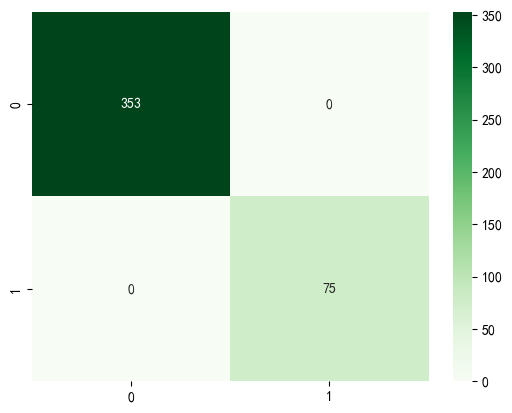

In [12]:
###pca-resampled-LSTM
#LSTM长短期记忆网络
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
from mealpy.swarm_based.ZOA import OriginalZOA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

np.random.seed(42)#设置随机种子，保证每次输出结果都一样
# 确保 x_train_resampled 和 y_train_resampled 有相同的样本数量
print("x_train_resampled shape:", x_train_resampled.shape)
print("y_train_resampled shape:", y_train_resampled.shape)

# 确保 X_test_pca 和 y_test_spring 有相同的样本数量
print("X_test_pca shape:", X_test_pca.shape)
print("y_test_spring shape:", y_test_spring.shape)

# 重塑 LSTM 输入数据的形状
train_X1 = x_train_resampled.reshape((x_train_resampled.shape[0], 1, x_train_resampled.shape[1]))
test_X1 = X_test_pca.reshape((X_test_pca.shape[0],1, X_test_pca.shape[1]))
num_classes = 2
# 确保 one-hot 编码后的数据与原始数据的样本数量一致
y_train_cat = to_categorical(y_train_resampled, num_classes=num_classes)
print("y_train_cat shape:", y_train_cat.shape)
y_test_spring_encoded = to_categorical(y_test_spring, num_classes=num_classes)
print("y_test_spring_encoded shape:", y_test_spring_encoded.shape)

# 使用 to_categorical 进行one-hot编码
y_train_resampled_encoded = to_categorical(y_train_resampled, num_classes)
y_test_spring_encoded = to_categorical(y_test_spring, num_classes)
print(y_train_resampled)            # 输出原始标签
print(y_train_resampled_encoded)    # 输出one-hot编码后的标签

# 将标签转换为独热编码
y_train_cat = to_categorical(y_train_resampled, num_classes=2)

# 确保 create_model 函数在当前作用域
def LSTM_model(units, learning_rate, train_X1):
    # 使用Keras建构LSTM模型
    model = Sequential()
    model.add(LSTM(units=int(units), input_shape=(train_X1.shape[1], train_X1.shape[2])))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

def cross_val_score_LSTM(nest, train_X1):
    units, epochs, learning_rate = nest
    model = LSTM_model(units, learning_rate, train_X1)
    history = model.fit(train_X1, y_train_cat, epochs=int(epochs), batch_size=64, validation_split=0.2)
    y_pred_s54_classes = model.predict(test_X1)
    y_pred_s54_classes = np.argmax(y_pred_s54_classes, axis=1)
    y_test_spring_classes = np.argmax(y_test_spring_encoded, axis=1)
    accuracy = accuracy_score(y_test_spring_classes, y_pred_s54_classes)
    return accuracy

def fitness_function(nest):
    units,epochs,learning_rate = nest
    return cross_val_score_LSTM(nest,train_X1)

# 定义适应度函数的参数范围
def get_nest():
    problem_dict1 = {
        "fit_func": fitness_function,
        "lb": [30, 10, 0.0001],
        "ub": [50, 20, 0.001],
        "minmax": "max",
    }
    epoch = 2
    pop_size = 16
    model = OriginalZOA(epoch, pop_size)
    best_position, best_fitness = model.solve(problem_dict1)
    print(f"Solution: {best_position}, Fitness: {best_fitness}")
    # 修正返回值，返回一个包含best_fitness的元组，以及best_position
    return best_fitness, (best_position[0], best_position[1], best_position[2])

# 获取最优参数
best_fitness, nest = get_nest()  # 注意这里的解包方式也改变了
units, epochs, learning_rate = nest
print(nest)
units= nest[0]
epochs= nest[1]
learning_rate =nest[2]

model=LSTM_model(units, learning_rate, train_X1)
history = model.fit(train_X1, y_train_cat,epochs=int(epochs), batch_size=64,validation_split=0.2)

# 评估模型性能，确保使用二分类的评估指标
loss, accuracy = model.evaluate(test_X1, y_test_spring_encoded)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

# 使用模型进行预测
y_pred_s54_classes = model.predict(test_X1)
y_pred_s54_classes = np.argmax(y_pred_s54_classes, axis=1)
# 将 y_test_spring_encoded 转换回二进制格式
y_test_spring_classes = np.argmax(y_test_spring_encoded, axis=1)
# 计算评估指标，确保使用二分类的评估指标
accuracy = accuracy_score(y_test_spring_classes, y_pred_s54_classes)
precision = precision_score(y_test_spring_classes, y_pred_s54_classes,average='macro')  # 不需要 average 参数
recall = recall_score(y_test_spring_classes, y_pred_s54_classes,average='macro')  # 不需要 average 参数
f1 = f1_score(y_test_spring_classes, y_pred_s54_classes,average='macro')  # 不需要 average 参数

# 打印评估指标
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# 如果需要绘制混淆矩阵
conf_matrix = confusion_matrix(y_test_spring_classes, y_pred_s54_classes)
import seaborn as sns  # 确保导入 seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.show()